<a href="https://colab.research.google.com/github/ilmuneraka/luis-suarez-15-16-eda/blob/main/El_Pistolero_Peak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and Fonts

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import rcParams

weights = ['Black', 'Bold', 'Medium', 'Regular']

for w in weights:
  # URL to the font file
  font_url = 'https://github.com/JulietaUla/Montserrat/raw/master/fonts/ttf/Montserrat-{}.ttf'.format(w)

  # Download the font file
  response = requests.get(font_url)
  font_filename = 'Montserrat-{}.ttf'.format(w)  # Save the font with a local name
  with open(font_filename, 'wb') as f:
      f.write(response.content)

  # Register the font files with Matplotlib
  font_manager.fontManager.addfont(font_filename)

for w in weights:
  # URL to the font file
  font_url = 'https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-{}.ttf'.format(w)

  # Download the font file
  response = requests.get(font_url)
  font_filename = 'Poppins-{}.ttf'.format(w)  # Save the font with a local name
  with open(font_filename, 'wb') as f:
      f.write(response.content)
  # Register the font files with Matplotlib
  font_manager.fontManager.addfont(font_filename)

In [ ]:
rcParams['font.family'] = 'Montserrat'
rcParams['font.weight'] = 'medium'

# Luis Suarez FBRef page
- Let's see the goal contributions from Luis Suarez across his years in Europe

In [ ]:
url = "https://fbref.com/en/players/a6154613/Luis-Suarez"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
for table in soup.find_all('table'):
  print(table.get('id'))

scout_summary_FW
similar_FW
last_5_matchlogs
stats_standard_dom_lg
stats_shooting_dom_lg
stats_passing_dom_lg
stats_passing_types_dom_lg
stats_gca_dom_lg
stats_defense_dom_lg
stats_possession_dom_lg
stats_playing_time_dom_lg
stats_misc_dom_lg


In [ ]:
list_of_seasons = []
for season_row in soup.find('table',{'id':'stats_standard_dom_lg'}).find('tbody').find_all('tr'):
  season_data = {}
  season_data[season_row.find('th').get('data-stat')] = season_row.find('th').get_text()
  for stat in season_row.find_all('td'):
    season_data[stat.get('data-stat')] = stat.get_text()
  list_of_seasons.append(season_data)

In [ ]:
df_season = pd.DataFrame(list_of_seasons)

In [ ]:
df_season

year_id age             team  country           comp_level lg_finish  \
0   2006-2007  19        Groningen   nl NED        1. Eredivisie       8th   
1   2007-2008  20             Ajax   nl NED        1. Eredivisie       2nd   
2   2008-2009  21             Ajax   nl NED        1. Eredivisie       3rd   
3   2009-2010  22             Ajax   nl NED        1. Eredivisie       2nd   
4   2010-2011  23             Ajax   nl NED        1. Eredivisie       1st   
5   2010-2011  23        Liverpool  eng ENG    1. Premier League       6th   
6   2011-2012  24        Liverpool  eng ENG    1. Premier League       8th   
7   2012-2013  25        Liverpool  eng ENG    1. Premier League       7th   
8   2013-2014  26        Liverpool  eng ENG    1. Premier League       2nd   
9   2014-2015  27        Barcelona   es ESP           1. La Liga       1st   
10  2015-2016  28        Barcelona   es ESP           1. La Liga       1st   
11  2016-2017  29        Barcelona   es ESP           1. La Liga       2nd   
12  2017-2018  30        Barcelona   es ESP           1. La Liga       1st   
13  2018-2019  31        Barcelona   es ESP           1. La Liga       1st   
14  2019-2020  32        Barcelona   es ESP           1. La Liga       2nd   
15  2020-2021  33  Atlético Madrid   es ESP           1. La Liga       1st   
16  2021-2022  34  Atlético Madrid   es ESP           1. La Liga       3rd   
17       2022  35         Nacional   uy URU  1. Primera División       1st   
18       2023  36           Grêmio   br BRA           1. Série A       3rd   

   games games_starts minutes minutes_90s  ... assists_per90  \
0     29           26   2,308        25.6  ...          0.16   
1     33           29   2,436        27.1  ...          0.52   
2     31           30   2,702        30.0  ...          0.40   
3     33           33   2,970        33.0  ...          0.48   
4     13           13   1,170        13.0  ...          0.46   
5     13           12   1,100        12.2  ...          0.25   
6     31           29   2,544        28.3  ...          0.11   
7     33           33   2,953        32.8  ...          0.15   
8     33           33   2,962        32.9  ...          0.36   
9     27           25   2,159        24.0  ...          0.54   
10    35           35   3,150        35.0  ...          0.49   
11    35           34   2,857        31.7  ...          0.38   
12    33           32   2,899        32.2  ...          0.37   
13    33           31   2,827        31.4  ...          0.19   
14    28           22   1,998        22.2  ...          0.36   
15    32           30   2,508        27.9  ...          0.11   
16    35           20   1,835        20.4  ...          0.10   
17    12           11     970        10.8  ...                 
18    20           20   1,730        19.2  ...          0.31   

   goals_assists_per90 goals_pens_per90 goals_assists_pens_per90 xg_per90  \
0                 0.55             0.39                     0.55            
1                 1.15             0.63                     1.15            
2                 1.13             0.47                     0.87            
3                 1.55             0.82                     1.30            
4                 1.00             0.38                     0.85            
5                 0.57             0.33                     0.57            
6                 0.50             0.39                     0.50            
7                 0.85             0.70                     0.85            
8                 1.31             0.94                     1.31            
9                 1.21             0.67                     1.21            
10                1.63             1.06                     1.54            
11                1.26             0.88                     1.26            
12                1.15             0.75                     1.12     0.73   
13                0.86             0.54                     0.73     0.74   
14       

In [ ]:
df_cols = df_season[['year_id','age','team','games','minutes','goals','assists']]
df_cols['minutes'] = df_cols['minutes'].str.replace(',','').astype(int)
df_cols['age'] = df_cols['age'].astype(int)
df_cols['games'] = df_cols['games'].astype(int)
df_cols['goals'] = df_cols['goals'].astype(int)
df_cols.loc[df_cols['assists']=='','assists'] = 0
df_cols['assists'] = df_cols['assists'].astype(int)

<ipython-input-8-5846ef50b9f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols['minutes'] = df_cols['minutes'].str.replace(',','').astype(int)
<ipython-input-8-5846ef50b9f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols['age'] = df_cols['age'].astype(int)
<ipython-input-8-5846ef50b9f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
df_cols

year_id  age             team  games  minutes  goals  assists
0   2006-2007   19        Groningen     29     2308     10        4
1   2007-2008   20             Ajax     33     2436     17       14
2   2008-2009   21             Ajax     31     2702     22       12
3   2009-2010   22             Ajax     33     2970     35       16
4   2010-2011   23             Ajax     13     1170      7        6
5   2010-2011   23        Liverpool     13     1100      4        3
6   2011-2012   24        Liverpool     31     2544     11        3
7   2012-2013   25        Liverpool     33     2953     23        5
8   2013-2014   26        Liverpool     33     2962     31       12
9   2014-2015   27        Barcelona     27     2159     16       13
10  2015-2016   28        Barcelona     35     3150     40       17
11  2016-2017   29        Barcelona     35     2857     28       12
12  2017-2018   30        Barcelona     33     2899     25       12
13  2018-2019   31        Barcelona     33     2827     21        6
14  2019-2020   32        Barcelona     28     1998     16        8
15  2020-2021   33  Atlético Madrid     32     2508     21        3
16  2021-2022   34  Atlético Madrid     35     1835     11        2
17       2022   35         Nacional     12      970      6        0
18       2023   36           Grêmio     20     1730      7        6

In [ ]:
df_cols = df_cols.groupby(['year_id'], as_index=False).agg({'age': 'mean', 'team': ' / '.join, 'games': 'sum', 'minutes': 'sum',
                                                  'goals': 'sum', 'assists': 'sum'})

In [ ]:
df_cols['age'] = df_cols['age'].astype(int)

In [ ]:
df_cols

year_id  age              team  games  minutes  goals  assists
0   2006-2007   19         Groningen     29     2308     10        4
1   2007-2008   20              Ajax     33     2436     17       14
2   2008-2009   21              Ajax     31     2702     22       12
3   2009-2010   22              Ajax     33     2970     35       16
4   2010-2011   23  Ajax / Liverpool     26     2270     11        9
5   2011-2012   24         Liverpool     31     2544     11        3
6   2012-2013   25         Liverpool     33     2953     23        5
7   2013-2014   26         Liverpool     33     2962     31       12
8   2014-2015   27         Barcelona     27     2159     16       13
9   2015-2016   28         Barcelona     35     3150     40       17
10  2016-2017   29         Barcelona     35     2857     28       12
11  2017-2018   30         Barcelona     33     2899     25       12
12  2018-2019   31         Barcelona     33     2827     21        6
13  2019-2020   32         Barcelona     28     1998     16        8
14  2020-2021   33   Atlético Madrid     32     2508     21        3
15  2021-2022   34   Atlético Madrid     35     1835     11        2
16       2022   35          Nacional     12      970      6        0
17       2023   36            Grêmio     20     1730      7        6

In [ ]:
df_cols['90s'] = df_cols['minutes']/90

In [ ]:
df_cols = df_cols.iloc[:16]

<ipython-input-15-00345c657f3e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_cols['year_id']+'\n'+df_cols['team'], rotation=90, ha='center',va='top',color='gray')


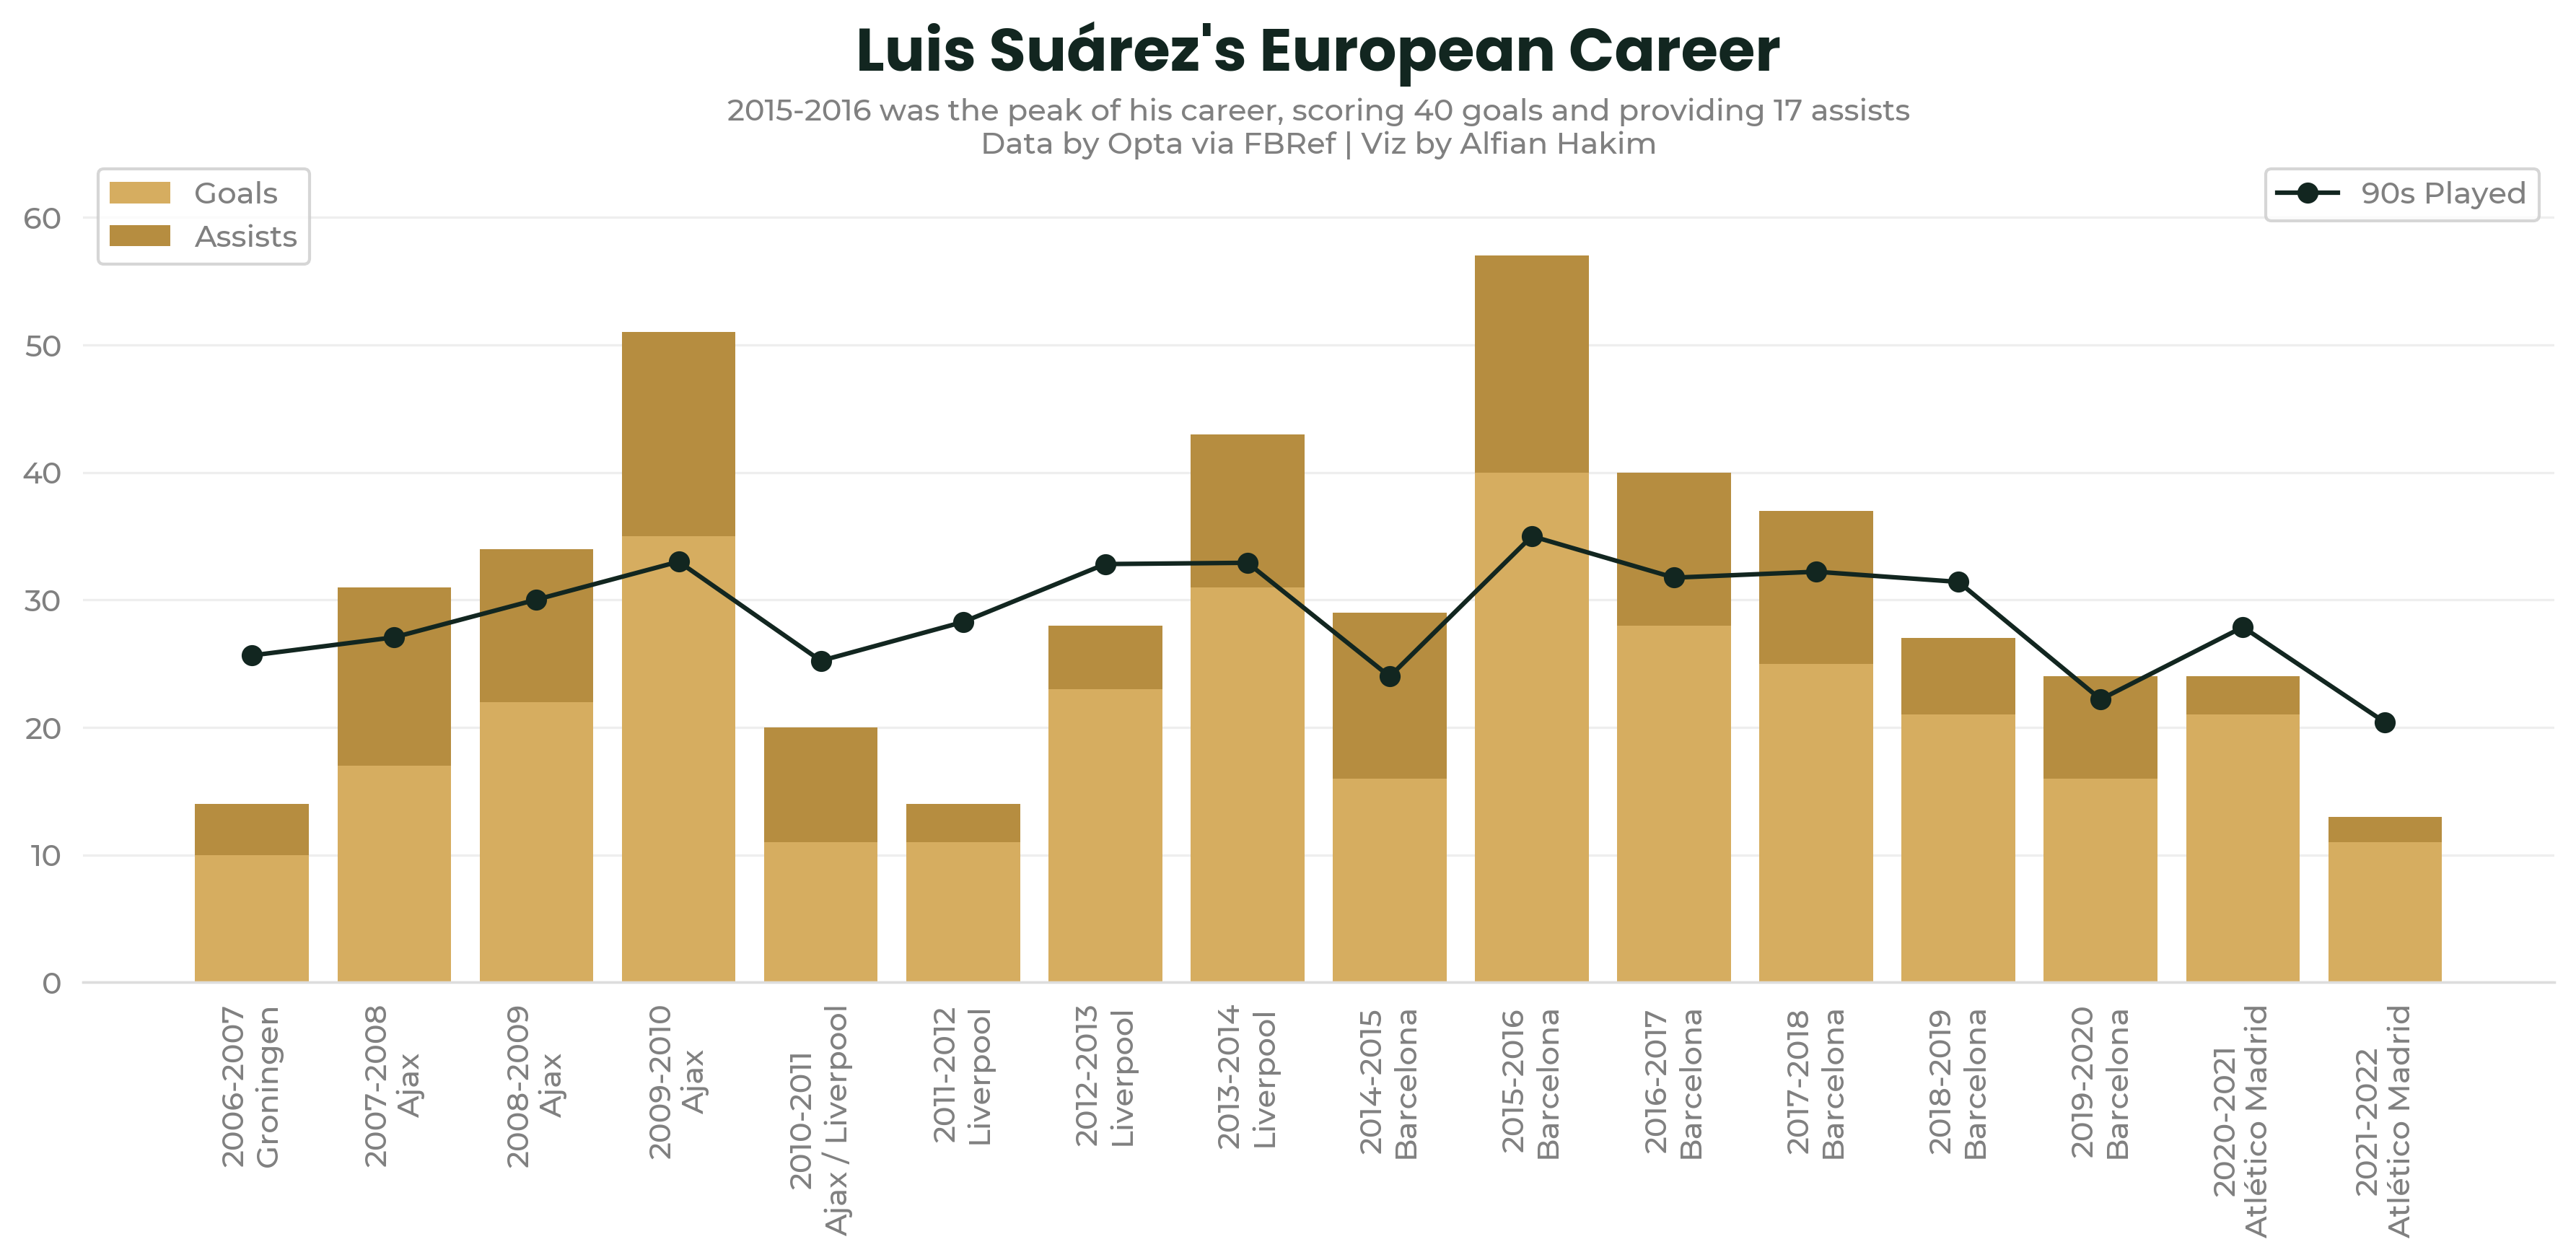

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.color'] = '#122620'
# Set custom rcParams for background color
#plt.rcParams['figure.facecolor'] = '#F3E3E2'  # Background color of the figure
#plt.rcParams['axes.facecolor'] = '#F3E3E2'        # Background color of the axes


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_cols['year_id'], df_cols['goals'], label='Goals', color='#D6AD60', align='center')
ax1.bar(df_cols['year_id'], df_cols['assists'], bottom=df_cols['goals'], label='Assists', color='#B68D40', align='center')

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_cols['year_id']+'\n'+df_cols['team'], rotation=90, ha='center',va='top',color='gray')
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.1, "Luis Suárez's European Career", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1,"2015-2016 was the peak of his career, scoring 40 goals and providing 17 assists\nData by Opta via FBRef | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper left', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 65

ax1.set_ylim(y_min, y_max)

ax2 = ax1.twinx()
ax2.set_ylim(y_min, y_max)

# Create the line chart for the "90s" column
ax2.plot(df_cols['year_id'], df_cols['90s'], marker='o', linestyle='-', color='#122620', label='90s Played')

# Set labels and title for the line chart
#ax2.set_ylabel('90s Played (Minutes)')
ax2.legend(loc='upper right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)


# Display the plot
plt.tight_layout()
plt.show()


# Statsbomb 15-16 Open Data

In [ ]:
!pip install -U mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

pd.set_option('display.max_columns', 500)

In [ ]:
parser = Sbopen()
df_match = parser.match(competition_id=11, season_id=27)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         380 non-null    int64         
 1   match_date                       380 non-null    datetime64[ns]
 2   kick_off                         380 non-null    datetime64[ns]
 3   home_score                       380 non-null    int64         
 4   away_score                       380 non-null    int64         
 5   match_status                     380 non-null    object        
 6   match_status_360                 380 non-null    object        
 7   last_updated                     380 non-null    datetime64[ns]
 8   last_updated_360                 33 non-null     datetime64[ns]
 9   match_week                       380 non-null    int64         
 10  competition_id                   380 non-null    int64        

## Filtering Barcelona Matches Only
- should be 38 matches only

In [ ]:
df_match.loc[(df_match['home_team_name']=='Barcelona') | (df_match['away_team_name']=='Barcelona')].shape

(38, 52)

In [ ]:
df_match_barca = df_match.loc[(df_match['home_team_name']=='Barcelona') | (df_match['away_team_name']=='Barcelona')].reset_index(drop=True)

In [ ]:
df_match_barca

match_id match_date            kick_off  home_score  away_score  \
0    3825660 2015-11-08 2015-11-08 17:00:00           3           0   
1    3825637 2015-10-25 2015-10-25 19:15:00           3           1   
2    3825645 2015-10-31 2015-10-31 21:30:00           0           2   
3    3825627 2015-10-17 2015-10-17 20:30:00           5           2   
4    3825617 2015-10-03 2015-10-03 16:00:00           2           1   
5     266498 2016-03-12 2016-03-12 17:00:00           6           0   
6     266986 2016-04-30 2016-04-30 20:30:00           0           2   
7     267533 2016-04-02 2016-04-02 20:30:00           1           2   
8     266310 2016-04-20 2016-04-20 20:00:00           0           8   
9     267576 2016-01-30 2016-01-30 17:00:00           2           1   
10    266653 2016-03-03 2016-03-03 22:00:00           1           5   
11    265944 2016-04-23 2016-04-23 20:30:00           6           0   
12    265894 2016-01-23 2016-01-23 17:00:00           1           2   
13    265958 2016-05-08 2016-05-08 17:00:00           5           0   
14    267611 2015-09-26 2015-09-26 16:00:00           2           1   
15    267422 2015-08-29 2015-08-29 20:30:00           1           0   
16    266236 2015-08-23 2015-08-23 18:30:00           0           1   
17    267274 2015-12-05 2015-12-05 20:30:00           1           1   
18    266961 2015-12-12 2015-12-12 16:00:00           2           2   
19    266885 2015-11-28 2015-11-28 16:00:00           4           0   
20    266815 2016-02-17 2016-02-17 18:30:00           1           3   
21    267506 2016-05-14 2016-05-14 17:00:00           0           3   
22    266664 2016-04-09 2016-04-09 20:30:00           1           0   
23    266106 2016-03-20 2016-03-20 17:00:00           2           2   
24    266670 2016-01-02 2016-01-02 16:00:00           0           0   
25    266149 2016-01-17 2016-01-17 20:30:00           6           0   
26    266620 2016-01-09 2016-01-09 16:00:00           4           0   
27    266056 2016-03-06 2016-03-06 17:00:00           0           4   
28    267327 2015-12-30 2015-12-30 20:30:00           4           0   
29    266166 2015-09-12 2015-09-12 20:30:00           1           2   
30    266160 2016-02-07 2016-02-07 13:00:00           0           2   
31    265839 2016-02-28 2016-02-28 21:30:00           2           1   
32    266424 2015-11-21 2015-11-21 18:15:00           0           4   
33    266467 2015-09-23 2015-09-23 20:00:00           4           1   
34    267273 2016-02-20 2016-02-20 17:00:00           1           2   
35    266490 2015-09-20 2015-09-20 20:30:00           4           1   
36    266254 2016-02-14 2016-02-14 21:30:00           6           1   
37    266557 2016-04-17 2016-04-17 20:30:00           1           2   

   match_status match_status_360               last_updated  \
0     available      unscheduled 2022-02-28 16:58:10.853647   
1     available      unscheduled 2022-02-14 14:44:25.324498   
2     available      unscheduled 2022-02-14 14:53:16.243302   
3     available      unscheduled 2022-02-14 14:33:42.685284   
4     available      unscheduled 2022-02-14 14:22:14.714154   
5     available        scheduled 2023-07-24 21:49:59.471748   
6     available        scheduled 2022-08-30 12:52:34.036721   
7     available        scheduled 2023-07-24 21:51:48.410526   
8     available        scheduled 2023-07-24 21:52:42.890908   
9     available        scheduled 2022-08-30 11:31:07.816757   
10    available        scheduled 2023-07-24 21:44:55.075875   
11    available        scheduled 2023-07-24 17:54:12.421030   
12    available        scheduled 2022-08-30 11:24:51.437349   
13    available        scheduled 2023-07-24 21:48:06.008416   
14    available        scheduled 2023-07-24 21:51:58.861743   
15    available        scheduled 2023-07-24 21:43:56.490047   
16    available        scheduled 2023-07-24 21:45:51.010993   
17    available        scheduled 2023-07-24 21:46:03.786687   
18    available        scheduled 2020

In [ ]:
# iterate through all matches to get the events data
df_matches = {}
for i, id in enumerate(df_match_barca['match_id']):
  df_matches[id] = {}
  df_matches[id]['event'], df_matches[id]['related'], df_matches[id]['freeze'], df_matches[id]['tactic'] = parser.event(id)

In [ ]:
df_matches[265958]['tactic']

jersey_number  match_id                                    id  player_id  \
0               1    265958  525545be-a008-436a-8c76-1693dcceb62b      20055   
1               6    265958  525545be-a008-436a-8c76-1693dcceb62b       4324   
2               3    265958  525545be-a008-436a-8c76-1693dcceb62b       5213   
3              14    265958  525545be-a008-436a-8c76-1693dcceb62b       5506   
4              18    265958  525545be-a008-436a-8c76-1693dcceb62b       5211   
5               5    265958  525545be-a008-436a-8c76-1693dcceb62b       5203   
6               8    265958  525545be-a008-436a-8c76-1693dcceb62b       5216   
7               4    265958  525545be-a008-436a-8c76-1693dcceb62b       5470   
8              10    265958  525545be-a008-436a-8c76-1693dcceb62b       5503   
9              11    265958  525545be-a008-436a-8c76-1693dcceb62b       4320   
10              9    265958  525545be-a008-436a-8c76-1693dcceb62b       5246   
11             13    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6792   
12             16    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6791   
13              6    265958  065b8683-3de0-4892-98be-a3d7d345aebb      16456   
14              3    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6612   
15              5    265958  065b8683-3de0-4892-98be-a3d7d345aebb      27241   
16             12    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6867   
17             14    265958  065b8683-3de0-4892-98be-a3d7d345aebb      18407   
18              4    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6758   
19             17    265958  065b8683-3de0-4892-98be-a3d7d345aebb       6838   
20             25    265958  065b8683-3de0-4892-98be-a3d7d345aebb       5719   
21             20    265958  065b8683-3de0-4892-98be-a3d7d345aebb       7781   

                         player_name  position_id              position_name  \
0              Marc-André ter Stegen            1                 Goalkeeper   
1              Daniel Alves da Silva            2                 Right Back   
2              Gerard Piqué Bernabéu            3          Right Center Back   
3        Javier Alejandro Mascherano            5           Left Center Back   
4                   Jordi Alba Ramos            6                  Left Back   
5           Sergio Busquets i Burgos           10  Center Defensive Midfield   
6               Andrés Iniesta Luján           13      Right Center Midfield   
7                       Ivan Rakitić           15       Left Center Midfield   
8     Lionel Andrés Messi Cuccittini           17                 Right Wing   
9      Neymar da Silva Santos Junior           21                  Left Wing   
10          Luis Alberto Suárez Díaz           23             Center Forward   
11                  Pau López Sabata            1                 Goalkeeper   
12            Javier López Rodríguez            2                 Right Back   
13              Enzo Pablo Roco Roco            3          Right Center Back   
14              Rubén Duarte Sánchez            5           Left Center Back   
15  Víctor Guillermo Álvarez Delgado            6                  Left Back   
16                   Papa Kouly Diop           10  Center Defensive Midfield   
17   José Alberto Cañas Ruiz Herrera           13      Right Center Midfield   
18               Víctor Sánchez Mata           15       Left Center Midfield   
19     Hernán Arsenio Pérez González           17                 Right Wing   
20           Marco Asensio Willemsen           21                  Left Wing   
21    Felipe Salvador Caicedo Corozo           23             Center Forward   

    event_tactics_id  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  
5                  6  
6                  7  
7                  8  
8                  9  
9                 10  
10                11  
11                 1  
12                 2  


- now we know that Suarez's id is 5246

In [ ]:
df_matches[265958]['event'].loc[(df_matches[265958]['event']['player_id']==5246) & (df_matches[265958]['event']['type_name']=='Shot')]

id  index  period        timestamp  \
405   9a5c7f6f-3b7f-4624-970a-84d308709c66    406       1  00:09:55.855000   
1927  735c12a3-6ca7-480c-9cf3-a2ce43ee3645   1928       2  00:06:27.491000   
2269  10210397-392a-421e-b204-6cb28107b063   2270       2  00:15:44.419000   

      minute  second  possession  duration  match_id  type_id type_name  \
405        9      55          19  0.326347    265958       16      Shot   
1927      51      27         100  0.815200    265958       16      Shot   
2269      60      44         120  0.793300    265958       16      Shot   

      possession_team_id possession_team_name  play_pattern_id  \
405                  217            Barcelona                1   
1927                 217            Barcelona                1   
2269                 217            Barcelona                2   

     play_pattern_name  team_id  team_name tactics_formation  player_id  \
405       Regular Play      217  Barcelona              None     5246.0   
1927      Regular Play      217  Barcelona              None     5246.0   
2269       From Corner      217  Barcelona              None     5246.0   

                   player_name  position_id   position_name  \
405   Luis Alberto Suárez Díaz         23.0  Center Forward   
1927  Luis Alberto Suárez Díaz         23.0  Center Forward   
2269  Luis Alberto Suárez Díaz         23.0  Center Forward   

      pass_recipient_id pass_recipient_name  pass_length  pass_angle  \
405                 NaN                 NaN          NaN         NaN   
1927                NaN                 NaN          NaN         NaN   
2269                NaN                 NaN          NaN         NaN   

      pass_height_id pass_height_name  end_x  end_y  body_part_id  \
405              NaN              NaN  118.7   43.9          40.0   
1927             NaN              NaN  120.0   41.7          40.0   
2269             NaN              NaN  120.0   38.0          37.0   

     body_part_name  sub_type_id sub_type_name      x     y  outcome_id  \
405      Right Foot         87.0     Open Play  114.2  50.8       100.0   
1927     Right Foot         87.0     Open Play  108.3  43.4        97.0   
2269           Head         87.0     Open Play  110.1  40.1        97.0   

     outcome_name  under_pressure  counterpress aerial_won pass_cross  \
405         Saved             1.0           NaN        NaN        NaN   
1927         Goal             1.0           NaN        NaN        NaN   
2269         Goal             NaN           NaN        NaN        NaN   

     foul_won_defensive  off_camera  out pass_switch foul_committed_advantage  \
405                 NaN         NaN  NaN         NaN                      NaN   
1927                NaN         NaN  NaN         NaN                      NaN   
2269                NaN         NaN  NaN         NaN                      NaN   

     foul_won_advantage ball_recovery_recovery_failure  shot_statsbomb_xg  \
405                 NaN                            NaN           0.106565   
1927                NaN                            NaN           0.450684   
2269                NaN                            NaN           0.098158   

      end_z  technique_id technique_name  goalkeeper_position_id  \
405     0.4          93.0         Normal                     NaN   
1927    1.5          93.0         Normal                     NaN   
2269    1.0          93.0         Normal                     NaN   

     goalkeeper_position_name pass_assisted_shot_id pass_shot_assist  \
405                       NaN                   NaN              NaN   
1927                      NaN                   NaN              NaN   
2269                      NaN                   NaN              NaN   

                          shot_key_pass_id shot_first_time  \
405   c407dd38-0a5f-4353-9ebc-ac85923b44c5            True   
1927  c00f17a6-0527-4fca-b2bf-bd2b64f4e8e2             NaN   
2269  1b1cf446-bd02-4f88-bd93-d0a2a7efadfb             NaN   

  

## Shots

### Collecting Luis Suarez Shots
Luis Suarez's player ID = 5246

In [ ]:
# we'll take the location where the shots ended
shot_cols = ['id','period', 'minute', 'match_id', 'x','y', 'end_y', 'end_z', 'play_pattern_name', 'sub_type_name', 'under_pressure',
             'body_part_name', 'technique_name', 'shot_first_time', 'shot_key_pass_id','outcome_name', 'shot_statsbomb_xg']
df_shot = pd.DataFrame(columns=shot_cols)

for id in df_match_barca['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].player_id	== 5246)
  shots_temp = df_matches[id]['event'].loc[mask_shot, shot_cols]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [ ]:
df_shot

id period minute match_id      x     y  \
0    4ade6c91-08c8-41f9-bdaf-e6dc5287a2a8      1      6  3825660   99.6  53.3   
1    61e1070a-d214-4411-83c7-d50275d14d5a      1      7  3825660  104.1  30.9   
2    12087055-22d0-4f2e-9286-a16eb934fda4      1     30  3825660  107.9  54.8   
3    2ccf0a9e-25e2-46f1-a726-d948f93695a8      2     53  3825660  110.2  34.3   
4    5784f19d-1b79-47df-afd7-21b77226e67a      2     69  3825660  108.4  40.1   
..                                    ...    ...    ...      ...    ...   ...   
134  a3afe8cc-4926-41a8-91a9-df64239dd5fb      2     74   266254  120.0  43.7   
135  9de370d6-47c6-4ed8-8bfe-10d2ea3a38d2      2     81   266254  112.3  44.5   
136  0f142c87-c8d6-42f4-9d8d-25d666c750c5      1      4   266557  115.4  21.5   
137  85388360-2db5-40dc-83c6-27e8cb5fc5f8      1      8   266557  101.9  50.9   
138  913c6d16-ff65-450e-9059-370bf542f1fe      1     21   266557  118.3  35.5   

     end_y  end_z play_pattern_name sub_type_name  under_pressure  \
0     30.7    0.2    From Free Kick     Open Play             NaN   
1     61.8    NaN     From Throw In     Open Play             NaN   
2     53.2    NaN      Regular Play     Open Play             NaN   
3     31.8    3.8    From Free Kick     Open Play             NaN   
4     36.8    0.3             Other       Penalty             NaN   
..     ...    ...               ...           ...             ...   
134   43.3    0.6    From Free Kick     Open Play             NaN   
135   43.3    0.4             Other     Open Play             NaN   
136   54.2    4.2       From Corner     Open Play             NaN   
137   28.9    0.2     From Throw In     Open Play             NaN   
138   46.5    3.0       From Corner     Open Play             NaN   

    body_part_name technique_name shot_first_time  \
0       Right Foot    Half Volley            True   
1        Left Foot    Half Volley             NaN   
2       Right Foot    Half Volley            True   
3             Head         Normal             NaN   
4       Right Foot         Normal             NaN   
..             ...            ...             ...   
134     Right Foot         Normal            True   
135     Right Foot         Normal             NaN   
136     Right Foot         Volley            True   
137     Right Foot         Normal            True   
138           Head         Normal             NaN   

                         shot_key_pass_id outcome_name  shot_statsbomb_xg  
0    4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9        Off T           0.042416  
1    de6bd253-117d-44a5-9d54-66365447a881      Wayward           0.046983  
2    eecb1d60-6528-4947-bd10-b70ca99b0665      Blocked           0.029568  
3    dd1b2bcd-8c2e-46a6-87e4-06c82b6986a0        Off T           0.074190  
4                                     NaN         Goal           0.783500  
..                                    ...          ...                ...  
134                                   NaN         Goal           0.913527  
135                                   NaN         Goal           0.316220  
136  bc812b4e-9305-471c-a8f1-051099ee2f7d        Off T           0.008909  
137  2b6b05ce-15ca-4d75-abac-188ed4a6784e        Off T           0.094587  
138  597aace1-9b8e-4cf9-89fa-0ab377c804e7        Off T           0.332804  

[139 rows x 17 columns]

In [ ]:
df_match_barca.head()

match_id match_date            kick_off  home_score  away_score  \
0   3825660 2015-11-08 2015-11-08 17:00:00           3           0   
1   3825637 2015-10-25 2015-10-25 19:15:00           3           1   
2   3825645 2015-10-31 2015-10-31 21:30:00           0           2   
3   3825627 2015-10-17 2015-10-17 20:30:00           5           2   
4   3825617 2015-10-03 2015-10-03 16:00:00           2           1   

  match_status match_status_360               last_updated last_updated_360  \
0    available      unscheduled 2022-02-28 16:58:10.853647              NaT   
1    available      unscheduled 2022-02-14 14:44:25.324498              NaT   
2    available      unscheduled 2022-02-14 14:53:16.243302              NaT   
3    available      unscheduled 2022-02-14 14:33:42.685284              NaT   
4    available      unscheduled 2022-02-14 14:22:14.714154              NaT   

   match_week  competition_id country_name competition_name  season_id  \
0          11              11        Spain          La Liga         27   
1           9              11        Spain          La Liga         27   
2          10              11        Spain          La Liga         27   
3           8              11        Spain          La Liga         27   
4           7              11        Spain          La Liga         27   

  season_name  home_team_id home_team_name home_team_gender home_team_group  \
0   2015/2016           217      Barcelona             male            None   
1   2015/2016           217      Barcelona             male            None   
2   2015/2016           216         Getafe             male            None   
3   2015/2016           217      Barcelona             male            None   
4   2015/2016           213        Sevilla             male            None   

   home_team_country_id home_team_country_name  home_team_managers_id  \
0                   214                  Spain                  793.0   
1                   214                  Spain                  793.0   
2                   214                  Spain                  509.0   
3                   214                  Spain                  793.0   
4                   214                  Spain                   21.0   

        home_team_managers_name home_team_managers_nickname  \
0  Luis Enrique Martínez García                Luis Enrique   
1  Luis Enrique Martínez García                Luis Enrique   
2      Francisco Escriba Segura                Fran Escribá   
3  Luis Enrique Martínez García                Luis Enrique   
4          Unai Emery Etxegoien                  Unai Emery   

  home_team_managers_dob  home_team_managers_country_id  \
0             1970-05-08                          214.0   
1             1970-05-08                          214.0   
2             1965-05-03                          214.0   
3             1970-05-08                          214.0   
4             1971-11-03                          214.0   

  home_team_managers_country_name  away_team_id  away_team_name  \
0                           Spain           222      Villarreal   
1                           Spain           322           Eibar   
2                           Spain           217       Barcelona   
3                           Spain           360  Rayo Vallecano   
4                           Spain           217       Barcelona   

  away_team_gender away_team_group  away_team_country_id  \
0             male            None                   214   
1             male            None                   214   
2             male            None                   214   
3             male            None                   214   
4             male            None                   214   

  away_team_country_name  away_team_managers_id  \
0                  Spain                    211   
1                  Spain                    221   
2                  Spain                    793   
3                  Spain                    22

In [ ]:
def find_opponent(row):
  match_id = row['match_id']
  home_team = df_match_barca.loc[df_match_barca['match_id']==match_id,'home_team_name'].values[0]
  away_team = df_match_barca.loc[df_match_barca['match_id']==match_id,'away_team_name'].values[0]
  if home_team == 'Barcelona':
    return away_team
  else:
    return home_team
def find_home_away(row):
  match_id = row['match_id']
  home_team = df_match_barca.loc[df_match_barca['match_id']==match_id,'home_team_name'].values[0]
  away_team = df_match_barca.loc[df_match_barca['match_id']==match_id,'away_team_name'].values[0]
  if home_team == 'Barcelona':
    return 'home'
  else:
    return 'away'

In [ ]:
df_shot['opponent'] = df_shot.apply(lambda x:find_opponent(x), axis=1)
df_shot['home_away'] = df_shot.apply(lambda x:find_home_away(x), axis=1)

In [ ]:
df_shot = pd.merge(df_shot,df_match_barca[['match_id', 'match_date','match_week']])

In [ ]:
def zone(row):
  if row['end_y'] > 36 and row['end_y'] < 44 and row['end_z'] < 2.8:
    if row['end_y'] < 36+8/3:
      zone_h = 'left'
    elif row['end_y'] >= 36+8/3 and row['end_y'] < 36+2*8/3:
      zone_h = 'center'
    else:
      zone_h = 'right'

    if row['end_z'] < 2.8/2:
      zone_v = 'bottom'
    else:
      zone_v = 'top'
    zone = zone_v+' '+zone_h
    return zone
  else:
    return np.nan

In [ ]:
df_shot['zone'] = df_shot.apply(lambda x:zone(x), axis=1)

In [ ]:
df_shot.head()

id period minute match_id      x     y  \
0  4ade6c91-08c8-41f9-bdaf-e6dc5287a2a8      1      6  3825660   99.6  53.3   
1  61e1070a-d214-4411-83c7-d50275d14d5a      1      7  3825660  104.1  30.9   
2  12087055-22d0-4f2e-9286-a16eb934fda4      1     30  3825660  107.9  54.8   
3  2ccf0a9e-25e2-46f1-a726-d948f93695a8      2     53  3825660  110.2  34.3   
4  5784f19d-1b79-47df-afd7-21b77226e67a      2     69  3825660  108.4  40.1   

   end_y  end_z play_pattern_name sub_type_name  under_pressure  \
0   30.7    0.2    From Free Kick     Open Play             NaN   
1   61.8    NaN     From Throw In     Open Play             NaN   
2   53.2    NaN      Regular Play     Open Play             NaN   
3   31.8    3.8    From Free Kick     Open Play             NaN   
4   36.8    0.3             Other       Penalty             NaN   

  body_part_name technique_name shot_first_time  \
0     Right Foot    Half Volley            True   
1      Left Foot    Half Volley             NaN   
2     Right Foot    Half Volley            True   
3           Head         Normal             NaN   
4     Right Foot         Normal             NaN   

                       shot_key_pass_id outcome_name  shot_statsbomb_xg  \
0  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9        Off T           0.042416   
1  de6bd253-117d-44a5-9d54-66365447a881      Wayward           0.046983   
2  eecb1d60-6528-4947-bd10-b70ca99b0665      Blocked           0.029568   
3  dd1b2bcd-8c2e-46a6-87e4-06c82b6986a0        Off T           0.074190   
4                                   NaN         Goal           0.783500   

     opponent home_away match_date  match_week         zone  
0  Villarreal      home 2015-11-08          11          NaN  
1  Villarreal      home 2015-11-08          11          NaN  
2  Villarreal      home 2015-11-08          11          NaN  
3  Villarreal      home 2015-11-08          11          NaN  
4  Villarreal      home 2015-11-08          11  bottom left

In [ ]:
df_shot.loc[df_shot['outcome_name']=='Post']

id period minute match_id      x     y  \
22   9adec5d1-4ead-40a9-a470-93ff77e58db1      1     22  3825617  119.1  33.6   
23   17e0d757-5d7b-46f1-b69f-3b39455a4b87      1     37  3825617  101.3  23.6   
47   12484d31-5650-4f23-8175-99d5cf30a1da      2     52   266653  108.2  45.2   
94   58ee5694-84dc-4d24-ac37-229571da1b86      2     54   266670  118.4  46.5   
114  19f16626-ef63-4054-86de-d5d23fd9226f      1     23   266166  117.2  44.8   
120  06d7096b-8bc5-4acf-be18-91570ffcf0d9      1     12   265839  103.4  36.3   
132  dbc4448c-bd3f-4c12-865e-6c32c096972c      2     46   266254  113.2  32.7   

     end_y  end_z play_pattern_name sub_type_name  under_pressure  \
22    36.0    0.9    From Free Kick     Open Play             NaN   
23    44.0    2.8      Regular Play     Open Play             NaN   
47    44.1    0.2      Regular Play     Open Play             NaN   
94    44.1    0.4     From Throw In     Open Play             NaN   
114   41.5    2.8       From Corner     Open Play             NaN   
120   39.6    2.8       From Corner     Open Play             NaN   
132   43.9    1.8     From Throw In     Open Play             NaN   

    body_part_name technique_name shot_first_time  \
22       Left Foot         Normal            True   
23      Right Foot         Normal             NaN   
47      Right Foot    Half Volley            True   
94       Left Foot         Normal             NaN   
114     Right Foot    Half Volley             NaN   
120     Right Foot    Half Volley            True   
132     Right Foot         Normal            True   

                         shot_key_pass_id outcome_name  shot_statsbomb_xg  \
22                                    NaN         Post           0.103710   
23   15299c9c-b66f-4d02-bbd6-9570a103cbb5         Post           0.023714   
47                                    NaN         Post           0.219592   
94                                    NaN         Post           0.208687   
114                                   NaN         Post           0.434303   
120                                   NaN         Post           0.090937   
132  df330d70-f55b-4355-8f9b-f3413703216f         Post           0.142429   

            opponent home_away match_date  match_week       zone  
22           Sevilla      away 2015-10-03           7        NaN  
23           Sevilla      away 2015-10-03           7        NaN  
47    Rayo Vallecano      away 2016-03-03          27        NaN  
94          Espanyol      away 2016-01-02          18        NaN  
114  Atlético Madrid      away 2015-09-12           3        NaN  
120          Sevilla      home 2016-02-28          26        NaN  
132       Celta Vigo      home 2016-02-14          24  top right

In [ ]:
df_shot.loc[df_shot['outcome_name']=='Goal'].shape

(40, 22)

In [ ]:
df_shot.outcome_name.value_counts()

Off T               40
Goal                40
Saved               30
Blocked             14
Wayward              7
Post                 7
Saved Off Target     1
Name: outcome_name, dtype: int64

In [ ]:
df_shot.loc[df_shot['outcome_name']=='Goal'].sub_type_name.value_counts()

Open Play    37
Penalty       3
Name: sub_type_name, dtype: int64

In [ ]:
df_shot.zone.value_counts()

bottom left      22
bottom right     16
bottom center    10
top left          6
top right         6
top center        4
Name: zone, dtype: int64

### Shot Map

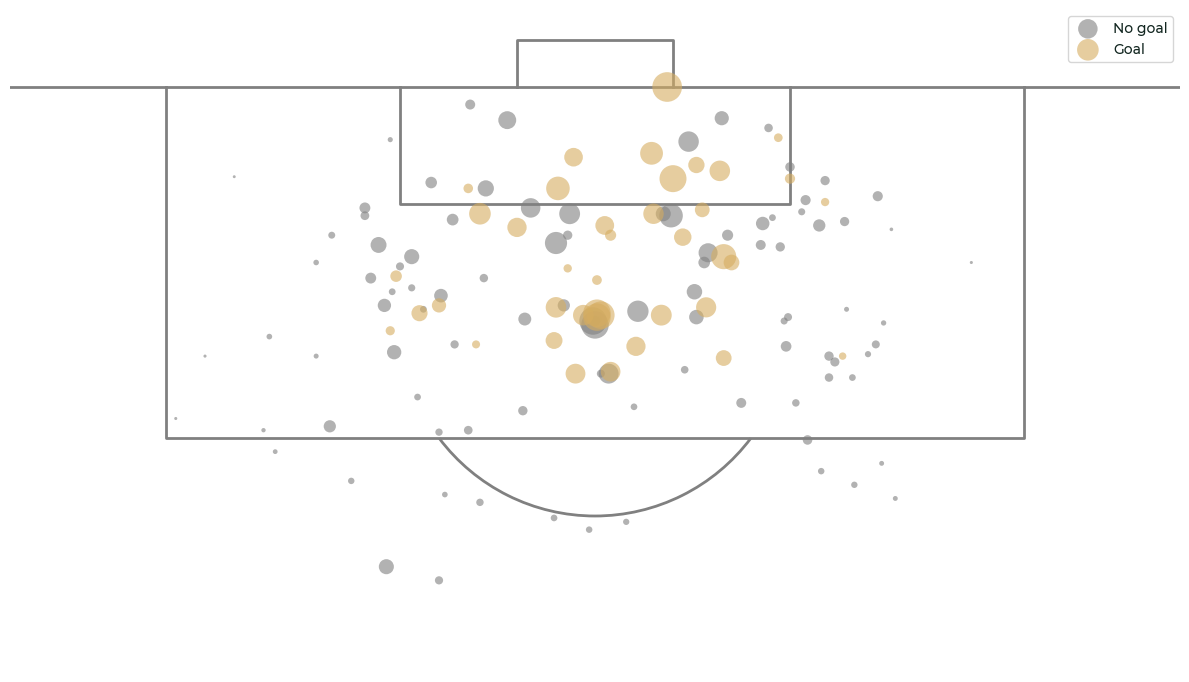

In [ ]:
# visualizing shots

# filter goals / non-shot goals
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=-30,  # reduce the area displayed at the bottom of the pitch
                      pad_left=-10,  # reduce the area displayed on the left of the pitch
                      pad_right=-10,  # reduce the area displayed on the right of the pitch
                      # pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_color='white', line_color='grey')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='grey',edgecolor='none',
                    marker='o',
                    ax=ax, label="No goal", s=df_non_goal_shots.shot_statsbomb_xg*500, alpha=0.6)

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#D6AD60',edgecolor='none',
                    marker='o',
                    ax=ax, label="Goal", s=df_goals.shot_statsbomb_xg*500, alpha=0.6)


plt.legend(loc='best')
plt.show()

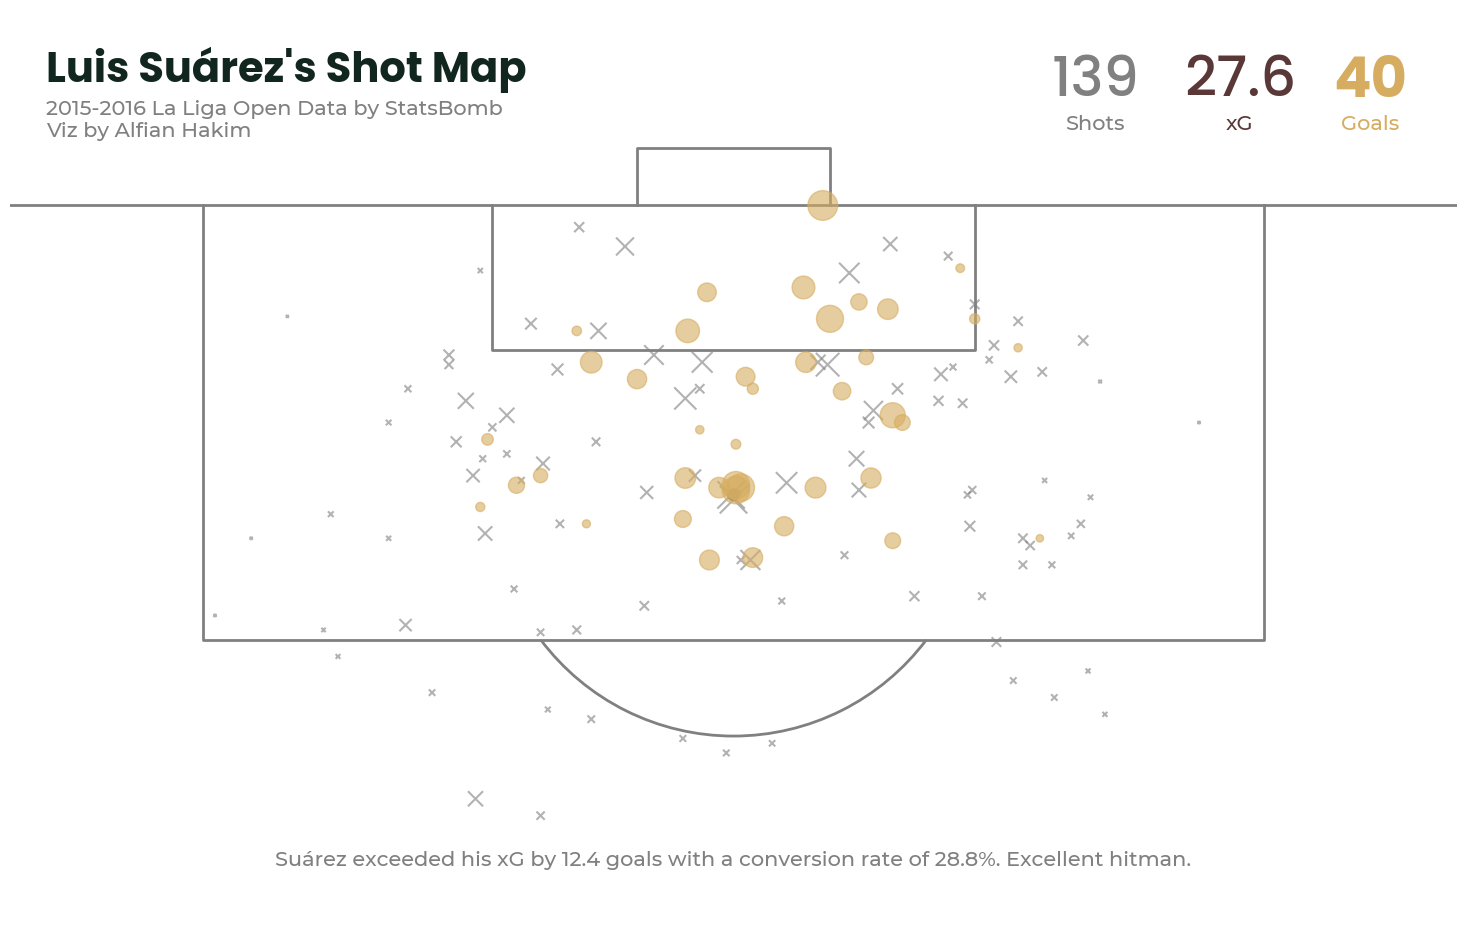

In [ ]:
fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='grey',
                    marker='x',
                    label="No goal", s=df_non_goal_shots.shot_statsbomb_xg*500, alpha=0.6,
                    ax=axs['pitch'])

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#D6AD60',
                    marker='o',
                    label="Goal", s=df_goals.shot_statsbomb_xg*500, alpha=0.6,
                    ax=axs['pitch'])

# title text
# title0 = axs['title'].text(0.5, 1, " ", weight='bold',
#                            va='center', ha='center', fontsize=30)
title1 = axs['title'].text(0.025, 0.4, "Luis Suárez's Shot Map", weight='bold', fontfamily='Poppins',
                           va='center', ha='left', fontsize=30)
title2 = axs['title'].text(0.025, 0.1, "2015-2016 La Liga Open Data by StatsBomb\nViz by Alfian Hakim", color=pitch.line_color,
                           va='top', ha='left', fontsize=15)

text_shot_value = axs['title'].text(0.75, -0.15, "Shots", color=pitch.line_color,
                           va='center', ha='center', fontsize=15)
text_xg_value = axs['title'].text(0.85, -0.15, "xG", color='#593837',
                           va='center', ha='center', fontsize=15)
text_goal_value = axs['title'].text(0.94, -0.15, "Goals", color='#D6AD60',
                           va='center', ha='center', fontsize=15)

text_shot = axs['title'].text(0.75, 0.55, "{}".format(df_shot.shape[0]), color=pitch.line_color,
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text_xg = axs['title'].text(0.85, 0.55, "{:.1f}".format(df_shot['shot_statsbomb_xg'].sum()), color='#593837',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text_goal = axs['title'].text(0.94, 0.55, "{}".format(df_shot[df_shot.outcome_name == 'Goal'].shape[0]),
                              color='#D6AD60', weight='bold', fontfamily='Poppins',
                           va='top', ha='center', fontsize=40)
title3 = axs['title'].text(0.5, -7.5, "Suárez exceeded his xG by {:.1f} goals with a conversion rate of {:.1f}%. Excellent hitman.".format(df_shot[df_shot.outcome_name == 'Goal'].shape[0]-df_shot['shot_statsbomb_xg'].sum(),
                                                                                                                     df_shot[df_shot.outcome_name == 'Goal'].shape[0]/df_shot.shape[0]*100), color=pitch.line_color,
                           va='center', ha='center', fontsize=15)

In [ ]:
df_shot.shot_statsbomb_xg.sum()

27.648656051499998

In [ ]:
df_goal = df_shot.loc[df_shot.outcome_name=='Goal']

In [ ]:
df_goal.zone.value_counts()

bottom left      17
bottom right      8
top left          4
bottom center     4
top right         4
top center        3
Name: zone, dtype: int64

### Shot on Target Map-xGOT Model

In [ ]:
import pickle
from urllib.request import urlopen
# xgot_model = pickle.load(open('https://github.com/ilmuneraka/xg-xgot-statsbomb-worldcup2022/raw/main/xgot_model.sav', 'rb'))
xgot_model = pickle.load(urlopen("https://github.com/ilmuneraka/xg-xgot-statsbomb-worldcup2022/raw/main/xgot_model.sav"))

# define function to calculate xG
def calculate_xgot(row):
  if (row.end_y < 44) & (row.end_y > 36) & (row.end_z < 2.8): # if on target
    end_y_center = abs(40-row['end_y'])
    end_z_center = abs(1.4-row['end_z'])
    X = [[end_y_center, end_z_center]]
    xgot = xgot_model.predict_proba(X)[:, 1][0]
    xgot_reg = (xgot-0.2089)/(0.5012-0.2089)
    return xgot_reg
  else:
    return np.nan

In [ ]:
df_shot['xgot'] = df_shot.apply(lambda x: calculate_xgot(x),axis=1)

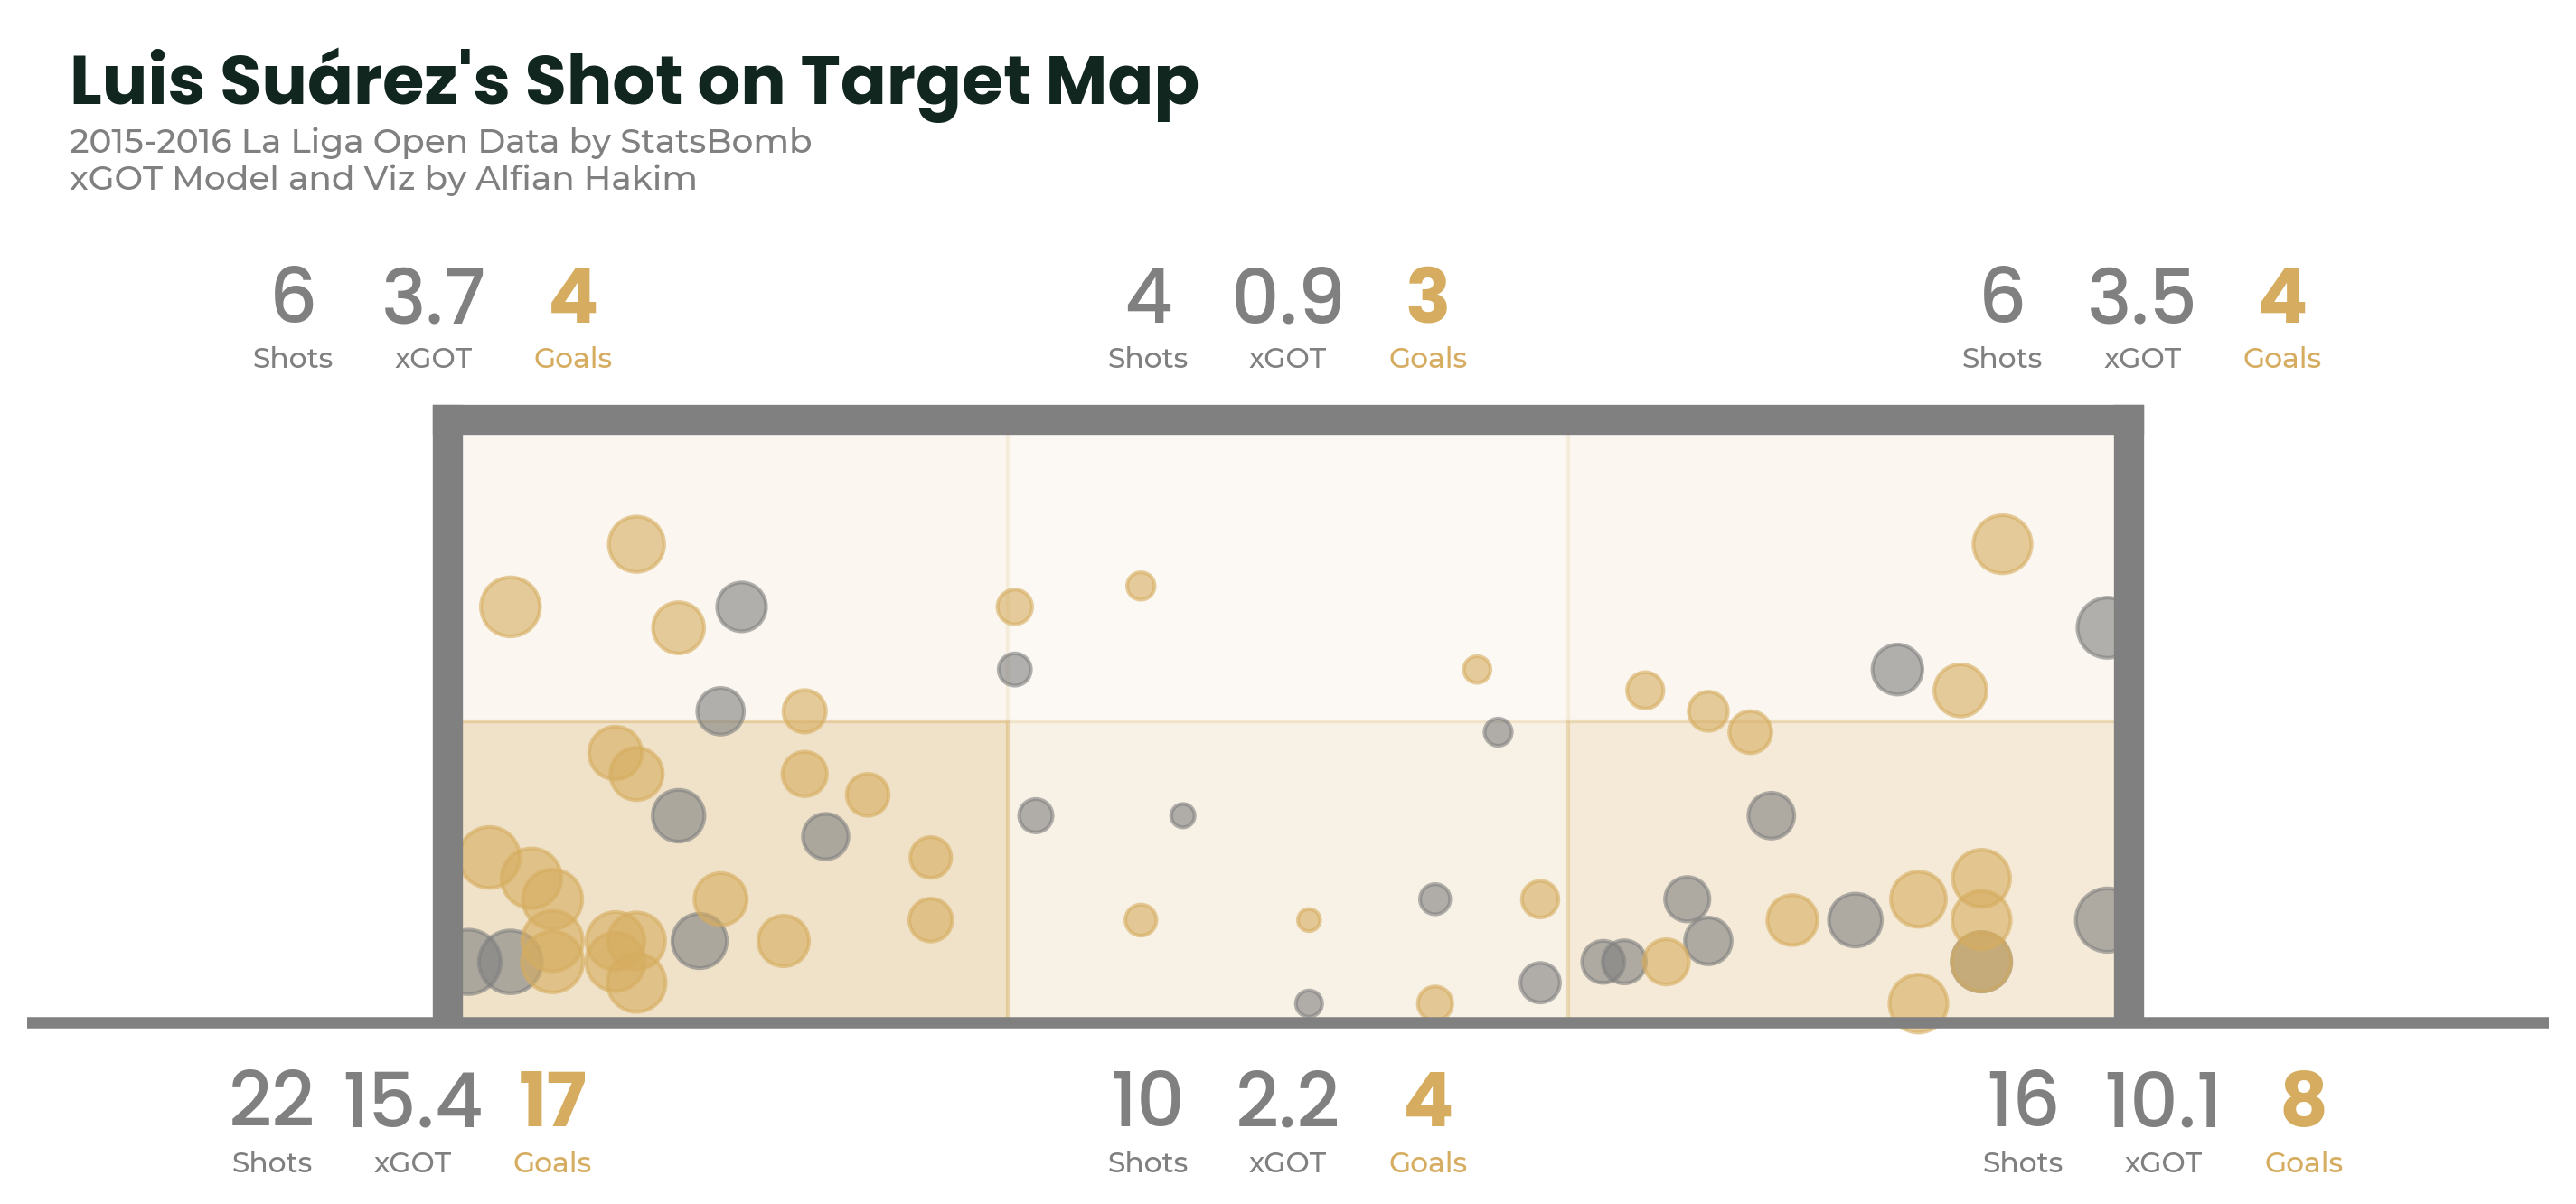

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
# plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, color='#D6AD60', alpha=alphas['bottom left'],edgecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, color='#D6AD60', alpha=alphas['top left'],edgecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, color='#D6AD60', alpha=alphas['bottom center'],edgecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, color='#D6AD60', alpha=alphas['top center'],edgecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, color='#D6AD60', alpha=alphas['bottom right'],edgecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, color='#D6AD60', alpha=alphas['top right'],edgecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=34.2, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='left', va='center')
plt.text(x=34.2, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='left', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

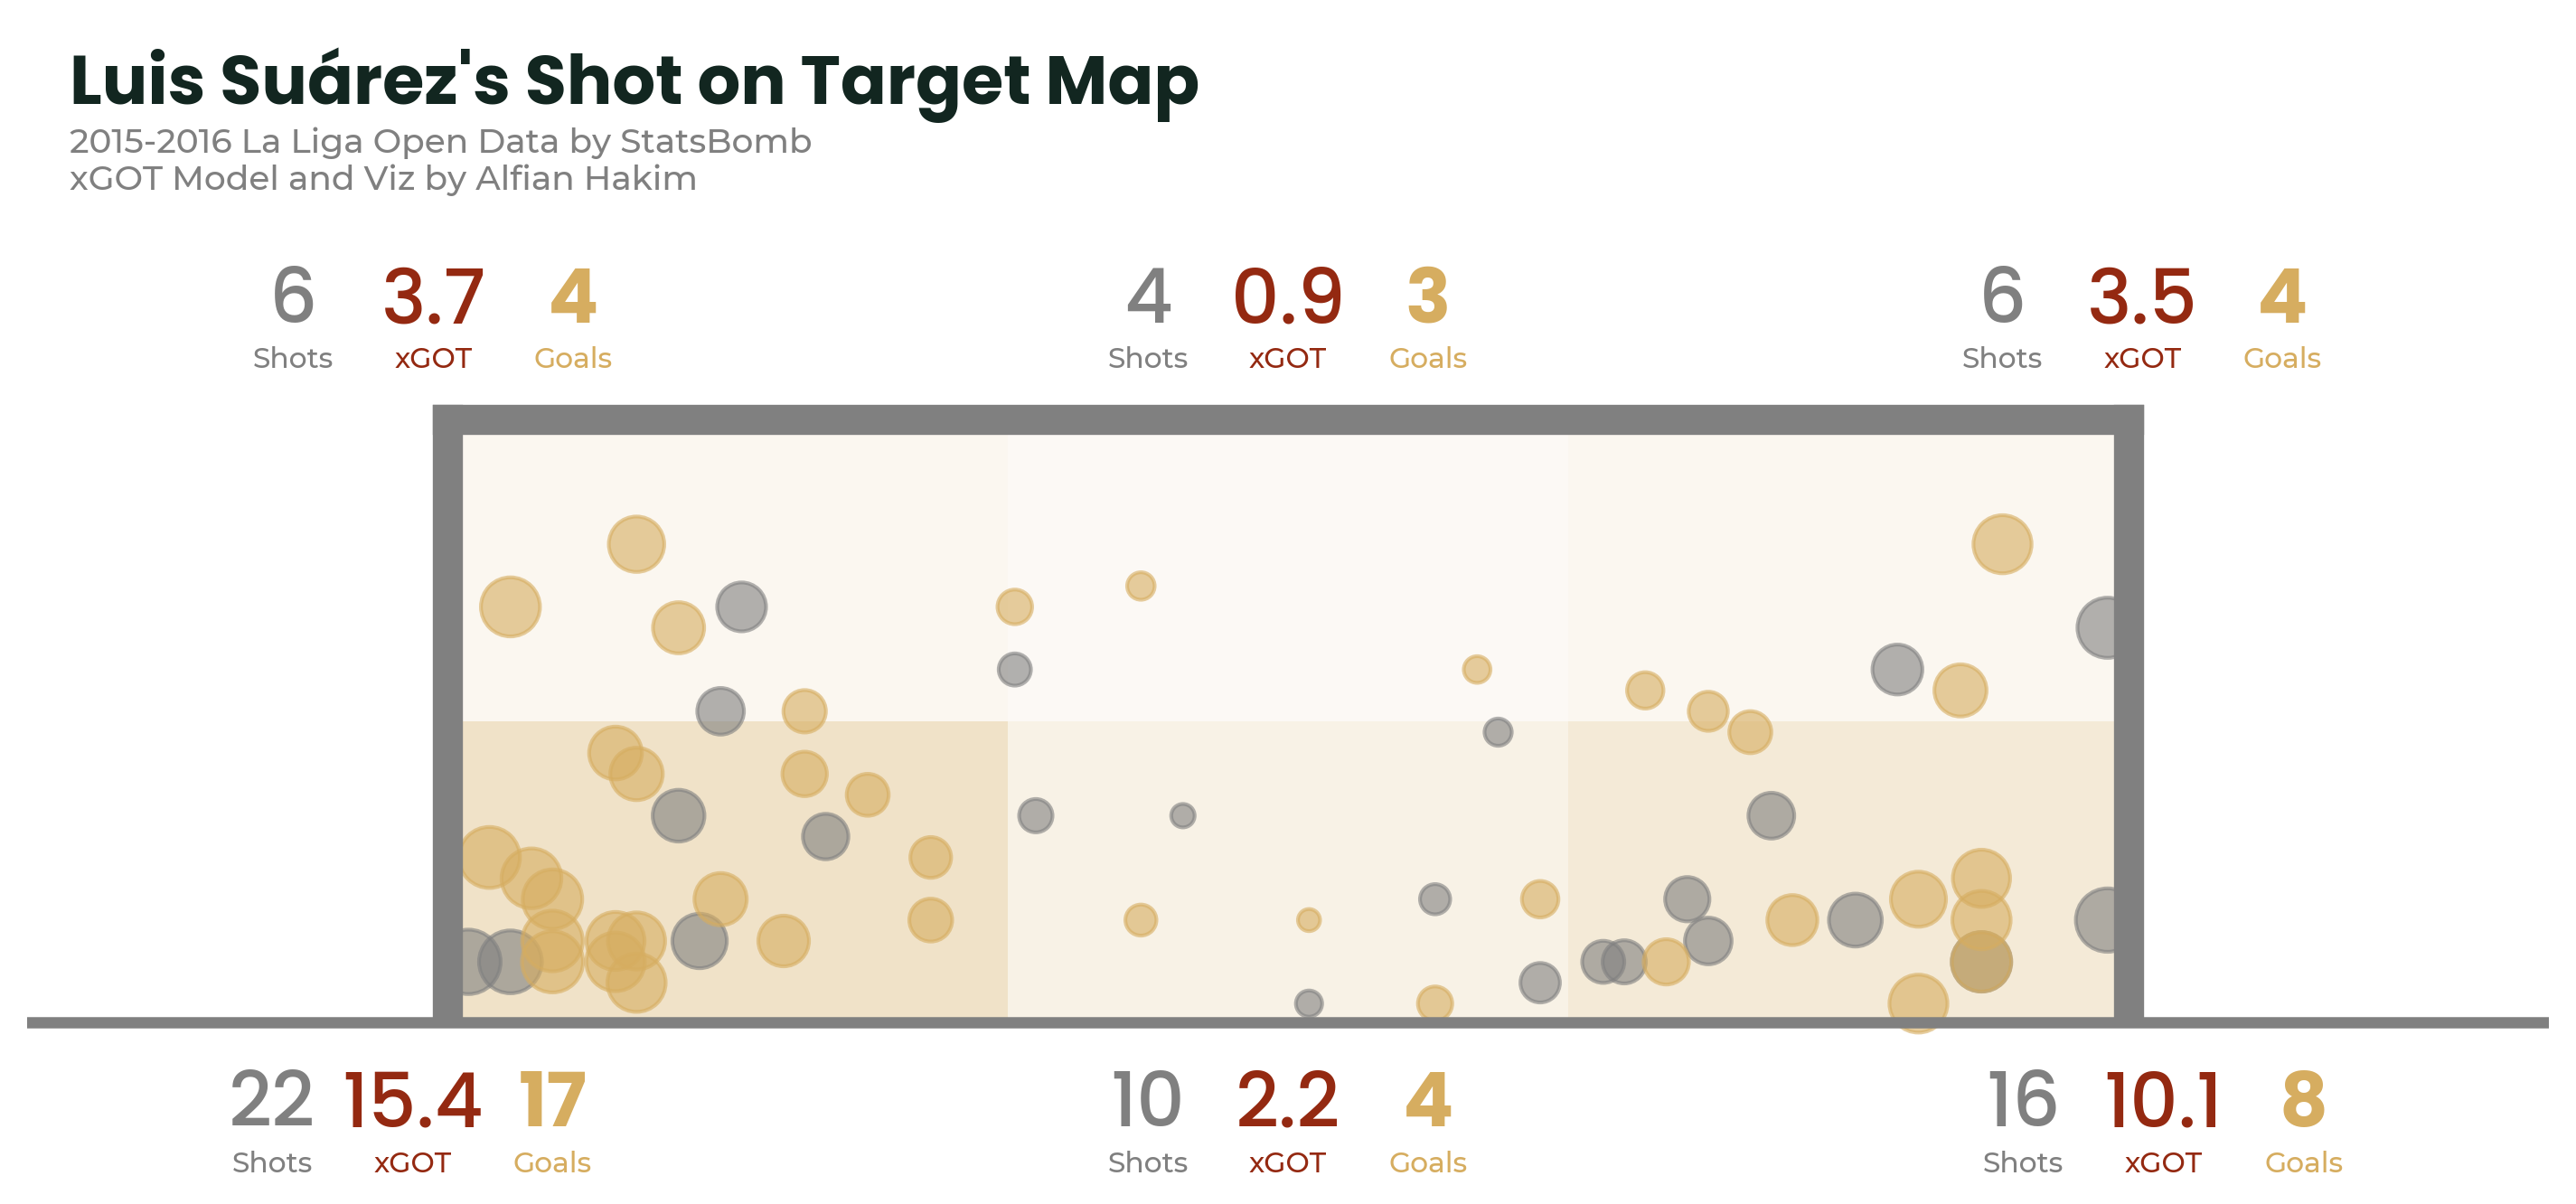

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
# plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom left'],edgecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top left'],edgecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom center'],edgecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top center'],edgecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom right'],edgecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top right'],edgecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=34.2, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='left', va='center')
plt.text(x=34.2, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='left', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

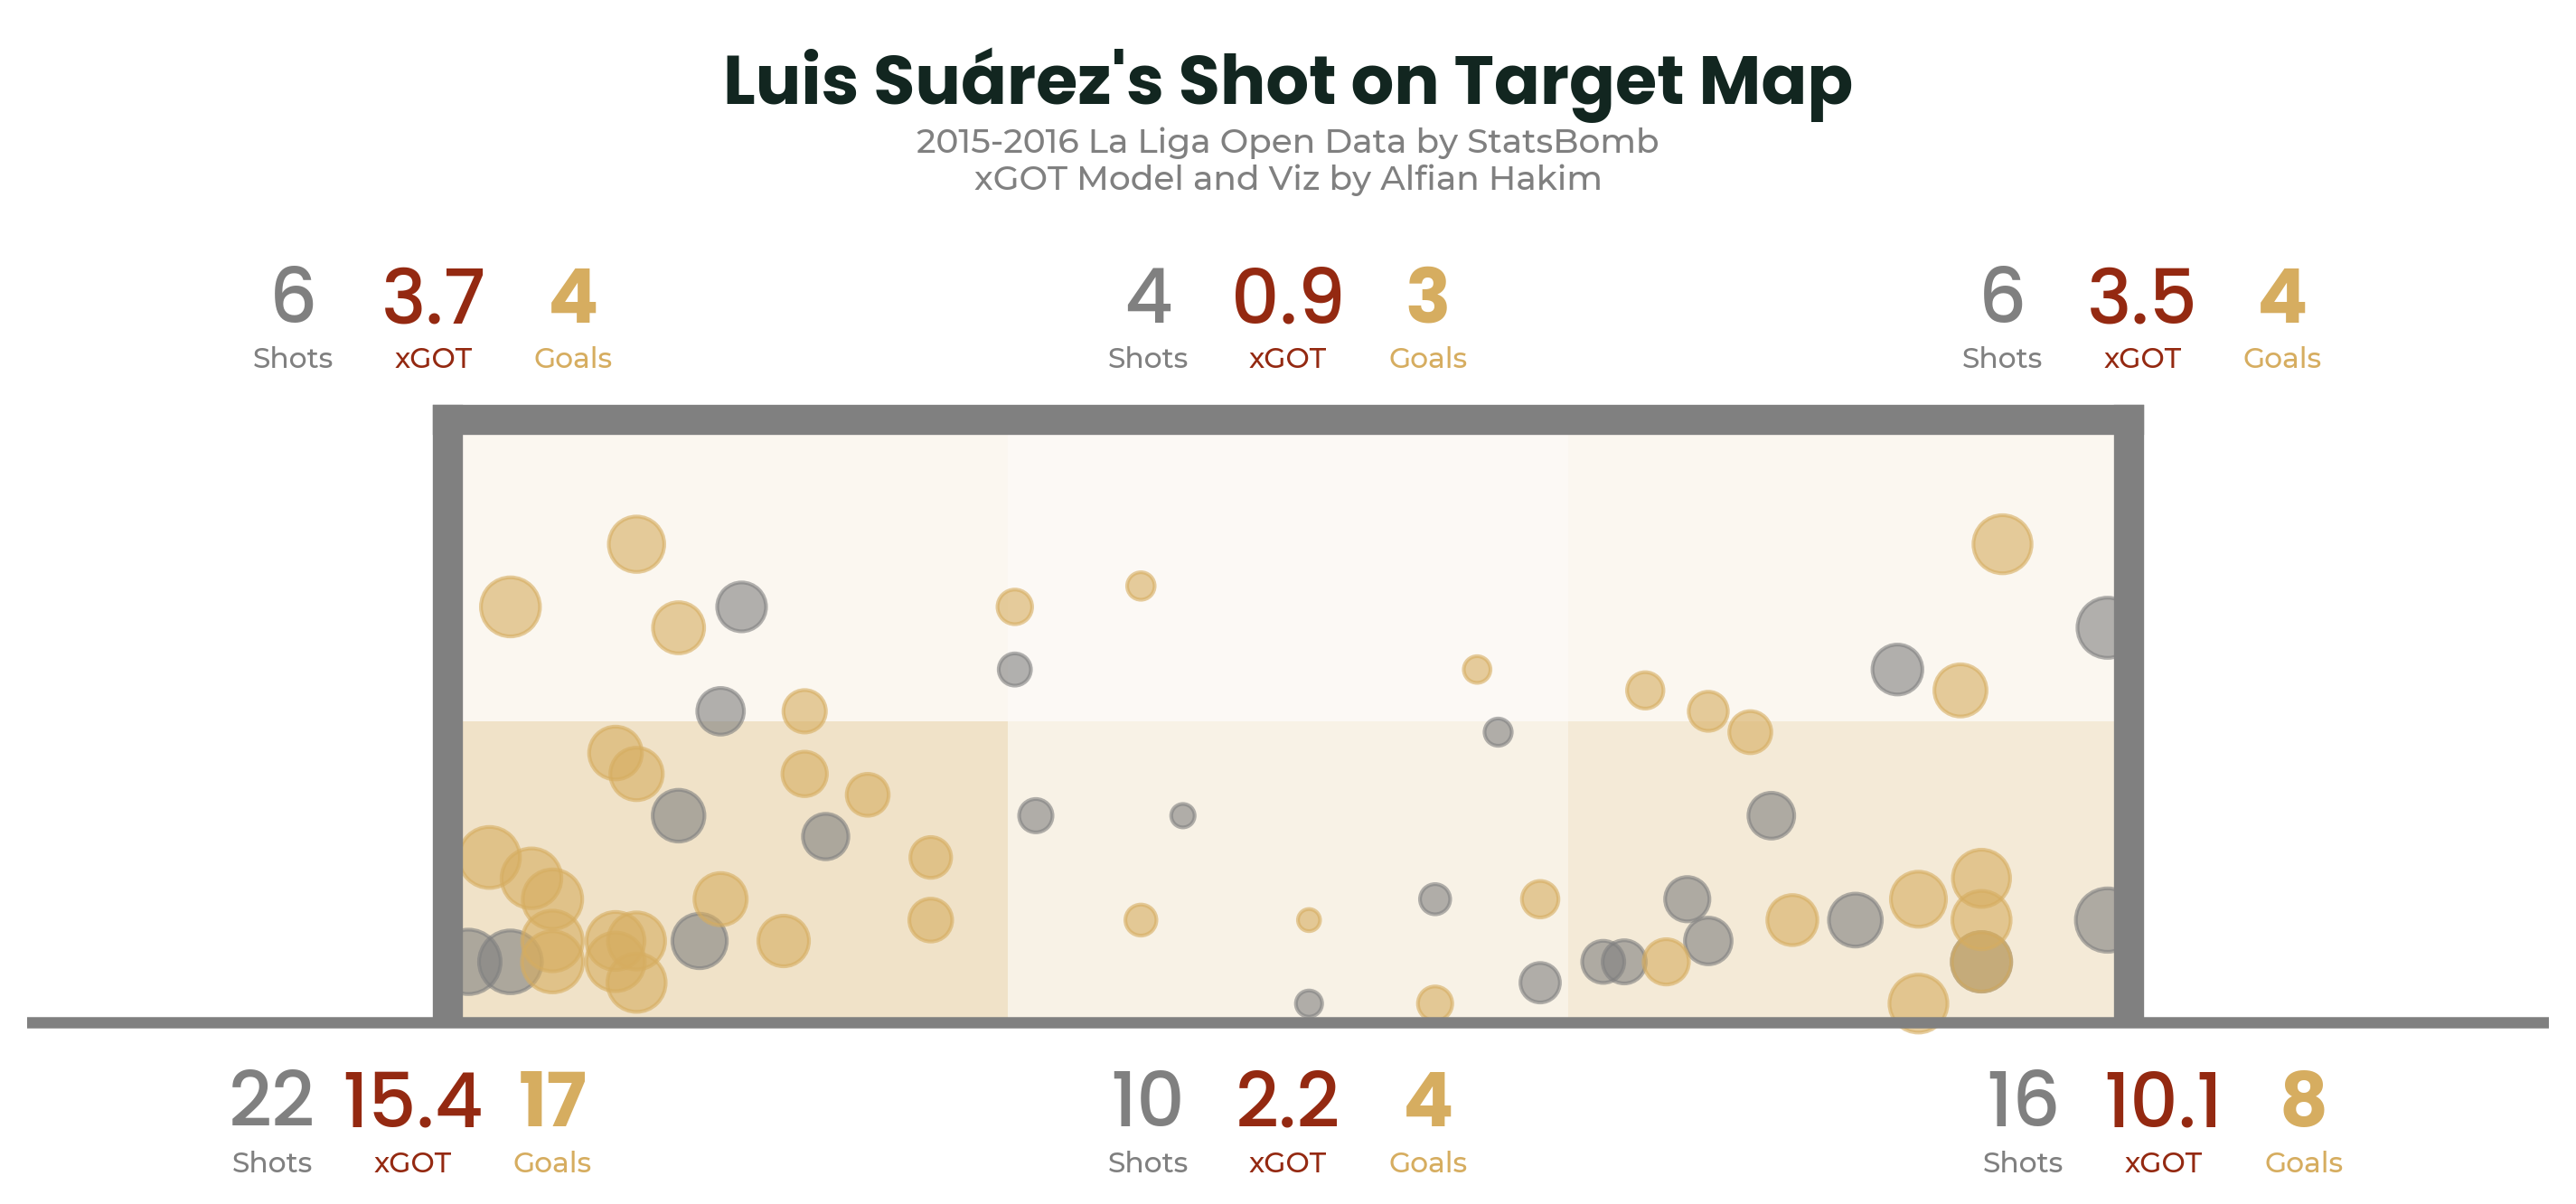

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
# plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom left'],edgecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top left'],edgecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom center'],edgecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top center'],edgecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom right'],edgecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top right'],edgecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='#942911', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='#942911', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=40, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='center', va='center')
plt.text(x=40, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='center', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

In [ ]:
round(df_shot['xgot'].sum(),1)

35.9

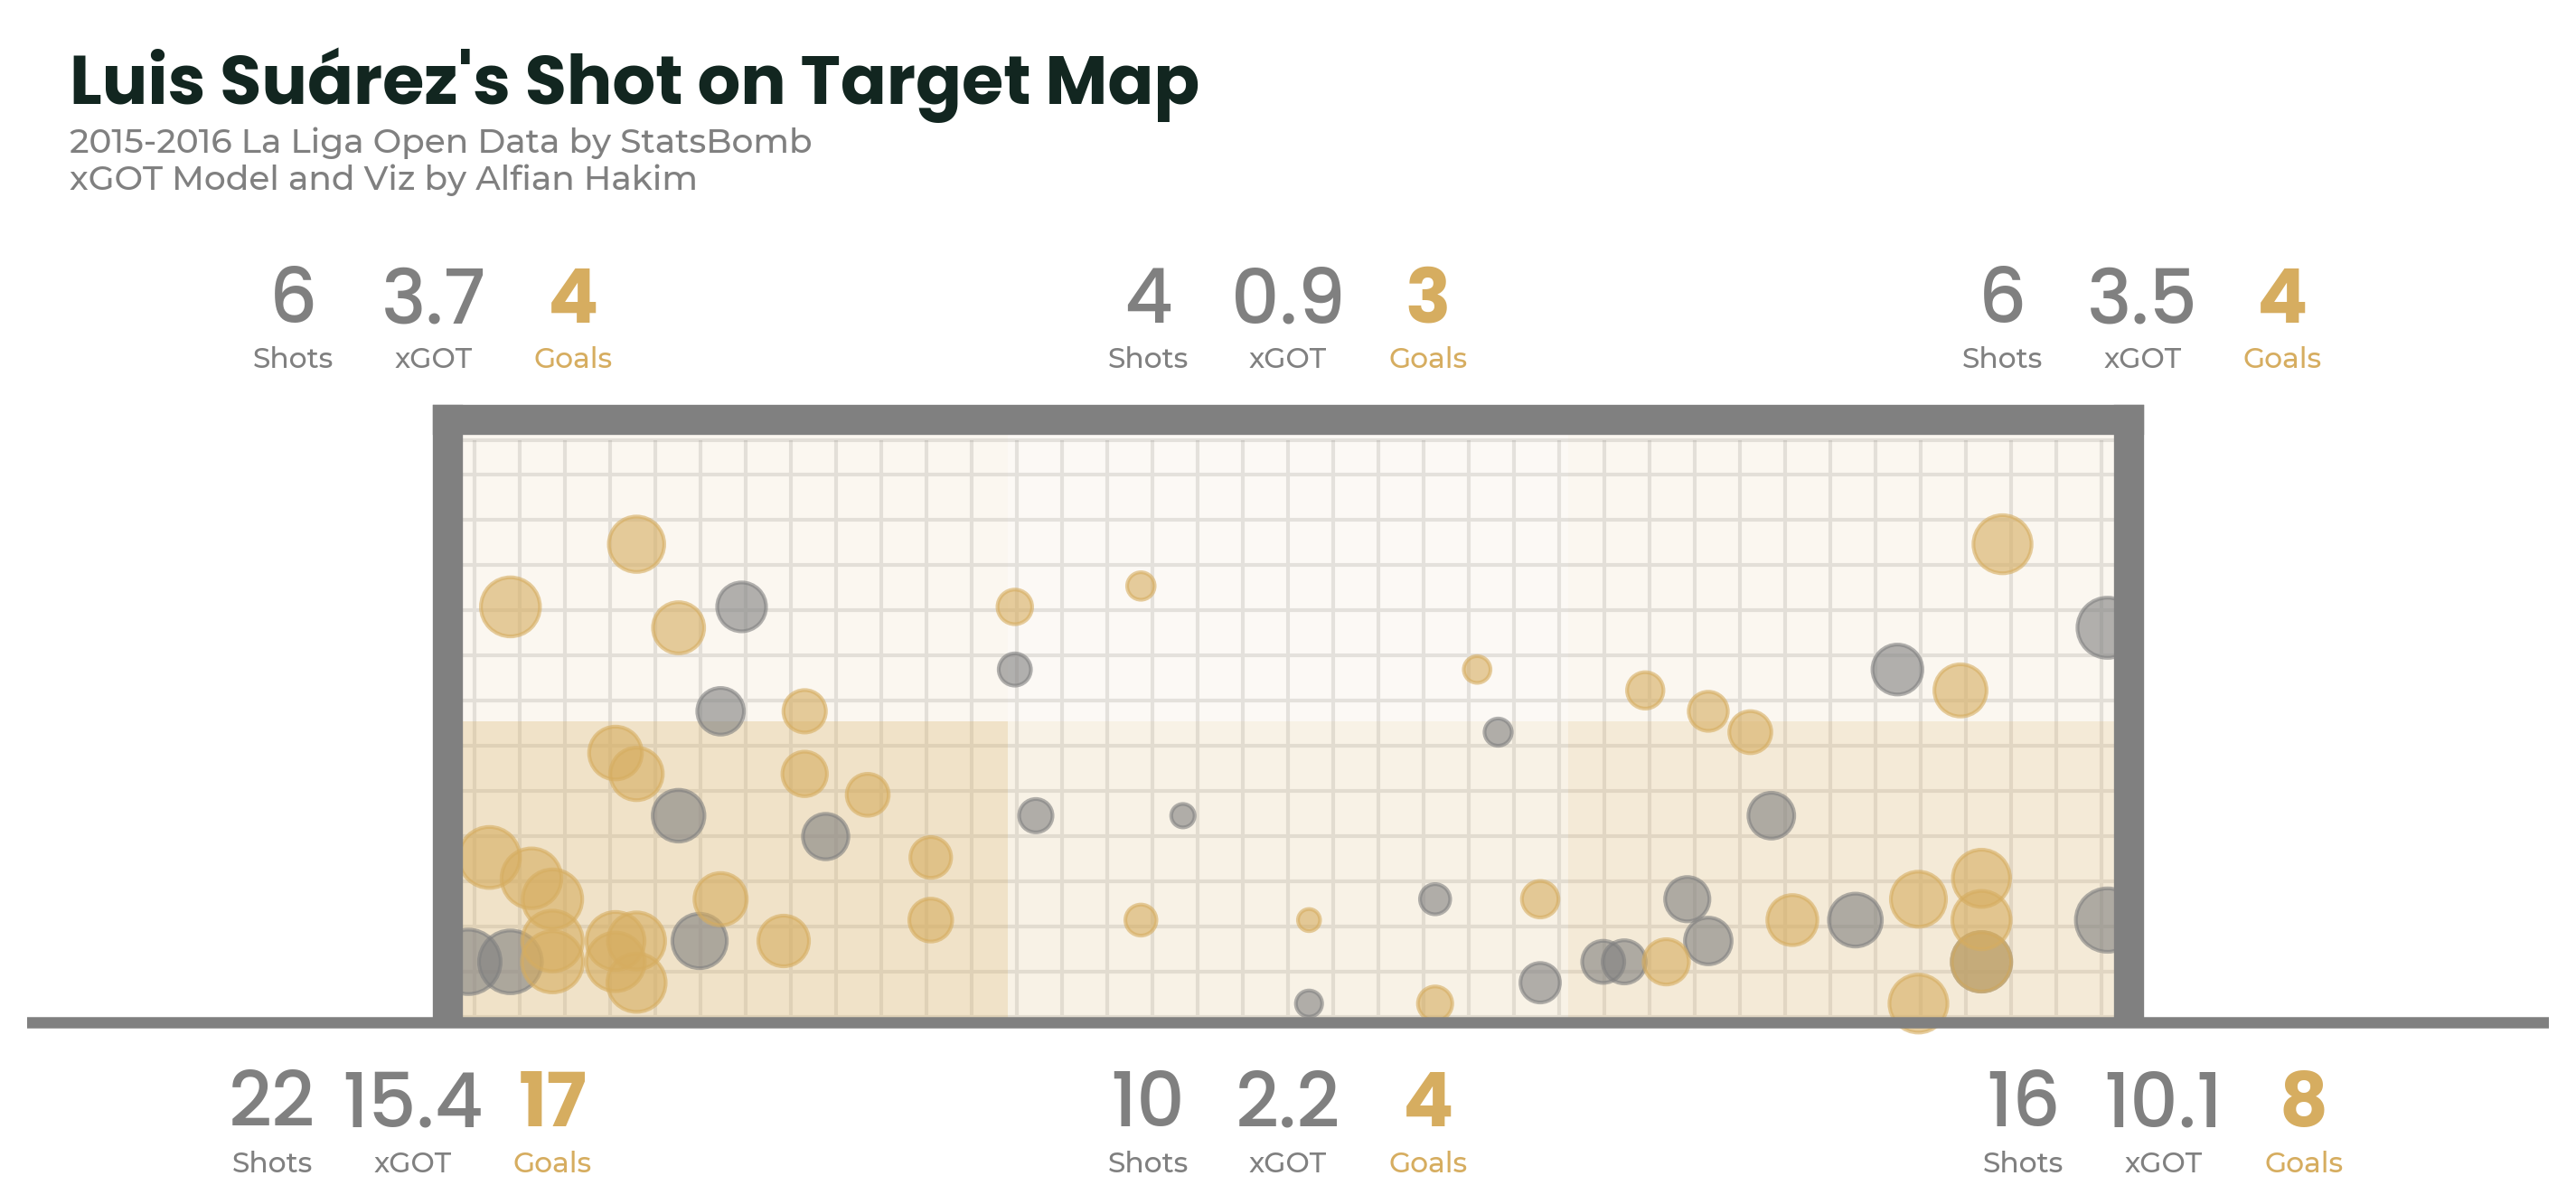

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom left'],edgecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top left'],edgecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom center'],edgecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top center'],edgecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, facecolor='#D6AD60', alpha=alphas['bottom right'],edgecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, facecolor='#D6AD60', alpha=alphas['top right'],edgecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=34.2, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='left', va='center')
plt.text(x=34.2, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='left', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

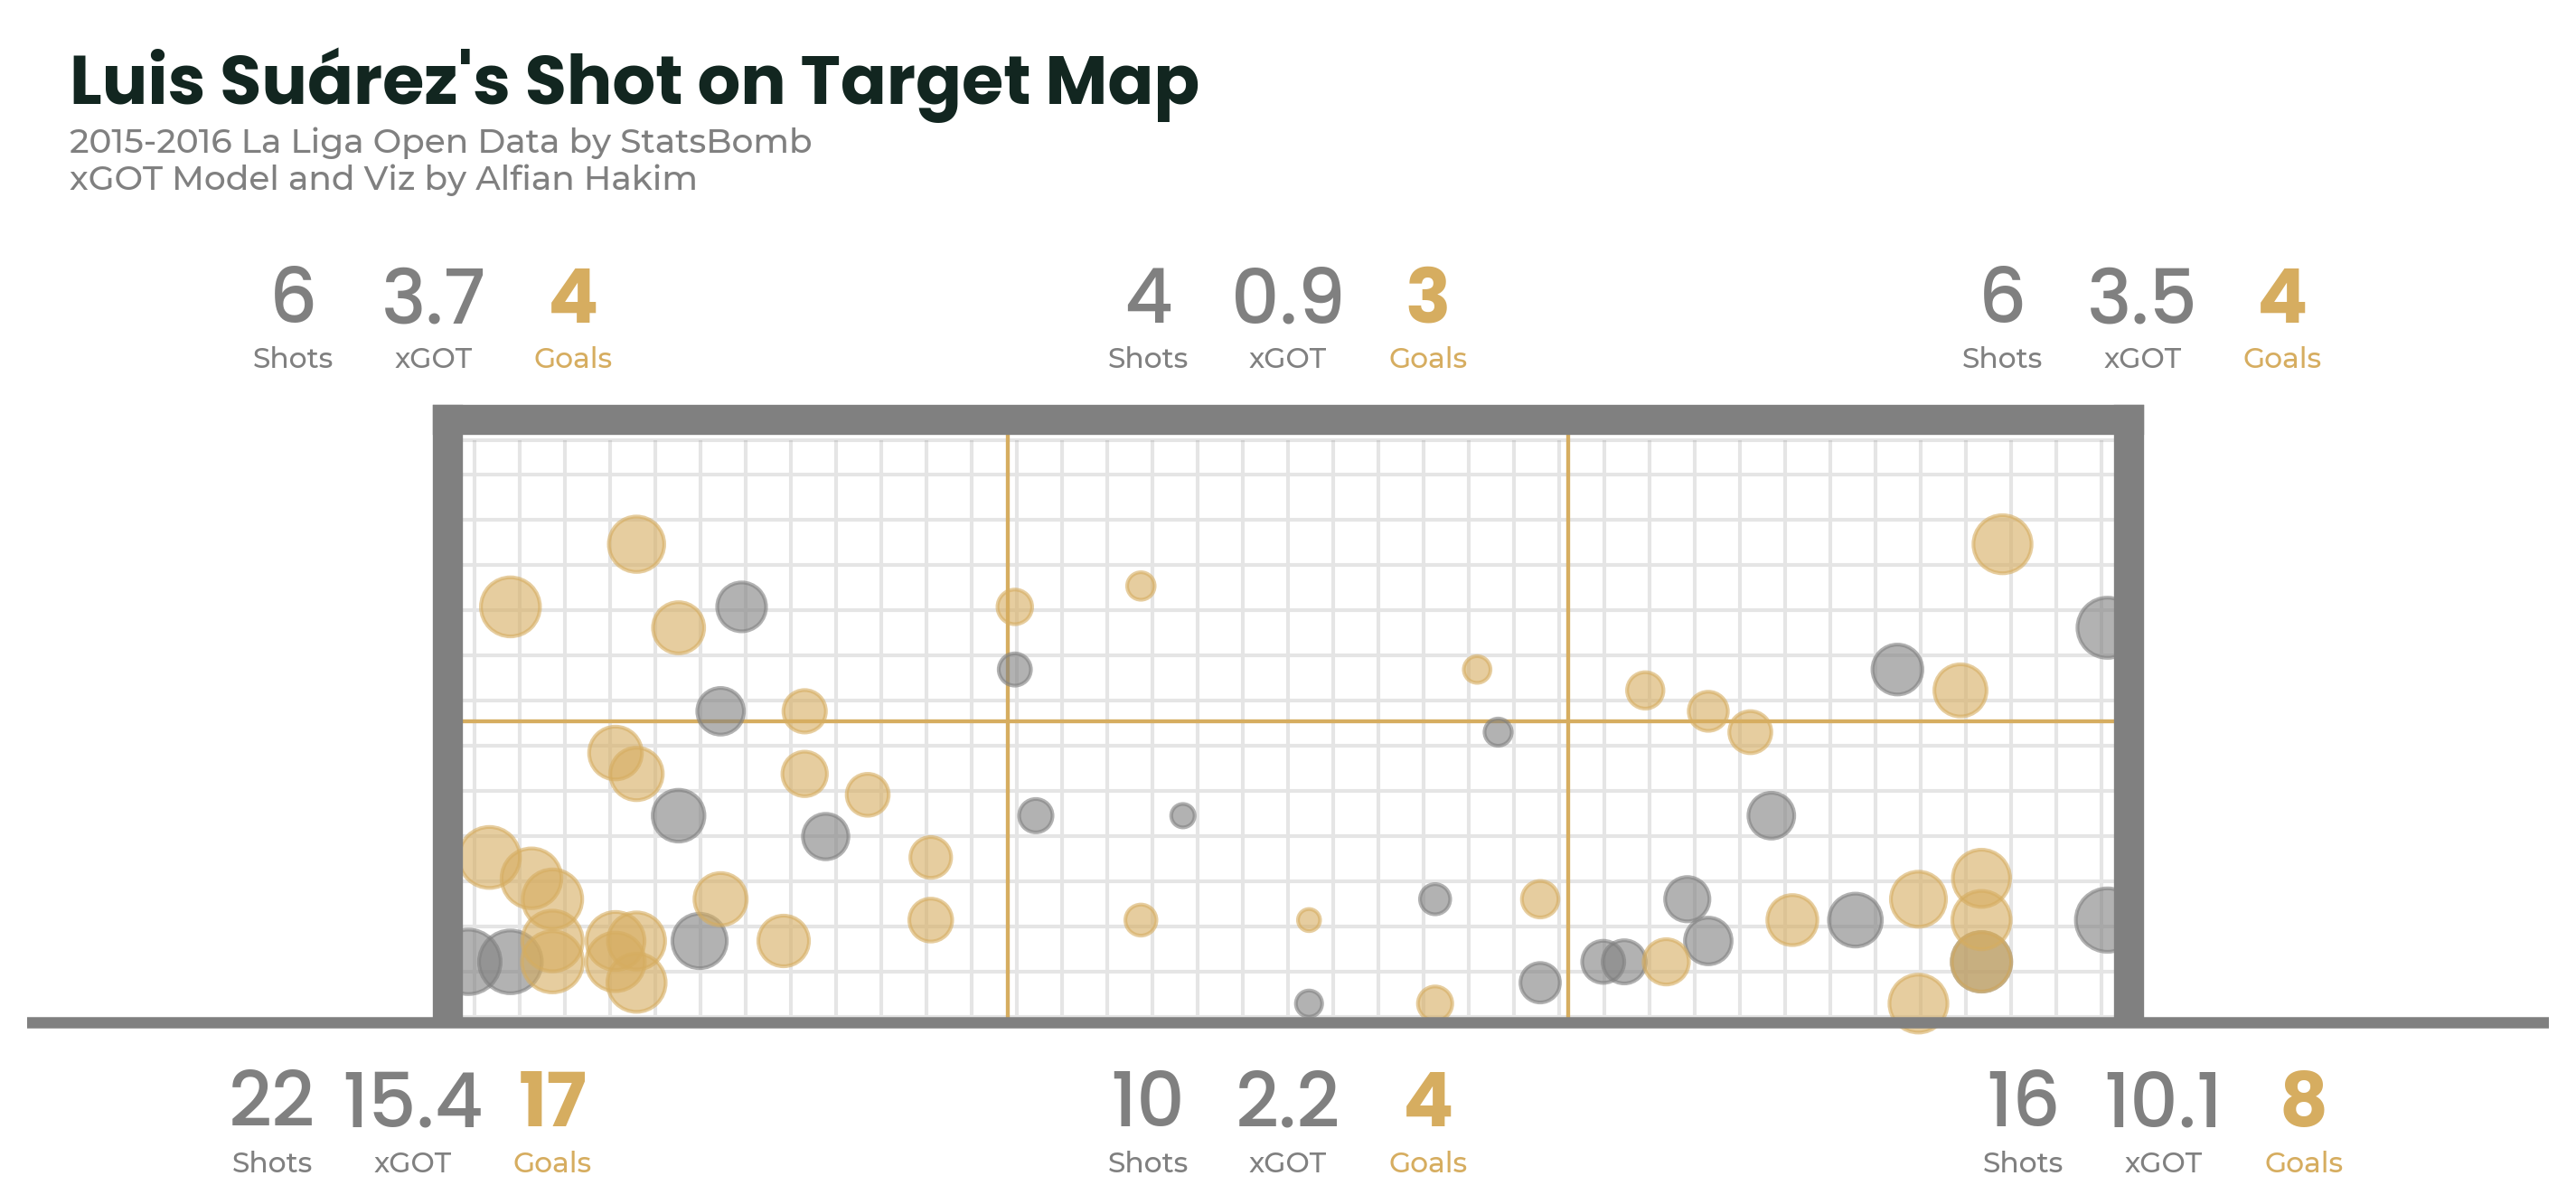

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, edgecolor='#D6AD60',facecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='#D6AD60',facecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, edgecolor='#D6AD60',facecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='#D6AD60',facecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, edgecolor='#D6AD60',facecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='#D6AD60',facecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=34.2, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='left', va='center')
plt.text(x=34.2, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='left', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

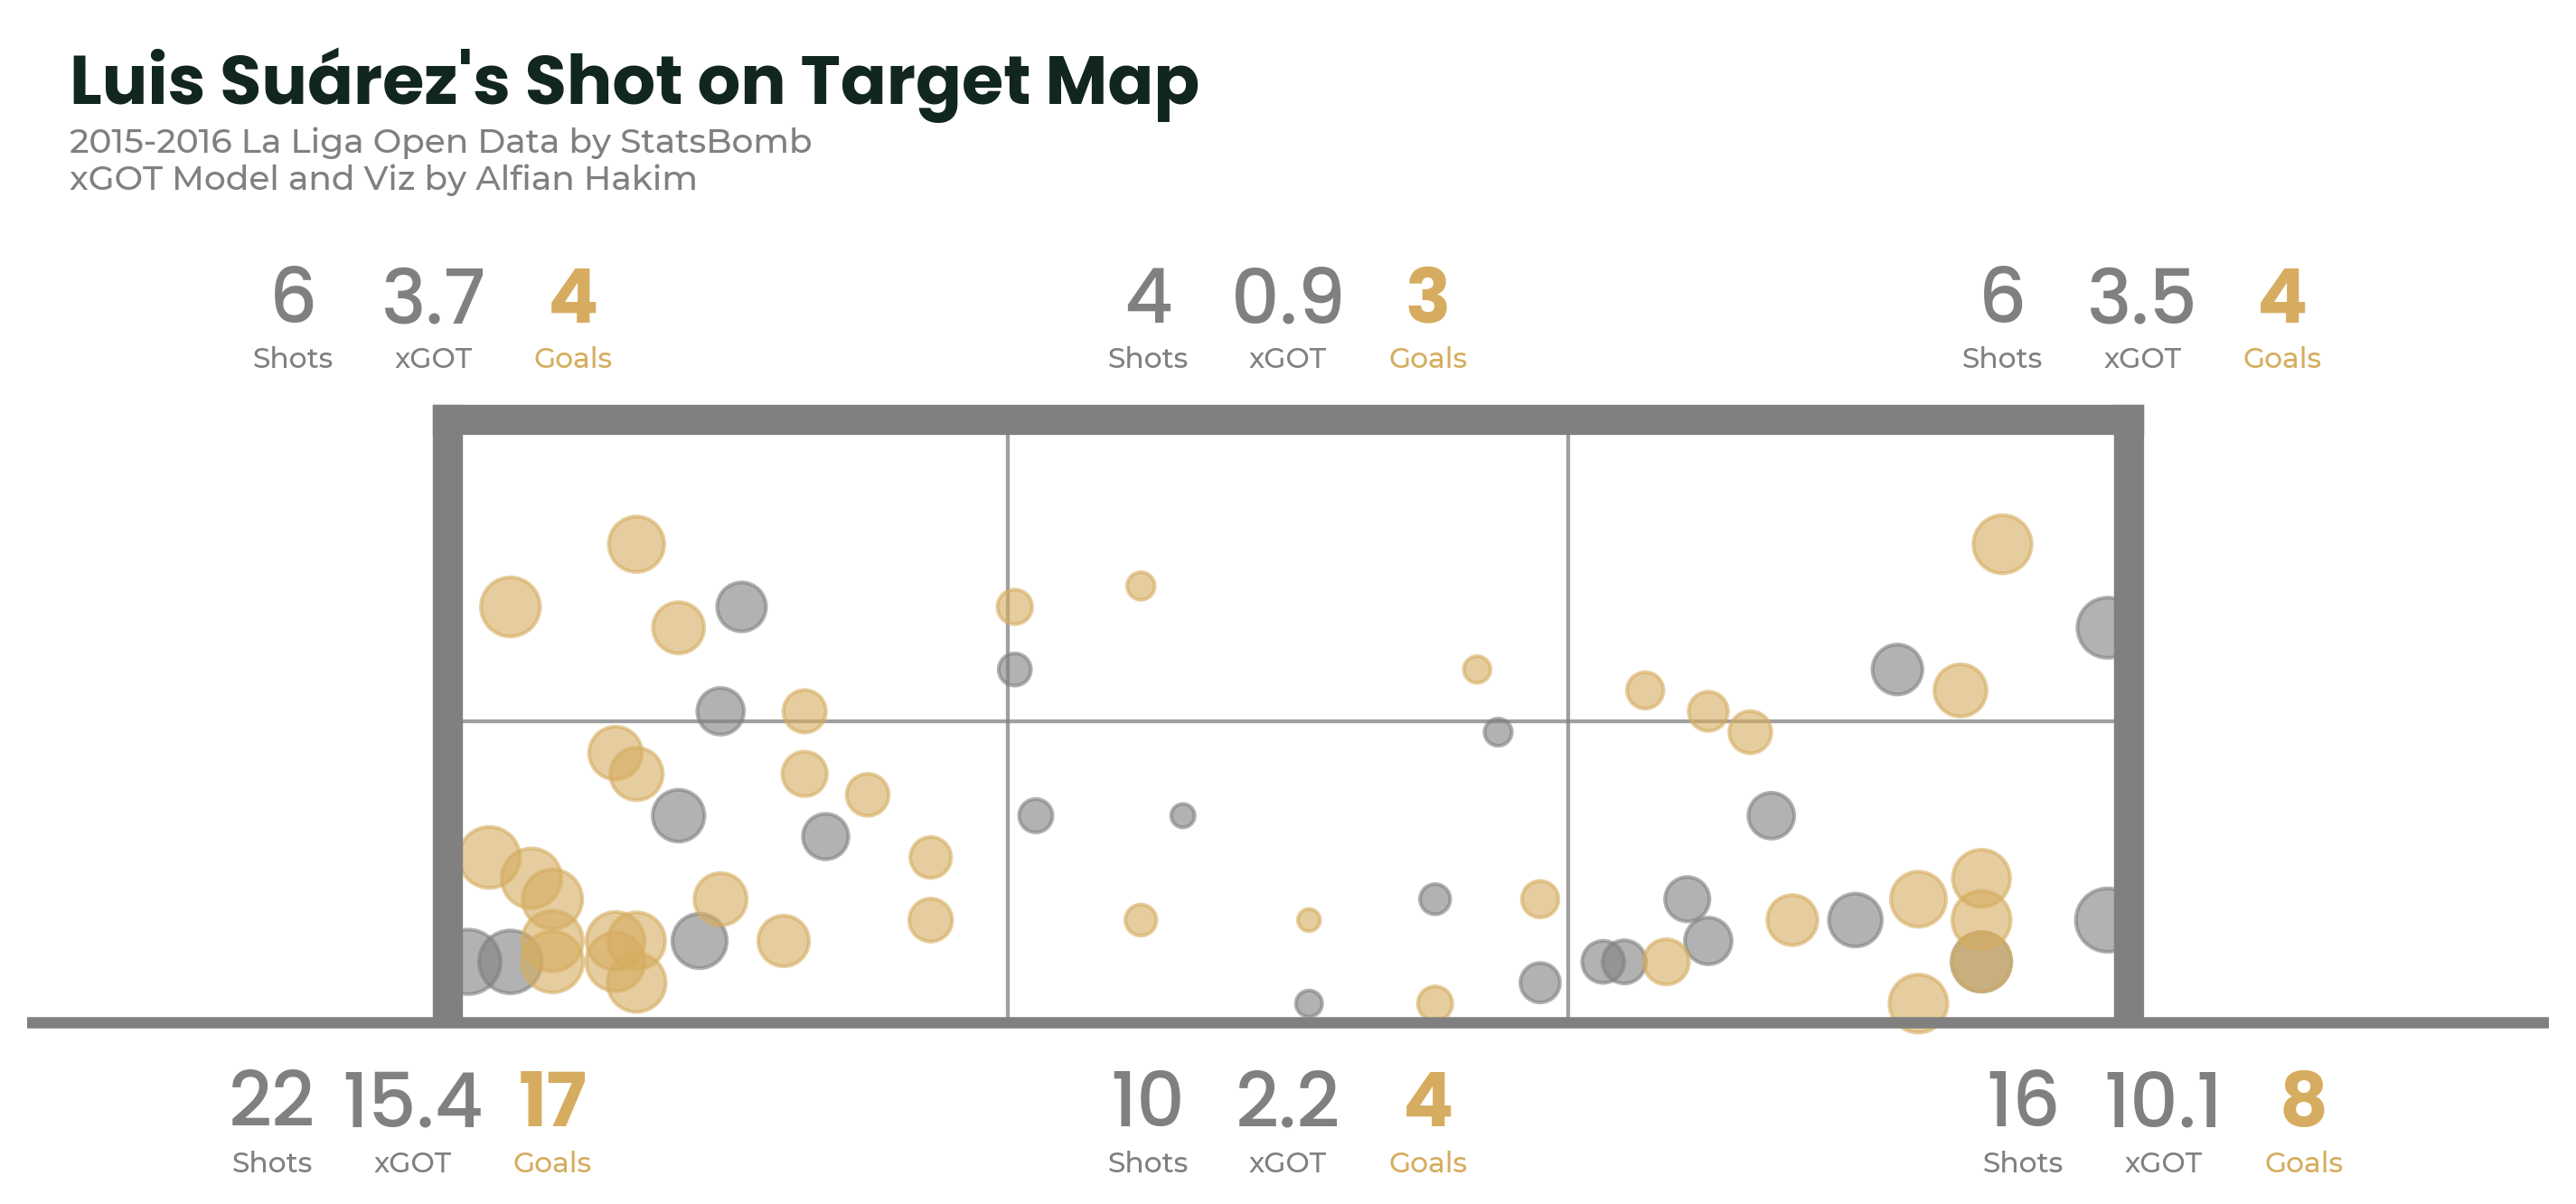

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white', dpi=300,figsize=(12,4.2))
# fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[-0.09,-0.09], color='gray', linewidth=3)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=8)
plt.plot([44,44],[0,2.8], color='gray', linewidth=8)
plt.plot([36,36],[0,2.8], color='gray', linewidth=8)
#Goal net
# plt.gca().add_patch(Rectangle((36, -0.1), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

on_target_mask = df_shot.zone.notna()
df_on_target = df_shot.loc[on_target_mask]

total = len(df_on_target)
alphas = {}
percentage = {}
total_n = {}
total_g = {}
xgot_sum = {}
for zone in df_on_target['zone'].unique():
  total_n_v = len(df_on_target.loc[df_on_target['zone']==zone])
  total_g_v = len(df_on_target.loc[(df_on_target['zone']==zone) & (df_on_target['outcome_name']=='Goal')])
  percentage[zone] = round(total_g_v/total_n_v, 2)
  total_n[zone] = total_n_v
  total_g[zone] = total_g_v
  alphas[zone] = total_n_v/total
  xgot_sum[zone] = df_on_target.loc[df_on_target['zone']==zone]['xgot'].sum()

#zone
plt.gca().add_patch(Rectangle((36, -0.1), 8/3, 2.8/2+0.05, edgecolor='gray',alpha=0.5,facecolor='none')) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='gray',alpha=0.5,facecolor='none')) # top left
plt.gca().add_patch(Rectangle((36+8/3, -0.1), 8/3, 2.8/2+0.05, edgecolor='gray',alpha=0.5,facecolor='none')) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='gray',alpha=0.5,facecolor='none')) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, -0.1), 8/3, 2.8/2+0.05, edgecolor='gray',alpha=0.5,facecolor='none')) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2-0.05), 8/3, 2.8/2, edgecolor='gray',alpha=0.5,facecolor='none')) # top right


#Tidy Axes
plt.axis('off')

goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name == 'Goal')
no_goal_mask = (df_shot.zone.notna()) & (df_shot.outcome_name != 'Goal')
sc1 = plt.scatter(df_shot[no_goal_mask].end_y, df_shot[no_goal_mask].end_z, s=df_shot[no_goal_mask].xgot*300,
                    marker='o', color='grey', label='No Goal', alpha=0.6)
sc2 = plt.scatter(df_shot[goal_mask].end_y, df_shot[goal_mask].end_z, s=df_shot[goal_mask].xgot*300,
                    marker='o', color='#D6AD60', label='Goal', alpha=0.6)

plt.text(x=36+3*8/12-1.5, y=-0.5, s="{}".format(total_g['bottom left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.5, y=-0.5, s="{}".format(total_n['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5, s="{}".format(total_g['bottom center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5, s="{}".format(total_n['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5, s="{:.1f}".format(xgot_sum['bottom center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.5, s="{}".format(total_g['bottom right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.5, s="{}".format(total_n['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.5, s="{:.1f}".format(xgot_sum['bottom right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.5, y=-0.7, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.5, y=-0.7, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.5, y=-0.7, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')


# top
plt.text(x=36+3*8/12-1.4, y=-0.5+3.85, s="{}".format(total_g['top left']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/12-1.4, y=-0.5+3.85, s="{}".format(total_n['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/12-1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top left']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+3*8/12-1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/12-1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/12-1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+8/3+3*8/12, y=-0.5+3.85, s="{}".format(total_g['top center']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+8/3+8/12, y=-0.5+3.85, s="{}".format(total_n['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+8/3+2*8/12, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top center']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+8/3+3*8/12, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+8/12, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+8/3+2*8/12, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.5+3.85, s="{}".format(total_g['top right']), color='#D6AD60', fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.5+3.85, s="{}".format(total_n['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.5+3.85, s="{:.1f}".format(xgot_sum['top right']), color='gray', fontfamily='Poppins', fontsize=20, ha='center', va='center')

plt.text(x=36+2*8/3+3*8/12+1.4, y=-0.7+3.85, s="{}".format('Goals'), color='#D6AD60', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+8/12+1.4, y=-0.7+3.85, s="{}".format('Shots'), color='gray', fontsize=20*15/40, ha='center', va='top')
plt.text(x=36+2*8/3+2*8/12+1.4, y=-0.7+3.85, s="{}".format('xGOT'), color='gray', fontsize=20*15/40, ha='center', va='top')

# title
plt.text(x=34.2, y=4.4, s="Luis Suárez's Shot on Target Map".format(total_g['top left']), fontfamily='Poppins', fontsize=18, weight="bold", ha='left', va='center')
plt.text(x=34.2, y=4.2, s="2015-2016 La Liga Open Data by StatsBomb\nxGOT Model and Viz by Alfian Hakim".format(total_g['top left']), color='gray', fontsize=9, ha='left', va='top')
plt.text(x=34.5, y=4.5, s=" ", fontfamily='Poppins', fontsize=20, weight="bold", ha='center', va='center')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

### Time of the goal

In [ ]:
df_shot['minute'] = df_shot['minute'].astype(int)
df_shot['minute'] = df_shot['minute']+1
df_shot['minute'].describe()

count    139.000000
mean      49.438849
std       26.591411
min        2.000000
25%       26.000000
50%       53.000000
75%       73.000000
max       93.000000
Name: minute, dtype: float64

In [ ]:
df_shot['minute_group'] = '1-15'
df_shot.loc[df_shot['minute']>15,'minute_group'] = '16-30'
df_shot.loc[df_shot['minute']>30,'minute_group'] = '31-45'
df_shot.loc[(df_shot['minute']>45) & (df_shot['period']==1),'minute_group'] = '45+'
df_shot.loc[(df_shot['minute']>45) & (df_shot['period']==2),'minute_group'] = '46-60'
df_shot.loc[df_shot['minute']>60,'minute_group'] = '61-75'
df_shot.loc[df_shot['minute']>75,'minute_group'] = '76-90'
df_shot.loc[df_shot['minute']>90,'minute_group'] = '90+'

In [ ]:
df_shot[goal_mask].period.value_counts()

2    29
1    11
Name: period, dtype: int64

In [ ]:
df_shot.minute_group.value_counts()

61-75    27
76-90    25
46-60    24
1-15     23
31-45    19
16-30    17
90+       3
45+       1
Name: minute_group, dtype: int64

In [ ]:
df_shot.head()

period  minute match_id      x     y  end_y  end_z play_pattern_name  \
0      1       7  3825660   99.6  53.3   30.7    0.2    From Free Kick   
1      1       8  3825660  104.1  30.9   61.8    NaN     From Throw In   
2      1      31  3825660  107.9  54.8   53.2    NaN      Regular Play   
3      2      54  3825660  110.2  34.3   31.8    3.8    From Free Kick   
4      2      70  3825660  108.4  40.1   36.8    0.3             Other   

  sub_type_name  under_pressure body_part_name technique_name shot_first_time  \
0     Open Play             NaN     Right Foot    Half Volley            True   
1     Open Play             NaN      Left Foot    Half Volley             NaN   
2     Open Play             NaN     Right Foot    Half Volley            True   
3     Open Play             NaN           Head         Normal             NaN   
4       Penalty             NaN     Right Foot         Normal             NaN   

                       shot_key_pass_id outcome_name  shot_statsbomb_xg  \
0  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9        Off T           0.042416   
1  de6bd253-117d-44a5-9d54-66365447a881      Wayward           0.046983   
2  eecb1d60-6528-4947-bd10-b70ca99b0665      Blocked           0.029568   
3  dd1b2bcd-8c2e-46a6-87e4-06c82b6986a0        Off T           0.074190   
4                                   NaN         Goal           0.783500   

     opponent home_away match_date  match_week         zone      xgot  \
0  Villarreal      home 2015-11-08          11          NaN       NaN   
1  Villarreal      home 2015-11-08          11          NaN       NaN   
2  Villarreal      home 2015-11-08          11          NaN       NaN   
3  Villarreal      home 2015-11-08          11          NaN       NaN   
4  Villarreal      home 2015-11-08          11  bottom left  0.791046   

  minute_group  
0         1-15  
1         1-15  
2        31-45  
3        46-60  
4        61-75

In [ ]:
df_bar = df_shot.groupby('minute_group',as_index=False)['match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'minute_group':'minute','match_id':'shots'},axis=1)
df_bar.head()

<ipython-input-98-8d709a06f4e5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar = df_shot.groupby('minute_group',as_index=False)['match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'minute_group':'minute','match_id':'shots'},axis=1)


minute  shots  shot_statsbomb_xg      xgot
0   1-15     23           2.993097  3.770806
1  16-30     17           4.289523  2.718279
2  31-45     19           2.220401  3.756867
3    45+      1           0.395132  0.000000
4  46-60     24           4.821723  6.273224

In [ ]:
df_bar_2 = df_shot.loc[goal_mask].groupby('minute_group',as_index=False)['match_id'].count().rename({'minute_group':'minute','match_id':'goals'},axis=1)
df_bar_2 = pd.merge(df_bar,df_bar_2, how='left').fillna(0)
df_bar_2['goals'] = df_bar_2['goals'].astype(int)
df_bar_2

minute  shots  shot_statsbomb_xg      xgot  goals
0   1-15     23           2.993097  3.770806      3
1  16-30     17           4.289523  2.718279      4
2  31-45     19           2.220401  3.756867      4
3    45+      1           0.395132  0.000000      0
4  46-60     24           4.821723  6.273224      9
5  61-75     27           8.118211  9.835579      9
6  76-90     25           4.174268  9.032843     10
7    90+      3           0.636301  0.465139      1

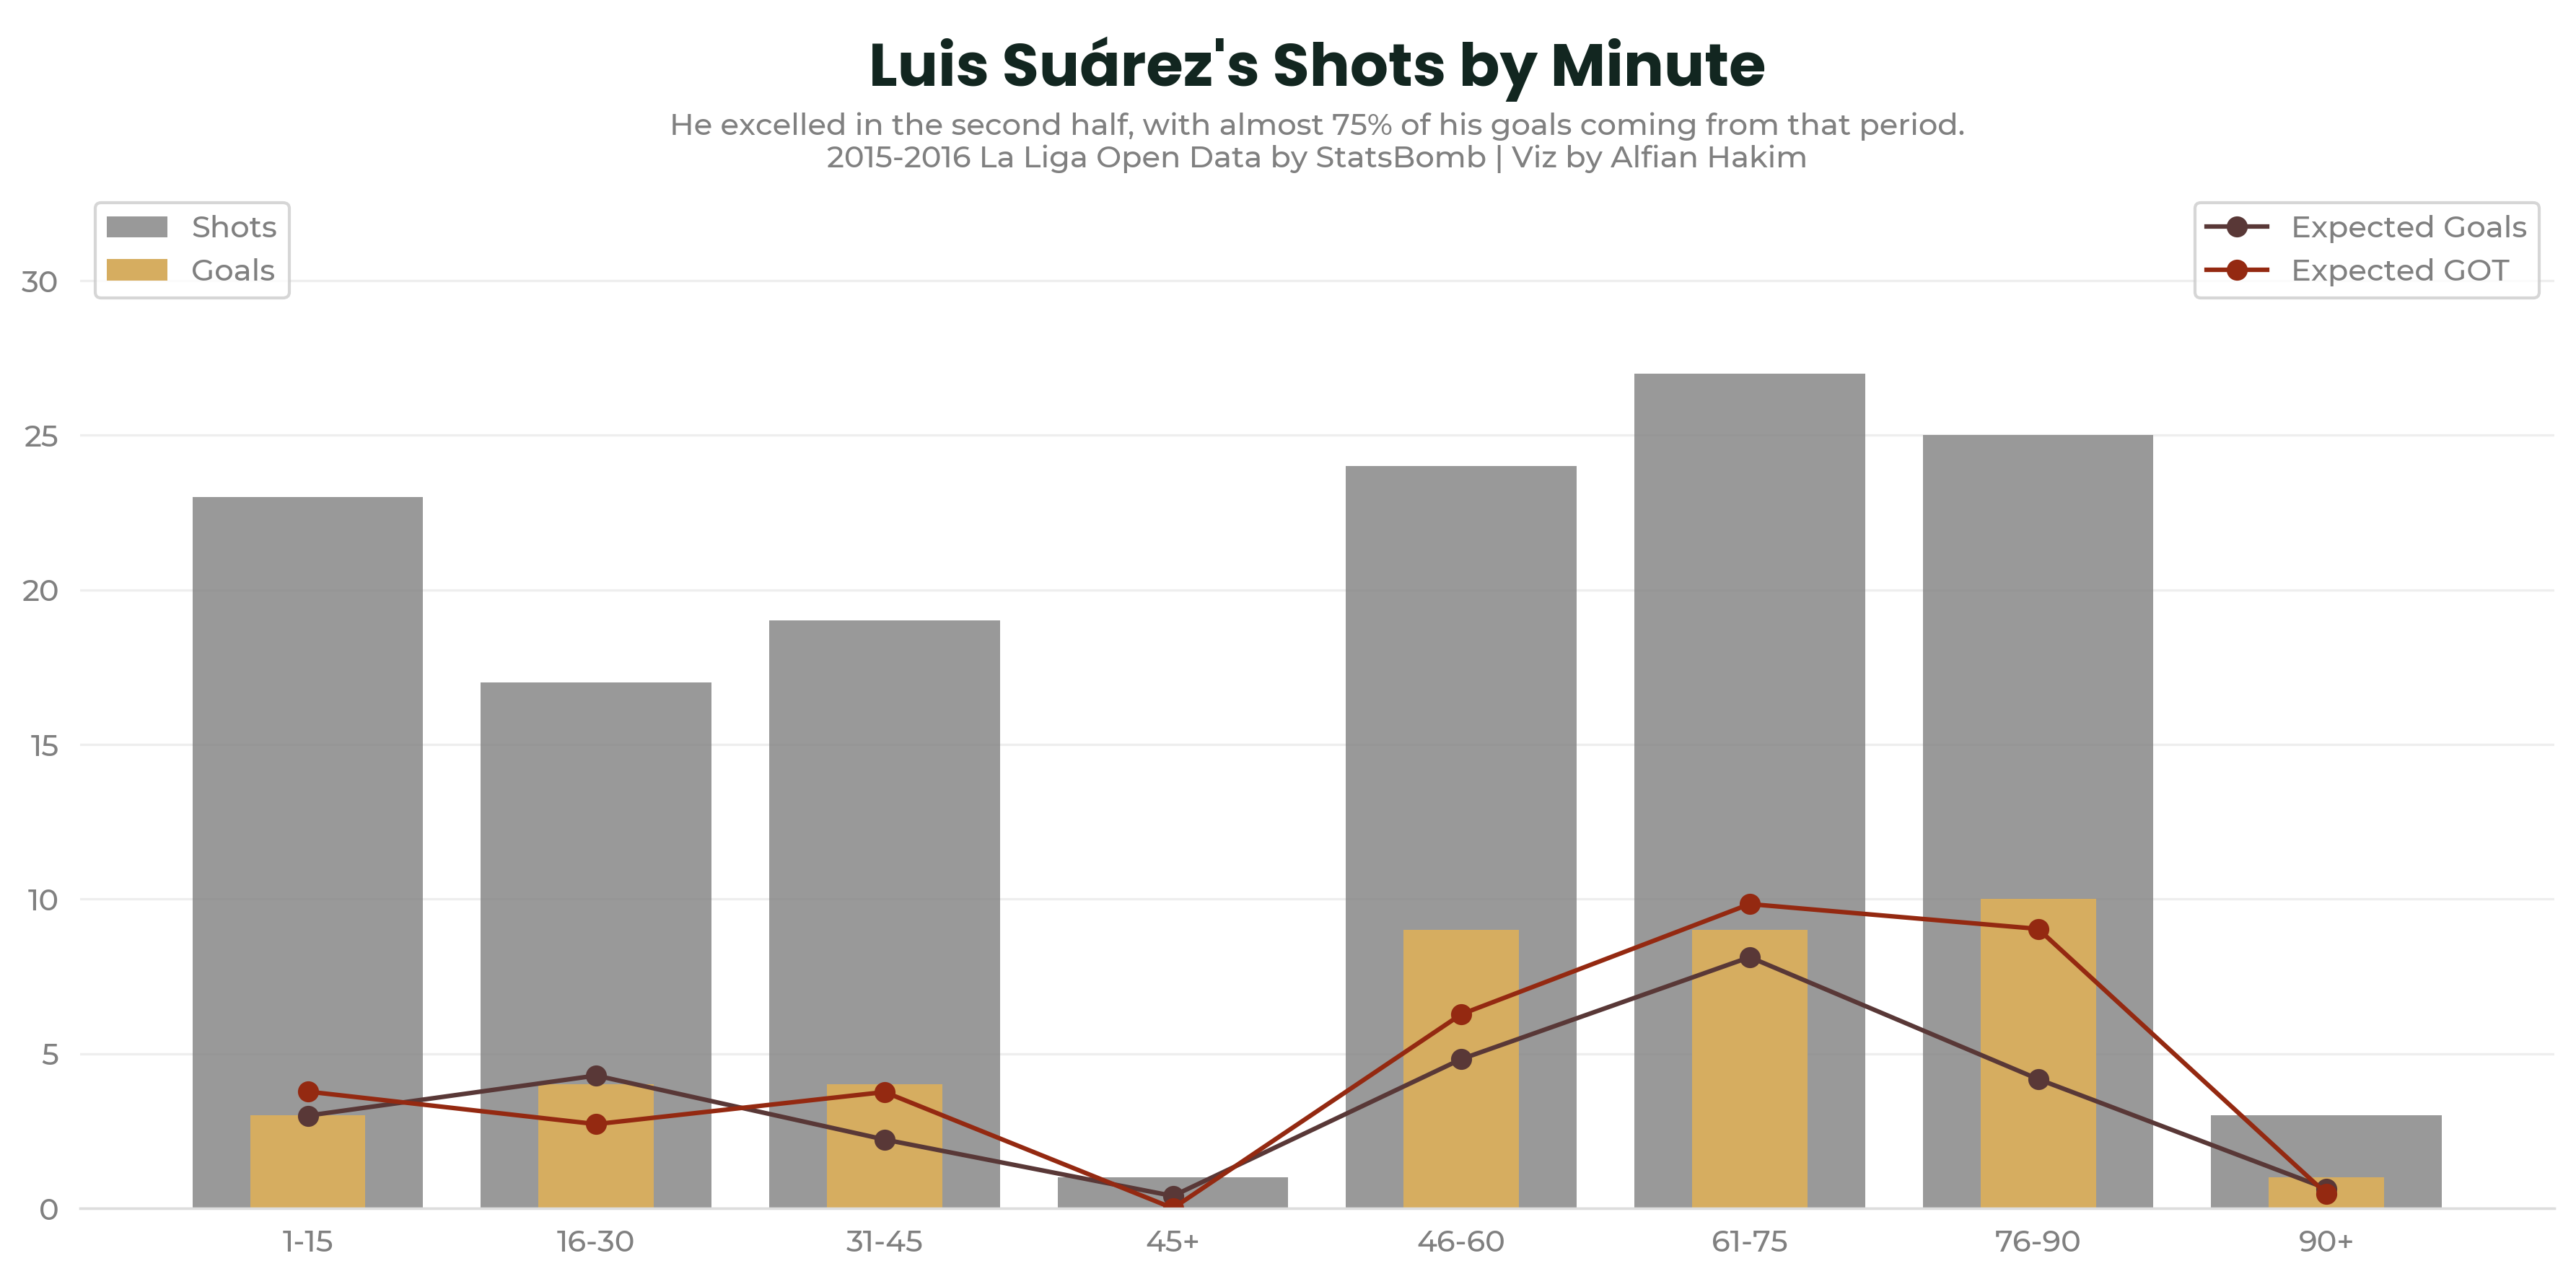

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_2['minute'], df_bar_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_2['minute'], df_bar_2['goals'], label='Goals', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_2['minute'], ha='center',va='top',color='gray')
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Minute", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"He excelled in the second half, with almost 75% of his goals coming from that period.\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper left', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 33

ax1.set_ylim(y_min, y_max)

ax2 = ax1.twinx()
ax2.set_ylim(y_min, y_max)

# Create the line chart for the xG column
ax2.plot(df_bar_2['minute'], df_bar_2['shot_statsbomb_xg'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_2['minute'], df_bar_2['xgot'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='upper right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)


# Display the plot
plt.tight_layout()
plt.show()


### Consistency

In [ ]:
df_shot['month_year'] = df_shot['match_date'].astype(str).str[:7]

In [ ]:
df_shot['year'] = df_shot['match_date'].astype(str).str[:4]

In [ ]:
df_shot.year.value_counts()

2016    77
2015    62
Name: year, dtype: int64

In [ ]:
df_shot[goal_mask].year.value_counts()

2016    25
2015    15
Name: year, dtype: int64

In [ ]:
df_shot.groupby('year',as_index=False)['shot_statsbomb_xg'].sum()

year  shot_statsbomb_xg
0  2015           9.260069
1  2016          18.388587

In [ ]:
df_shot.sort_values('month_year')

period  minute match_id      x     y  end_y  end_z play_pattern_name  \
69      2      61   267422  112.4  38.6   30.6    1.4       From Corner   
66      1      10   267422  115.9  50.0   52.6    NaN    From Free Kick   
67      1      36   267422  108.6  31.2   37.8    0.8       From Keeper   
68      1      42   267422  107.2  23.3   37.3    1.4      Regular Play   
70      2      77   267422  115.1  31.6   35.6    1.9       From Corner   
..    ...     ...      ...    ...   ...    ...    ...               ...   
59      2      52   265958  108.3  43.4   41.7    1.5      Regular Play   
60      2      61   265958  110.1  40.1   38.0    1.0       From Corner   
91      2      86   267506  111.3  46.6   40.7    0.0     From Throw In   
58      1      10   265958  114.2  50.8   43.9    0.4      Regular Play   
90      1      38   267506  116.0  45.2   42.2    1.3      Regular Play   

   sub_type_name  under_pressure body_part_name technique_name  \
69     Open Play             1.0           Head         Normal   
66     Open Play             NaN     Right Foot       Backheel   
67     Open Play             1.0      Left Foot         Normal   
68     Open Play             NaN     Right Foot         Normal   
70     Open Play             NaN      Left Foot         Normal   
..           ...             ...            ...            ...   
59     Open Play             1.0     Right Foot         Normal   
60     Open Play             NaN           Head         Normal   
91     Open Play             NaN     Right Foot         Normal   
58     Open Play             1.0     Right Foot         Normal   
90     Open Play             NaN           Head         Normal   

   shot_first_time                      shot_key_pass_id outcome_name  \
69             NaN  b473c4da-58a1-43fd-bbea-a7cd84a6bd0c        Off T   
66            True                                   NaN      Wayward   
67            True  442d03d8-427c-44e0-8bf3-721ab093a315        Saved   
68             NaN                                   NaN        Saved   
70            True                                   NaN        Off T   
..             ...                                   ...          ...   
59             NaN  c00f17a6-0527-4fca-b2bf-bd2b64f4e8e2         Goal   
60             NaN  1b1cf446-bd02-4f88-bd93-d0a2a7efadfb         Goal   
91            True  9916c18c-643b-49a2-a21f-4fe163708591         Goal   
58            True  c407dd38-0a5f-4353-9ebc-ac85923b44c5        Saved   
90             NaN  b9e3d7c1-9598-4a06-a630-566b706e402e         Goal   

    shot_statsbomb_xg  opponent home_away match_date  match_week  \
69           0.089365    Málaga      home 2015-08-29           2   
66           0.093788    Málaga      home 2015-08-29           2   
67           0.047548    Málaga      home 2015-08-29           2   
68           0.033389    Málaga      home 2015-08-29           2   
70           0.138899    Málaga      home 2015-08-29           2   
..                ...       ...       ...        ...         ...   
59           0.450684  Espanyol      home 2016-05-08          37   
60           0.098158  Espanyol      home 2016-05-08          37   
91           0.654584   Granada      away 2016-05-14          38   
58           0.106565  Espanyol      home 2016-05-08          37   
90           0.276487   Granada      away 2016-05-14          38   

             zone      xgot minute_group month_year  year  
69            NaN       NaN        61-75    2015-08  2015  
66            NaN       NaN         1-15    2015-08  2015  
67    bottom left  0.485397        31-45    2015-08  2015  
68       top left  0.511246        31-45    2015-08  2015  
70            NaN       NaN        76-90    2015-08  2015  
..            ...       ...          ...        ...   ...  
59      top right  0.310799        46-60    2016-05  2016  
60    bottom left  0.413861        61-75    2016-05  2016  
91  bottom center  0.276761        76-90    2016-05  2016  
58   bottom rig

In [ ]:
df_bar = df_shot.groupby('month_year',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',
                                                                                                                                                                                                   'match_id':'matches'},axis=1)
df_bar_2 = df_shot.loc[goal_mask].groupby('month_year',as_index=False)['period'].count().rename({'period':'goals'},axis=1)
df_bar_2 = pd.merge(df_bar,df_bar_2, how='left').fillna(0)
df_bar_2['goals'] = df_bar_2['goals'].astype(int)
df_bar_2

<ipython-input-107-125aec659efb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar = df_shot.groupby('month_year',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',


month_year  matches  shots  shot_statsbomb_xg      xgot  goals
0    2015-08        2      8           1.009020  1.675875      1
1    2015-09        2      8           0.983946  2.352027      2
2    2015-10        4     20           2.943108  5.660930      5
3    2015-11        3     13           2.546542  3.679140      4
4    2015-12        3     13           1.777453  3.486954      3
5    2016-01        5     16           1.958172  2.354680      4
6    2016-02        5     19           5.770968  6.918131      6
7    2016-03        3     12           1.957925  1.995195      1
8    2016-04        5     24           6.359842  4.579061      9
9    2016-05        2      6           2.341680  3.150745      5

In [ ]:
month_replace = {'2015-08':'Aug 2015', '2015-09':'Sep 2015', '2015-10':'Oct 2015', '2015-11':'Nov 2015', '2015-12':'Dec 2015',
                 '2016-01':'Jan 2016', '2016-02':'Feb 2016', '2016-03':'Mar 2016', '2016-04':'Apr 2016', '2016-05':'May 2015'}

for key in month_replace.keys():
  df_bar_2['month_year'] = df_bar_2['month_year'].str.replace(key, month_replace[key])

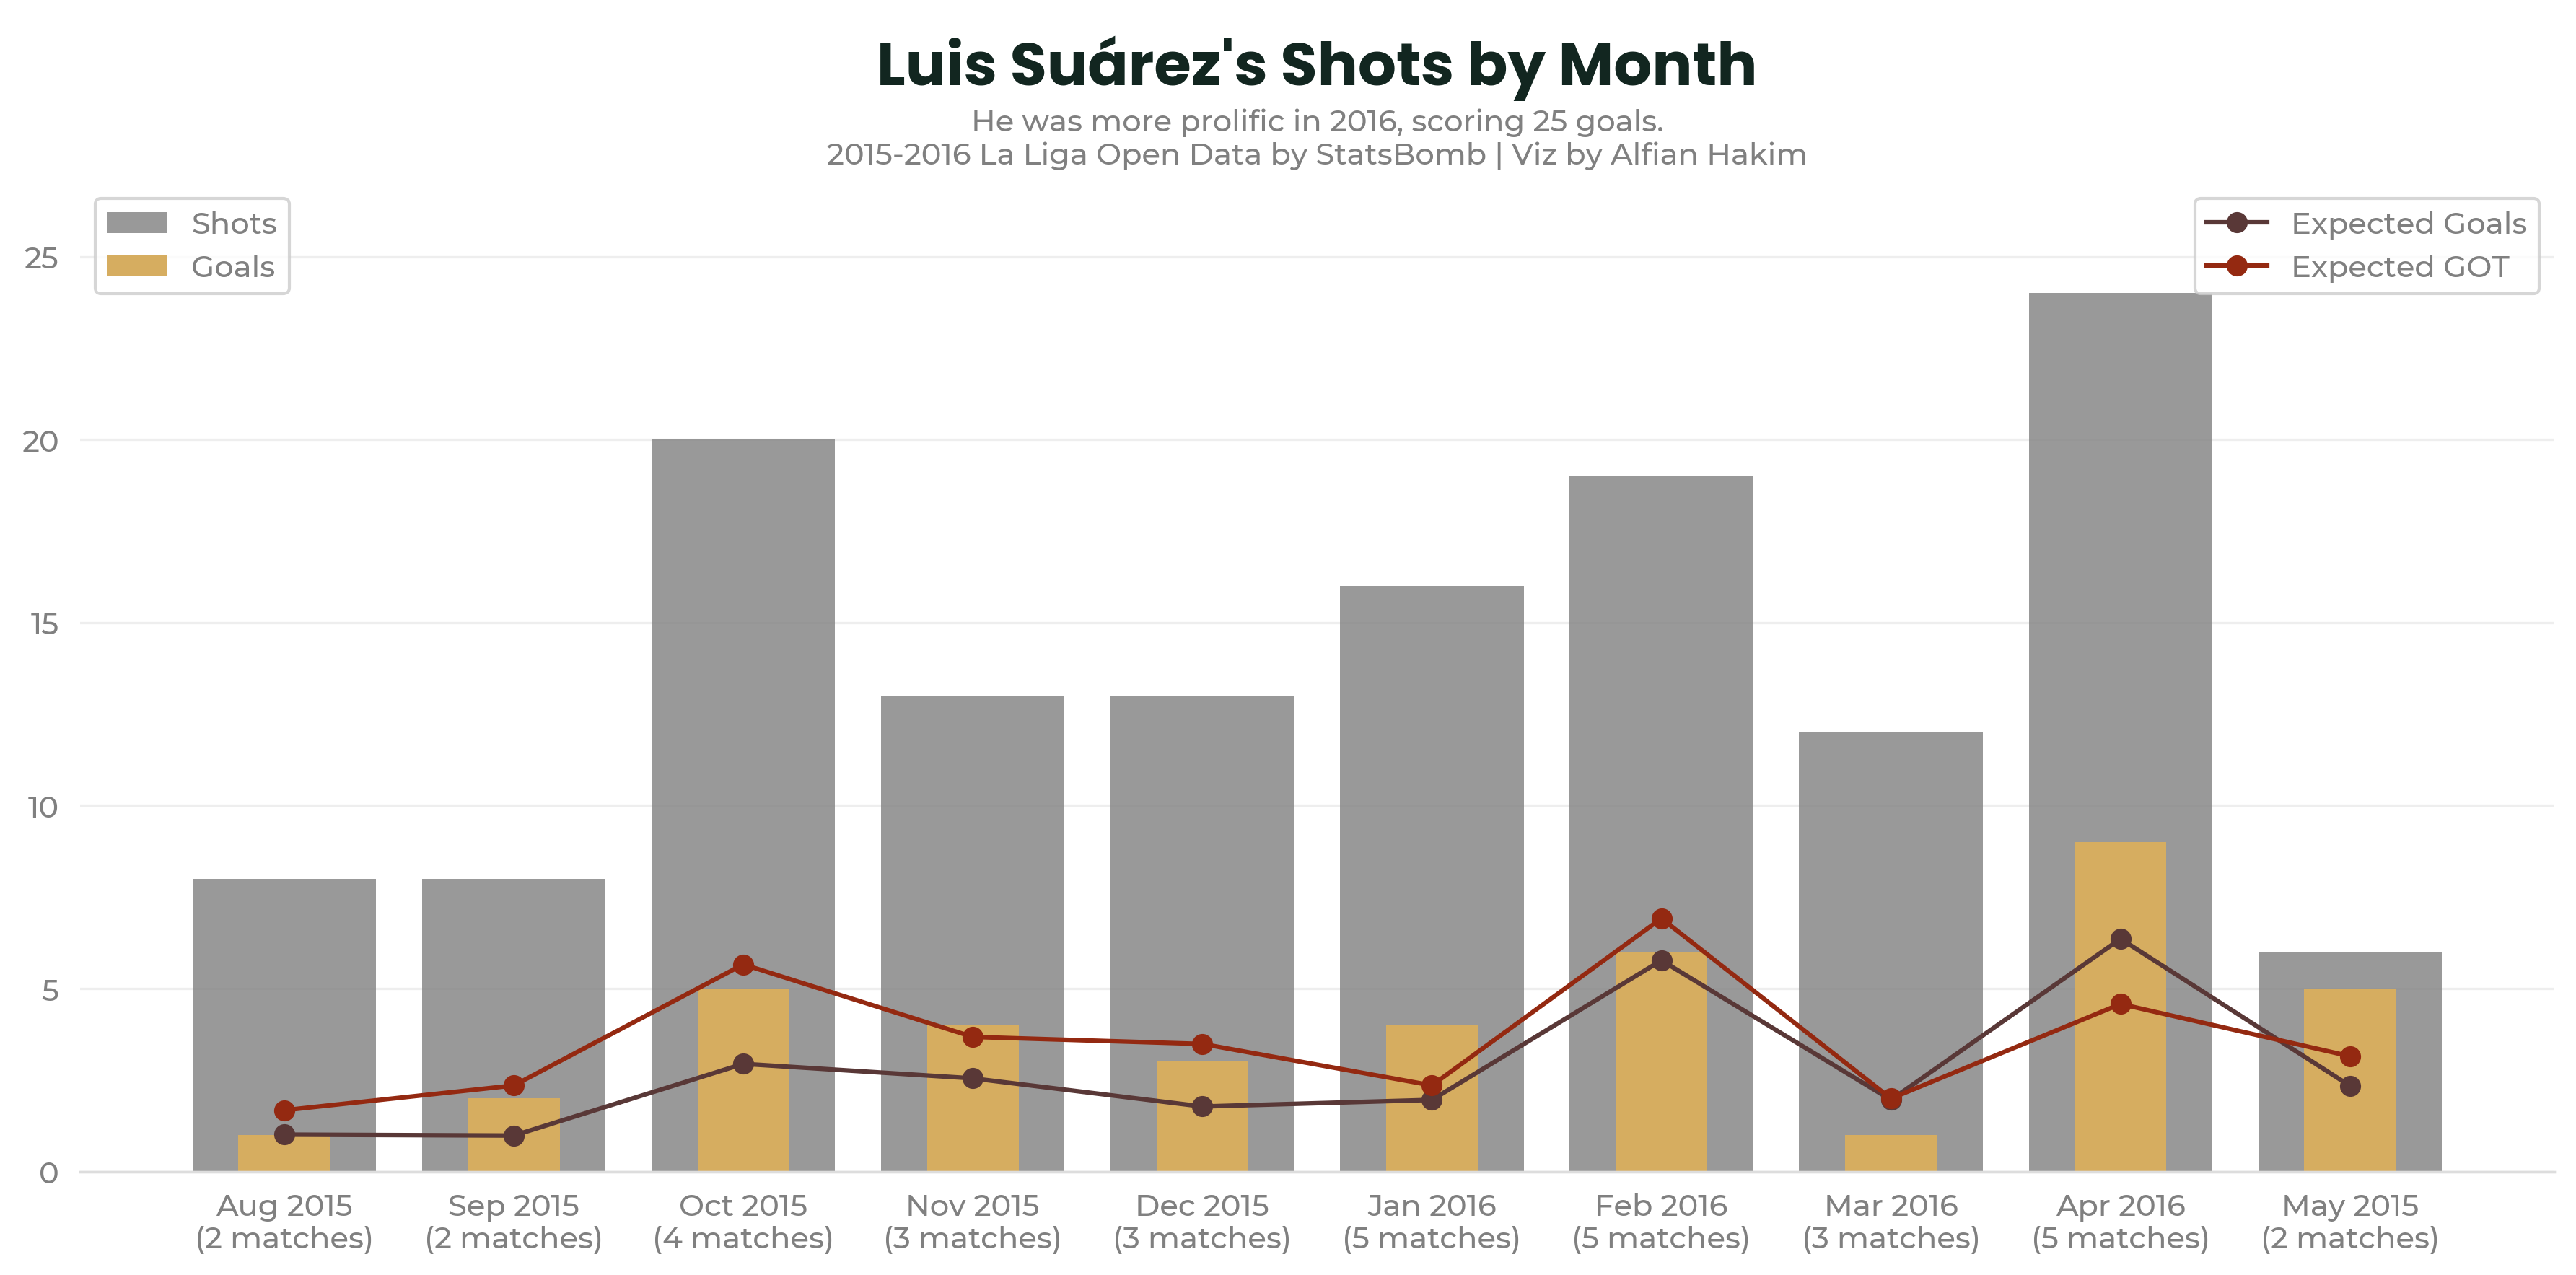

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_2['month_year'], df_bar_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_2['month_year'], df_bar_2['goals'], label='Goals', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_2['month_year']+"\n("+df_bar_2['matches'].astype(str)+" matches)", ha='center',va='top',color='gray')
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Month", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"He was more prolific in 2016, scoring 25 goals.\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper left', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 27

ax1.set_ylim(y_min, y_max)

ax2 = ax1.twinx()
ax2.set_ylim(y_min, y_max)

# Create the line chart for the xG column
ax2.plot(df_bar_2['month_year'], df_bar_2['shot_statsbomb_xg'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_2['month_year'], df_bar_2['xgot'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='upper right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)


# Display the plot
plt.tight_layout()
plt.show()


### Home-Away

In [ ]:
df_shot.home_away.value_counts()

home    76
away    63
Name: home_away, dtype: int64

In [ ]:
df_shot[goal_mask].home_away.value_counts()

home    23
away    17
Name: home_away, dtype: int64

In [ ]:
df_bar_ha = df_shot.groupby('home_away',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',
                                                                                                                                                                                                   'match_id':'matches'},axis=1)
df_bar_ha_2 = df_shot.loc[goal_mask].groupby('home_away',as_index=False)['period'].count().rename({'period':'goals'},axis=1)
df_bar_ha_2 = pd.merge(df_bar_ha,df_bar_ha_2, how='left').fillna(0)
df_bar_ha_2['goals'] = df_bar_ha_2['goals'].astype(int)
df_bar_ha_2 = df_bar_ha_2.sort_values('home_away', ascending=False).reset_index(drop=True)

df_bar_ha_2['home_away'] = df_bar_ha_2['home_away'].str.replace('home','Home')
df_bar_ha_2['home_away'] = df_bar_ha_2['home_away'].str.replace('away','Away')

<ipython-input-46-9dc21d159471>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar_ha = df_shot.groupby('home_away',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',


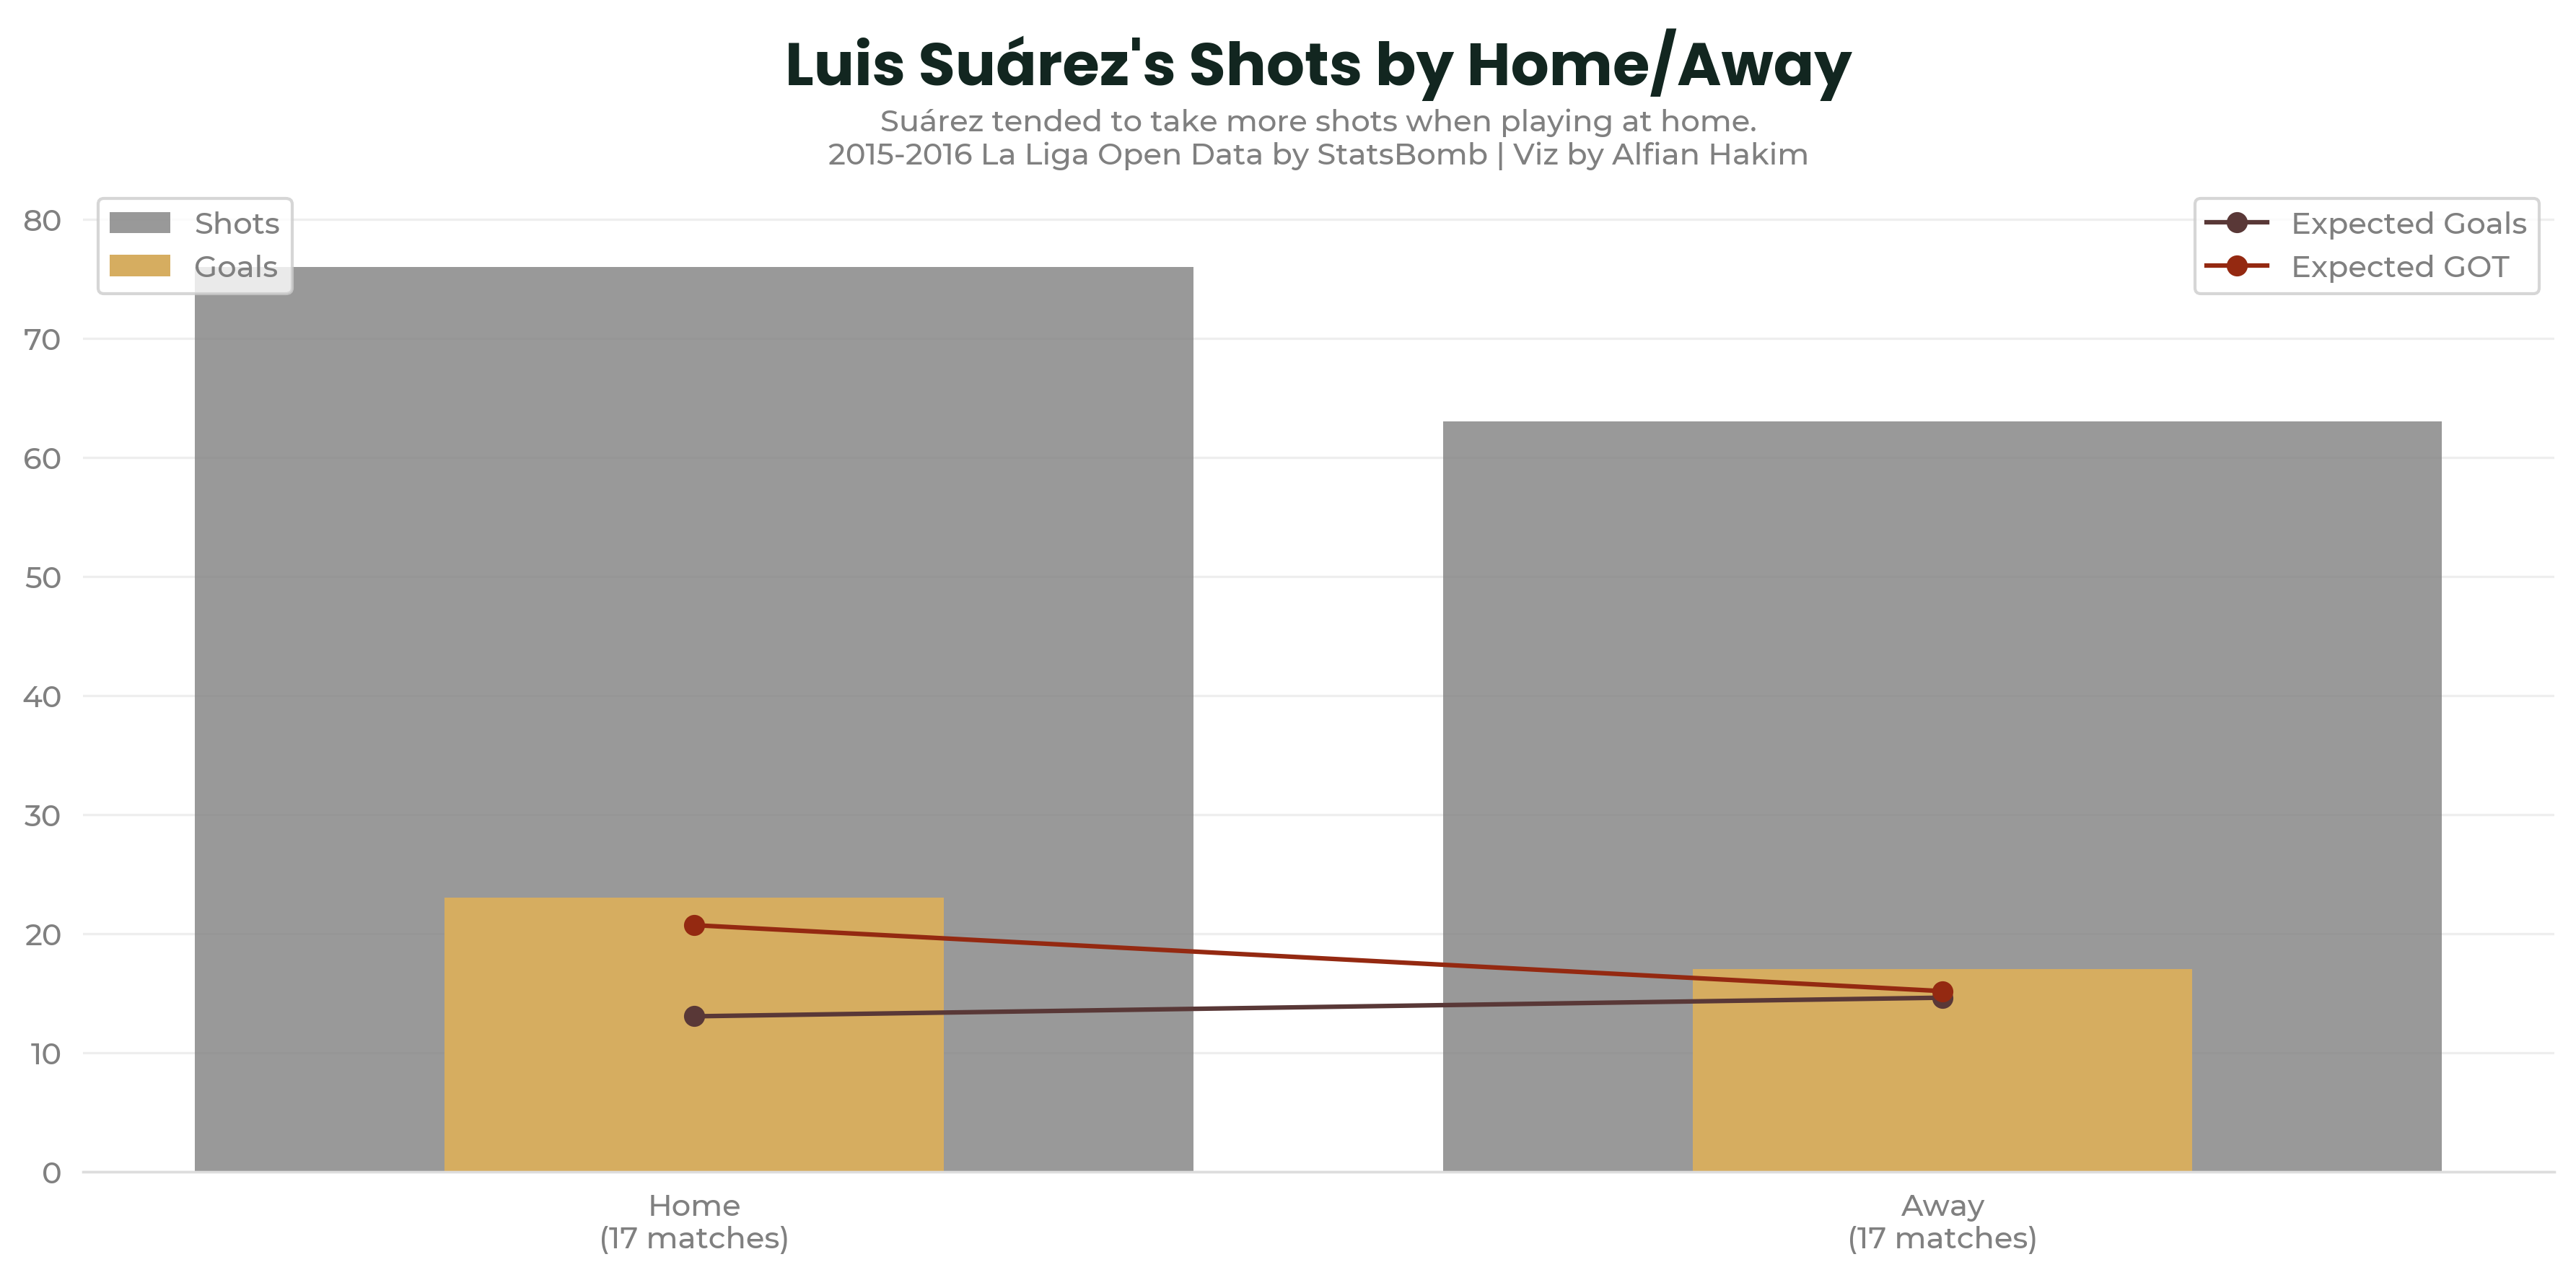

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_ha_2['home_away'], df_bar_ha_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_ha_2['home_away'], df_bar_ha_2['goals'], label='Goals', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_ha_2['home_away']+"\n("+df_bar_ha_2['matches'].astype(str)+" matches)", ha='center',va='top',color='gray')
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Home/Away", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"Suárez tended to take more shots when playing at home.\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper left', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 83

ax1.set_ylim(y_min, y_max)

ax2 = ax1.twinx()
ax2.set_ylim(y_min, y_max)

# Create the line chart for the xG column
ax2.plot(df_bar_ha_2['home_away'], df_bar_ha_2['shot_statsbomb_xg'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_ha_2['home_away'], df_bar_ha_2['xgot'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='upper right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)


# Display the plot
plt.tight_layout()
plt.show()


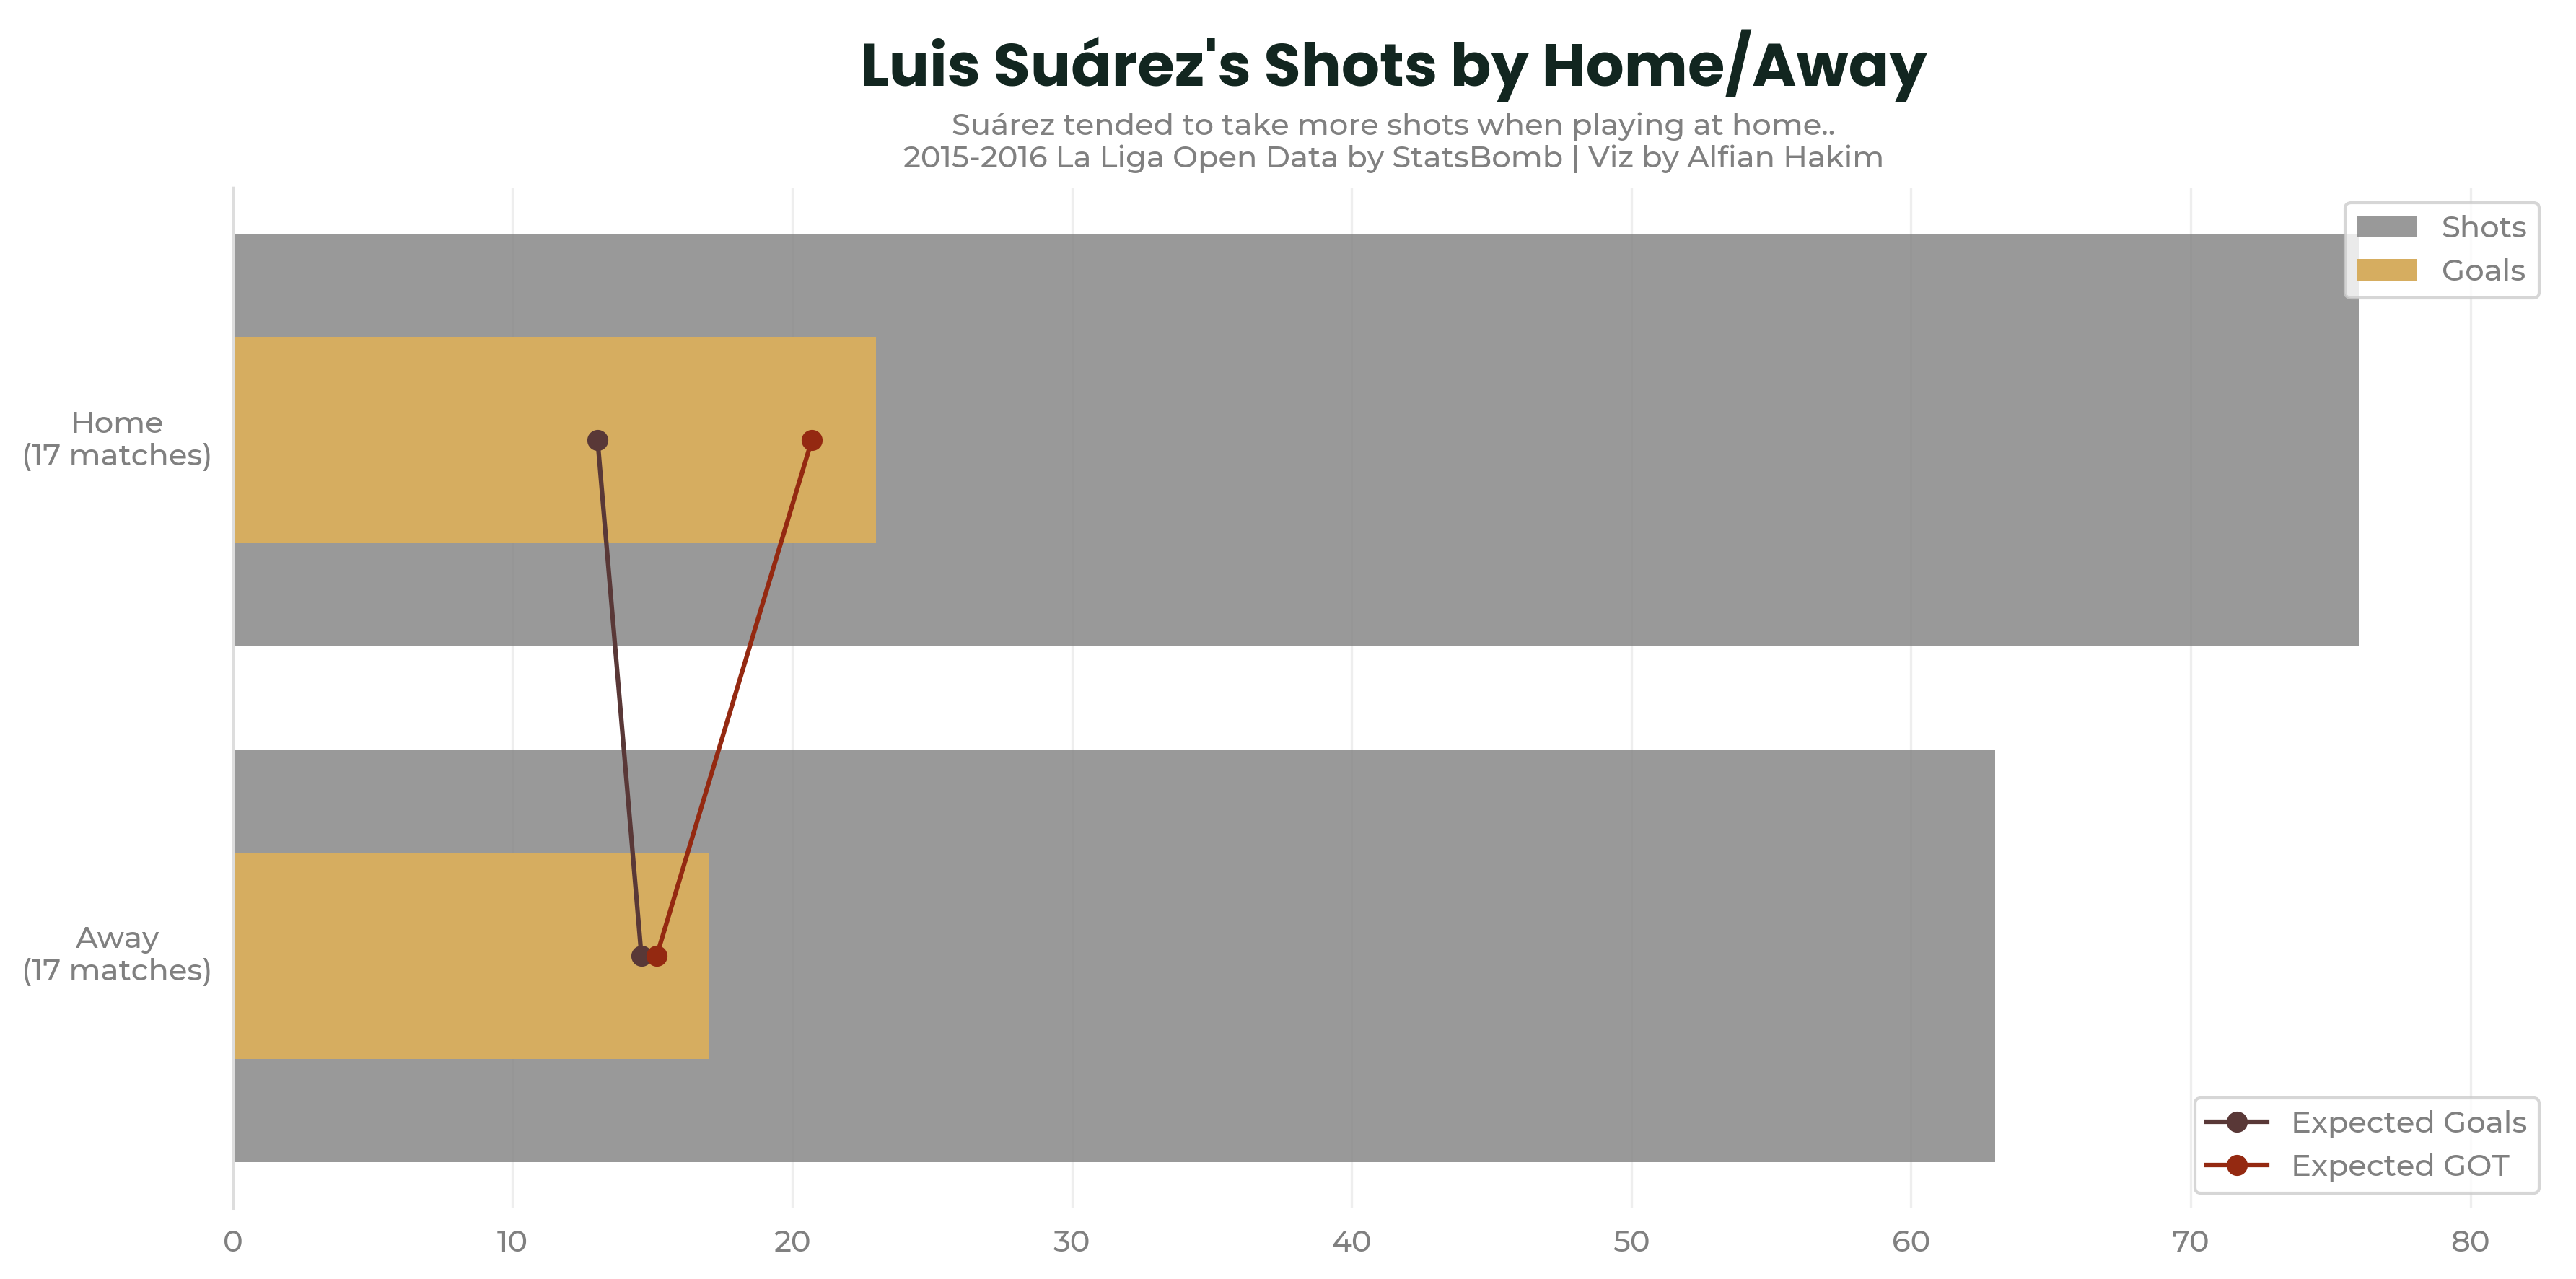

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.barh(df_bar_ha_2['home_away'], df_bar_ha_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.barh(df_bar_ha_2['home_away'], df_bar_ha_2['goals'], label='Goals', color='#D6AD60', align='center', height=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_yticklabels(df_bar_ha_2['home_away']+"\n("+df_bar_ha_2['matches'].astype(str)+" matches)", ha='center',va='center',color='gray', rotation=0)
# Adjust the y-axis limits and ticks to give more space on the left

# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Home/Away", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"Suárez tended to take more shots when playing at home..\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper right', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
x_min = 0
x_max = 83

ax1.set_xlim(x_min, x_max)

ax2 = ax1.twiny()
ax2.set_xlim(x_min, x_max)

# Create the line chart for the xG column
ax2.plot(df_bar_ha_2['shot_statsbomb_xg'], df_bar_ha_2['home_away'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_ha_2['xgot'], df_bar_ha_2['home_away'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='lower right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', pad=35)
ax1.set_axisbelow(True)
ax1.xaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.xaxis.set_visible(False)

plt.gca().invert_yaxis()


# Display the plot
plt.tight_layout()
plt.show()


### Body Parts

In [ ]:
df_bar_bp = df_shot.groupby('body_part_name',as_index=False)['period','shot_statsbomb_xg', 'xgot'].agg({'period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',
                                                                                                                                                                                                   'match_id':'matches'},axis=1)
df_bar_bp_2 = df_shot.loc[goal_mask].groupby('body_part_name',as_index=False)['period'].count().rename({'period':'goals'},axis=1)
df_bar_bp_2 = pd.merge(df_bar_bp,df_bar_bp_2, how='left').fillna(0)
df_bar_bp_2['goals'] = df_bar_bp_2['goals'].astype(int)
df_bar_bp_2 = df_bar_bp_2.sort_values('body_part_name', ascending=False).reset_index(drop=True)
df_bar_bp_2

<ipython-input-115-1faba4a01e49>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar_bp = df_shot.groupby('body_part_name',as_index=False)['period','shot_statsbomb_xg', 'xgot'].agg({'period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',


body_part_name  shots  shot_statsbomb_xg       xgot  goals
0     Right Foot     89          19.970722  27.867090     30
1      Left Foot     38           5.465434   5.329726      5
2           Head     12           2.212500   2.655921      5

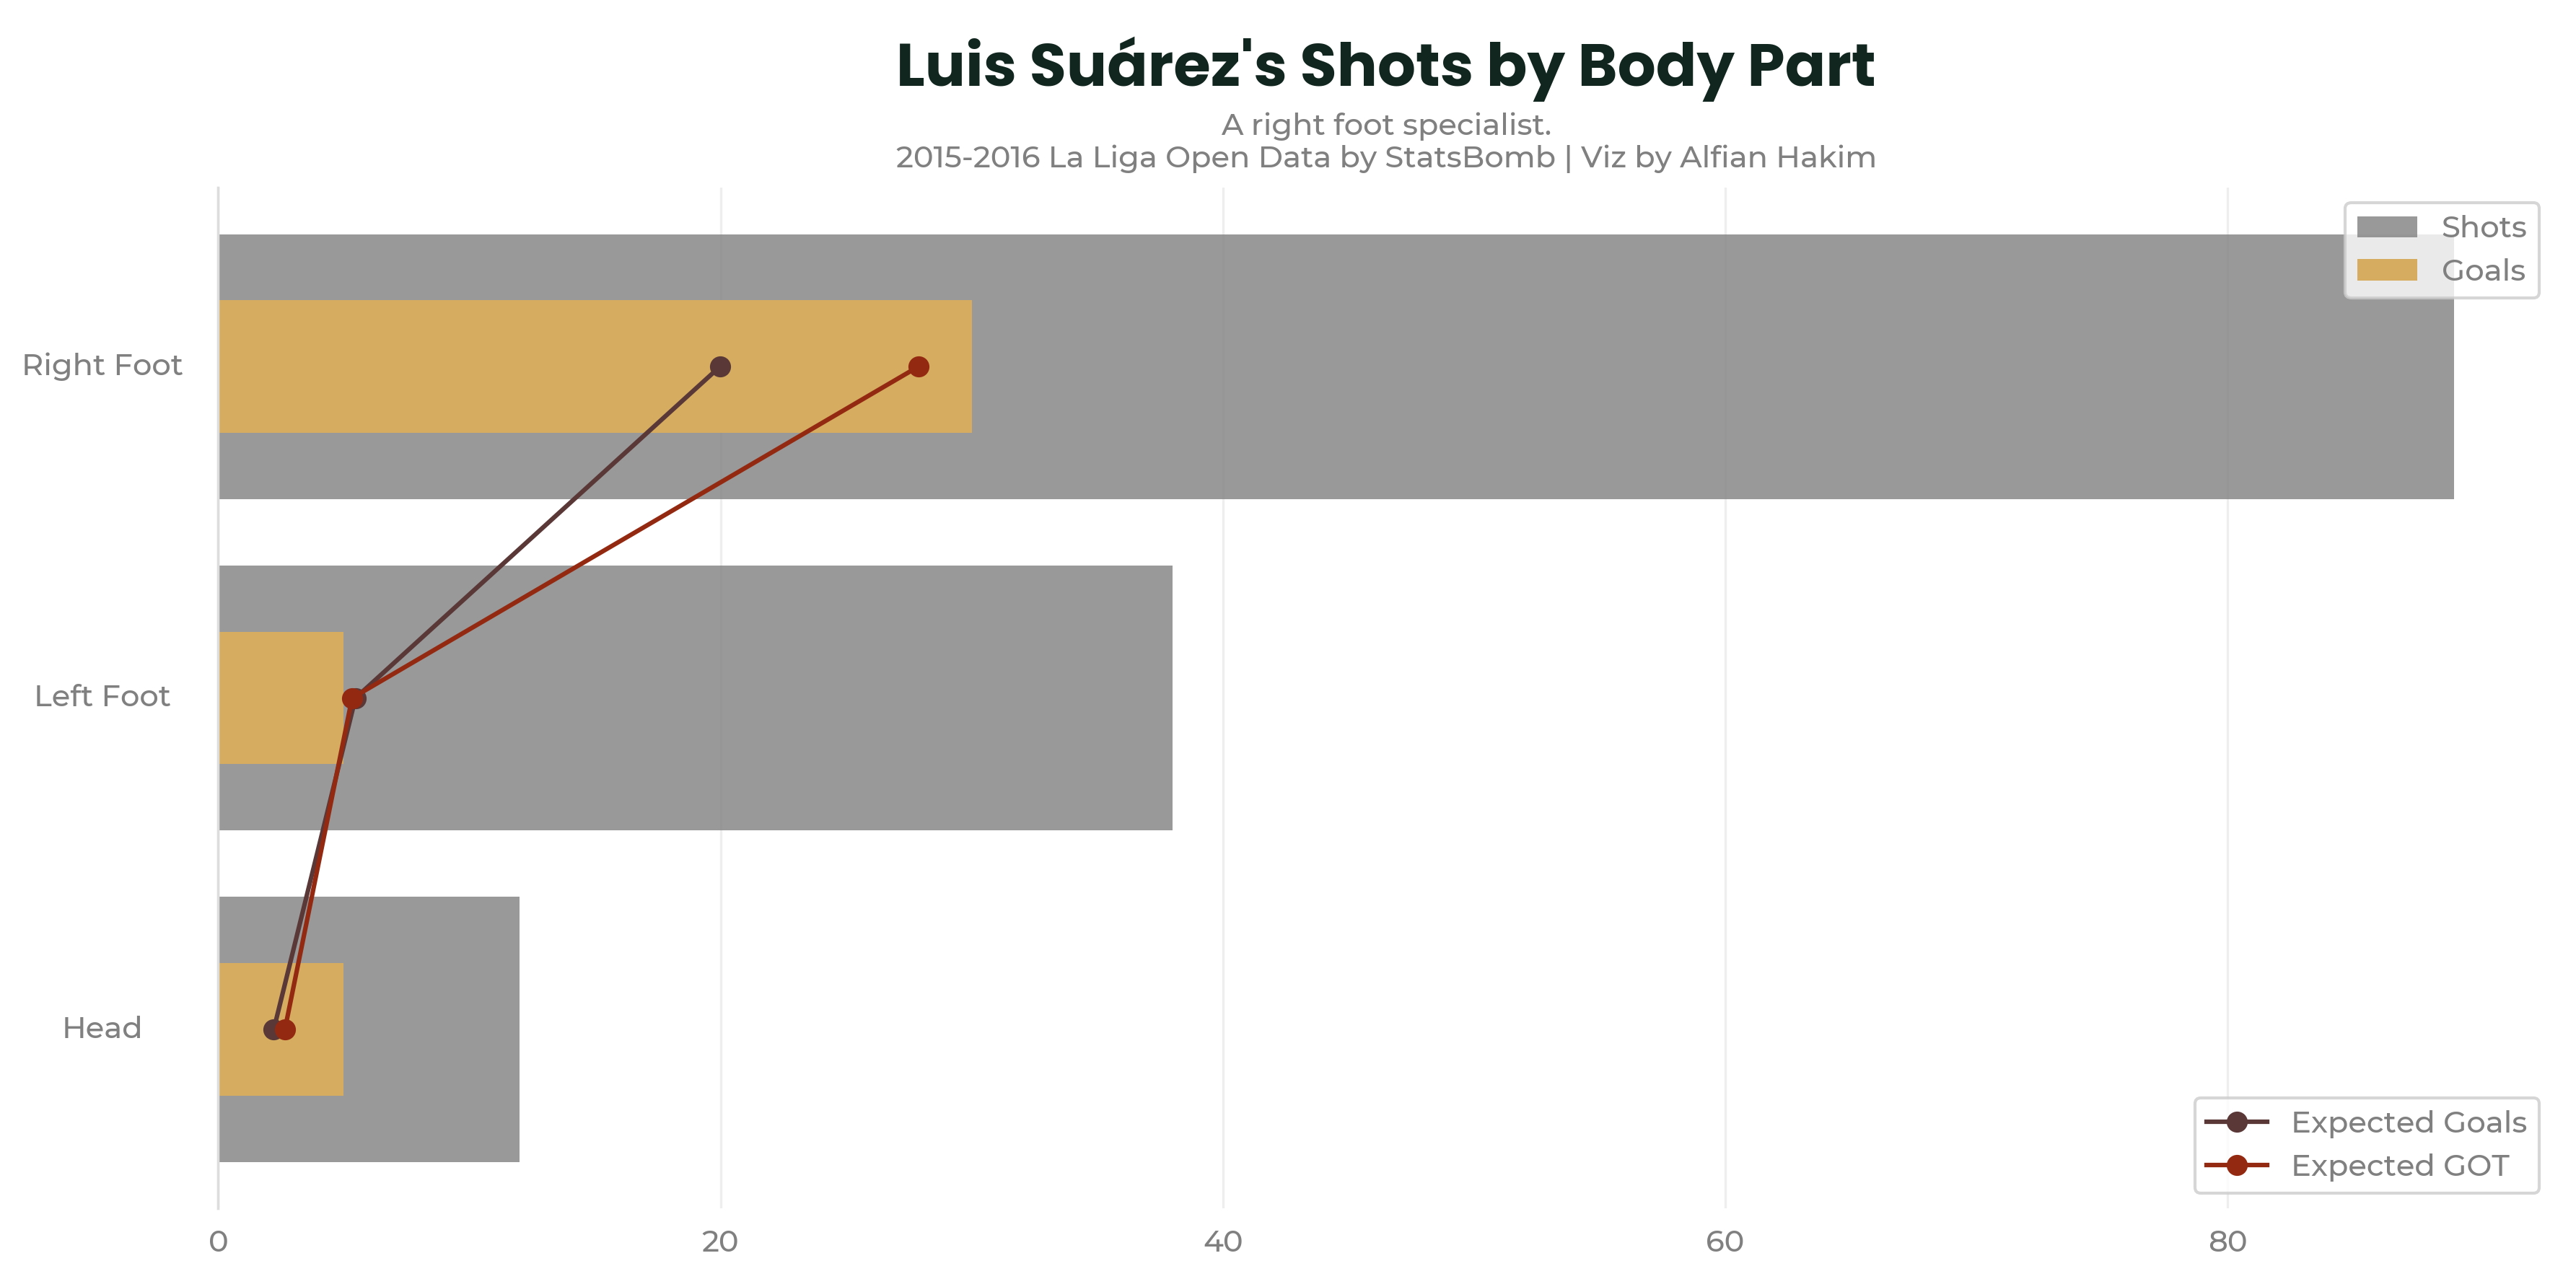

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.barh(df_bar_bp_2['body_part_name'], df_bar_bp_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.barh(df_bar_bp_2['body_part_name'], df_bar_bp_2['goals'], label='Goals', color='#D6AD60', align='center', height=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_yticklabels(df_bar_bp_2['body_part_name'], ha='center',va='center',color='gray', rotation=0)
# Adjust the y-axis limits and ticks to give more space on the left

# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Body Part", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"A right foot specialist.\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper right', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
x_min = 0
x_max = 93

ax1.set_xlim(x_min, x_max)

ax2 = ax1.twiny()
ax2.set_xlim(x_min, x_max)

# Create the line chart for the xG column
ax2.plot(df_bar_bp_2['shot_statsbomb_xg'], df_bar_bp_2['body_part_name'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_bp_2['xgot'], df_bar_bp_2['body_part_name'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='lower right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', pad=35)
ax1.set_axisbelow(True)
ax1.xaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.xaxis.set_visible(False)

plt.gca().invert_yaxis()


# Display the plot
plt.tight_layout()
plt.show()


### Opponents

In [ ]:
df_bar_op = df_shot.groupby('opponent',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',
                                                                                                                                                                                                   'match_id':'matches'},axis=1)
df_bar_op_2 = df_shot.loc[goal_mask].groupby('opponent',as_index=False)['period'].count().rename({'period':'goals'},axis=1)
df_bar_op_2 = pd.merge(df_bar_op,df_bar_op_2, how='left').fillna(0)
df_bar_op_2['goals'] = df_bar_op_2['goals'].astype(int)
df_bar_op_2 = df_bar_op_2.sort_values(['goals','shots', 'shot_statsbomb_xg'], ascending=False).reset_index(drop=True)

df_bar_op_2

<ipython-input-117-25b9d2fc86a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar_op = df_shot.groupby('opponent',as_index=False)['period','match_id','shot_statsbomb_xg', 'xgot'].agg({'match_id':'nunique','period':'count','shot_statsbomb_xg':'sum','xgot':'sum'}).rename({'period':'shots',


opponent  matches  shots  shot_statsbomb_xg      xgot  goals
0           Sporting Gijón        2     10           3.875749  3.221830      5
1   RC Deportivo La Coruña        2     13           3.039983  3.061015      4
2                    Eibar        2     10           1.505473  3.248031      4
3            Athletic Club        2     10           1.493724  2.546822      4
4               Las Palmas        2      9           1.712873  2.298375      3
5               Real Betis        2      8           1.847814  2.505990      3
6                  Granada        2      7           2.271052  1.655370      3
7               Celta Vigo        1      5           1.708622  3.035324      3
8              Real Madrid        2      7           1.314013  1.737104      2
9                 Espanyol        2      4           0.864093  1.669276      2
10          Rayo Vallecano        2     10           2.162381  2.489338      1
11              Villarreal        2      9           1.191016  1.229034      1
12                Valencia        2      7           0.711992  0.725785      1
13         Atlético Madrid        2      6           0.801368  1.288871      1
14                  Getafe        1      4           0.739712  0.806381      1
15              Levante UD        1      2           0.680531  0.465139      1
16           Real Sociedad        1      2           0.242387  0.713002      1
17                 Sevilla        2     10           1.007168  2.159408      0
18                  Málaga        2      6           0.478706  0.996643      0

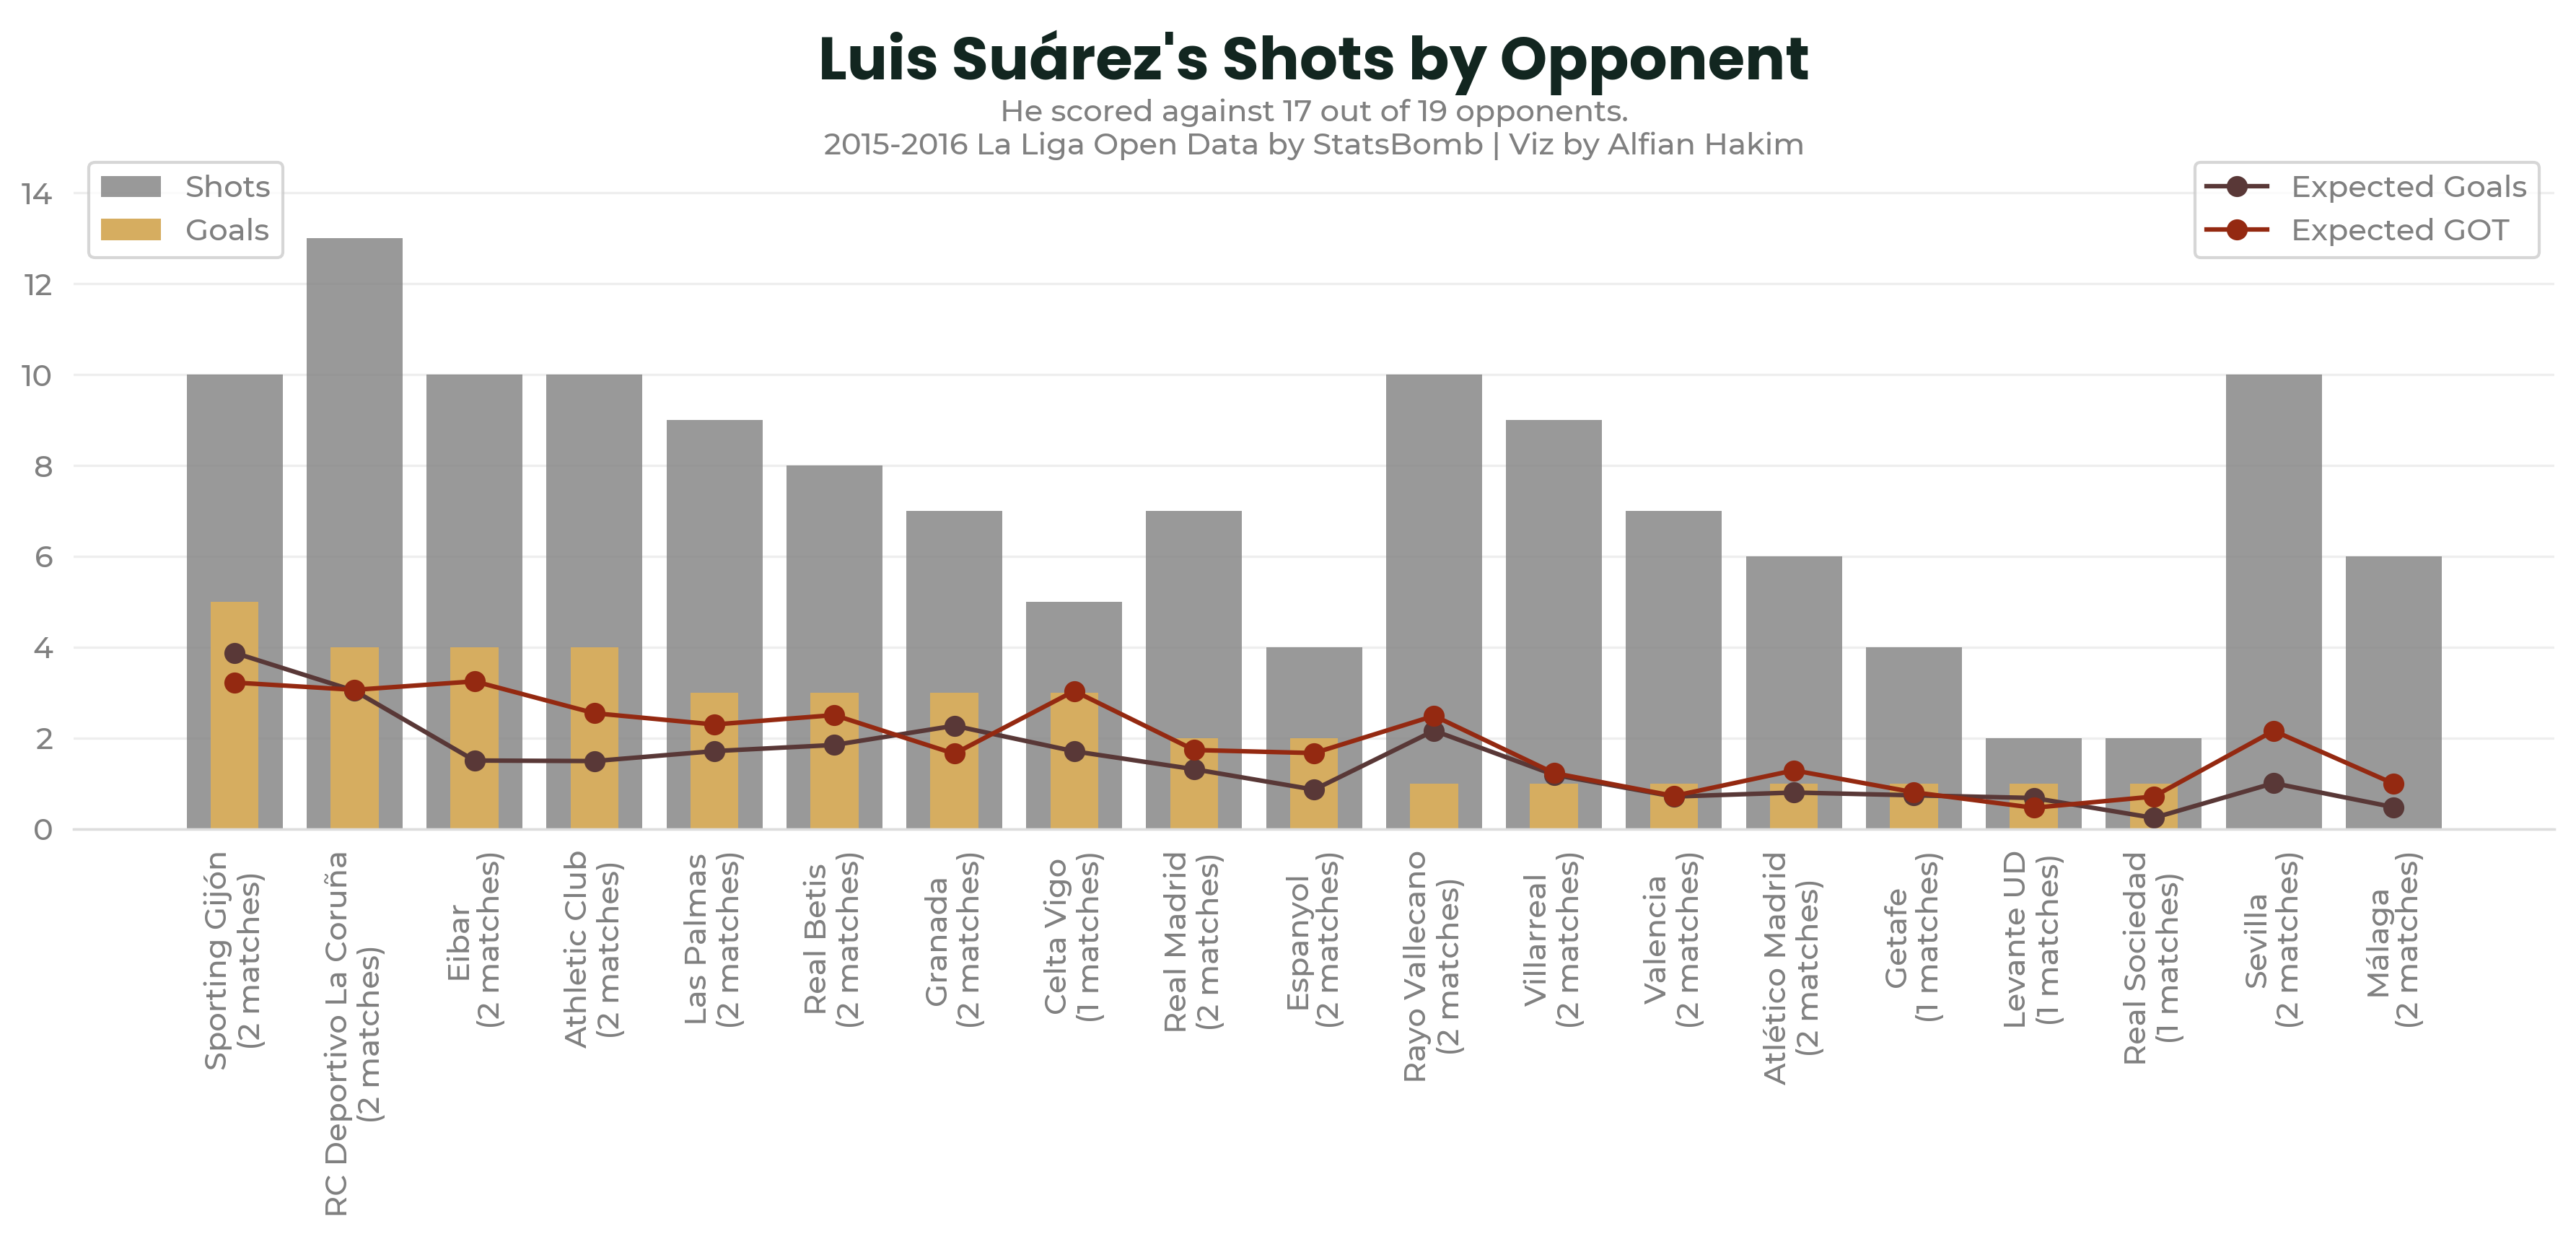

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_op_2['opponent'], df_bar_op_2['shots'], label='Shots', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_op_2['opponent'], df_bar_op_2['goals'], label='Goals', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_op_2['opponent']+"\n("+df_bar_op_2['matches'].astype(str)+" matches)", ha='center',va='top',color='gray', rotation=90)
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Shots by Opponent", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,0.99,"He scored against 17 out of 19 opponents.\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper left', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 15

ax1.set_ylim(y_min, y_max)

ax2 = ax1.twinx()
ax2.set_ylim(y_min, y_max)

# Create the line chart for the xG column
ax2.plot(df_bar_op_2['opponent'], df_bar_op_2['shot_statsbomb_xg'], marker='o', linestyle='-', color='#593837', label='Expected Goals')
ax2.plot(df_bar_op_2['opponent'], df_bar_op_2['xgot'], marker='o', linestyle='-', color='#942911', label='Expected GOT')

# Set labels and title for the line chart
ax2.legend(loc='upper right', labelcolor='grey')


# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax2.tick_params(bottom=False, left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)


# Display the plot
plt.tight_layout()
plt.show()


### Top assister of Suarez

In [ ]:
# special case, because Messi's penalty against Celta Vigo is not considered a key pass by StatsBomb
df_shot.loc[df_shot['opponent']=='Celta Vigo']

id period minute match_id      x     y  \
131  540b6db8-f3f5-42c2-8448-6cf94fe9efc9      1     40   266254  113.4  28.2   
132  dbc4448c-bd3f-4c12-865e-6c32c096972c      2     46   266254  113.2  32.7   
133  1ddc01c3-d7a9-4bde-a3c4-d4dbe1f6e6c9      2     58   266254  111.0  47.0   
134  a3afe8cc-4926-41a8-91a9-df64239dd5fb      2     74   266254  120.0  43.7   
135  9de370d6-47c6-4ed8-8bfe-10d2ea3a38d2      2     81   266254  112.3  44.5   

     end_y  end_z play_pattern_name sub_type_name  under_pressure  \
131   56.8    0.2     From Kick Off     Open Play             NaN   
132   43.9    1.8     From Throw In     Open Play             NaN   
133   37.1    1.8      Regular Play     Open Play             NaN   
134   43.3    0.6    From Free Kick     Open Play             NaN   
135   43.3    0.4             Other     Open Play             NaN   

    body_part_name technique_name shot_first_time  \
131      Left Foot    Half Volley            True   
132     Right Foot         Normal            True   
133     Right Foot    Half Volley            True   
134     Right Foot         Normal            True   
135     Right Foot         Normal             NaN   

                         shot_key_pass_id outcome_name  shot_statsbomb_xg  \
131                                   NaN        Off T           0.079786   
132  df330d70-f55b-4355-8f9b-f3413703216f         Post           0.142429   
133  ac1246e6-7d3c-4a87-a7d2-0b4ff5071f9f         Goal           0.256660   
134                                   NaN         Goal           0.913527   
135                                   NaN         Goal           0.316220   

       opponent home_away match_date  match_week          zone      xgot  
131  Celta Vigo      home 2016-02-14          24           NaN       NaN  
132  Celta Vigo      home 2016-02-14          24     top right  0.851695  
133  Celta Vigo      home 2016-02-14          24      top left  0.614872  
134  Celta Vigo      home 2016-02-14          24  bottom right  0.769075  
135  Celta Vigo      home 2016-02-14          24  bottom right  0.799682

In [ ]:
df_matches[266254]['event'].loc[df_matches[266254]['event']['minute']==80]

id  index  period        timestamp  \
3201  a623a086-f98c-4403-b849-6a878ff47496   3202       2  00:35:58.792000   
3202  b927bf08-6775-4157-b71e-a7fa6a4253c5   3203       2  00:35:58.831000   

      minute  second  possession  duration  match_id  type_id    type_name  \
3201      80      58         152  0.038319    266254       16         Shot   
3202      80      58         152  0.000000    266254       23  Goal Keeper   

      possession_team_id possession_team_name  play_pattern_id  \
3201                 217            Barcelona                5   
3202                 217            Barcelona                5   

     play_pattern_name  team_id   team_name tactics_formation  player_id  \
3201             Other      217   Barcelona              None     5503.0   
3202             Other      209  Celta Vigo              None     6884.0   

                         player_name  position_id position_name  \
3201  Lionel Andrés Messi Cuccittini         17.0    Right Wing   
3202            Sergio Álvarez Conde          1.0    Goalkeeper   

      pass_recipient_id pass_recipient_name  pass_length  pass_angle  \
3201                NaN                 NaN          NaN         NaN   
3202                NaN                 NaN          NaN         NaN   

      pass_height_id pass_height_name  end_x  end_y  body_part_id  \
3201             NaN              NaN  111.4   43.2          38.0   
3202             NaN              NaN    NaN    NaN           NaN   

     body_part_name  sub_type_id sub_type_name      x     y pass_switch  \
3201      Left Foot         88.0       Penalty  108.1  40.1         NaN   
3202            NaN         32.0    Shot Faced    1.0  40.0         NaN   

      outcome_id outcome_name  under_pressure aerial_won  counterpress  \
3201       101.0      Wayward             NaN        NaN           NaN   
3202         NaN          NaN             NaN        NaN           NaN   

      technique_id technique_name pass_no_touch foul_committed_advantage  \
3201          93.0         Normal           NaN                      NaN   
3202           NaN            NaN           NaN                      NaN   

     foul_won_advantage  out pass_assisted_shot_id pass_shot_assist  \
3201                NaN  NaN                   NaN              NaN   
3202                NaN  NaN                   NaN              NaN   

      shot_statsbomb_xg  end_z shot_key_pass_id shot_first_time  \
3201             0.7835    NaN              NaN             NaN   
3202                NaN    NaN              NaN             NaN   

      goalkeeper_position_id goalkeeper_position_name pass_cross  \
3201                     NaN                      NaN        NaN   
3202                    44.0                      Set        NaN   

     pass_miscommunication  off_camera  foul_committed_card_id  \
3201                   NaN         NaN                     NaN   
3202                   NaN         NaN                     NaN   

     foul_committed_card_name ball_recovery_recovery_failure  \
3201                      NaN                            NaN   
3202                      NaN                            NaN   

     foul_won_defensive dribble_nutmeg dribble_overrun pass_cut_back  \
3201                NaN            NaN             NaN           NaN   
3202                NaN            NaN             NaN           NaN   

     foul_committed_penalty foul_won_penalty pass_deflected block_deflection  \
3201                    NaN              NaN            NaN              NaN   
3202                    NaN              NaN            NaN              NaN   

     ball_recovery_offensive pass_goal_assist  substitution_replacement_id  \
3201                     NaN              NaN                          NaN   
3202                     NaN              NaN                          NaN   

     substitution_replacement_name shot_one_on_one block_save_block  \
3201                           NaN            True          

In [ ]:
# special case, because Messi's penalty against Celta Vigo is not considered a key pass by StatsBomb
df_shot.loc[df_shot['id']=='9de370d6-47c6-4ed8-8bfe-10d2ea3a38d2', 'shot_key_pass_id'] = 'a623a086-f98c-4403-b849-6a878ff47496'

In [ ]:
assist_cols = ['id', 'player_name', 'pass_height_name', 'technique_name', 'x', 'y', 'end_x', 'end_y']
df_assist = pd.DataFrame()

for id in df_match_barca['match_id']:
  df_temp = pd.merge(df_shot, df_matches[id]['event'][assist_cols].rename({'technique_name':'pass_technique',
                                                                           'x':'pass_x','y':'pass_y',
                                                                           'end_x':'pass_end_x','end_y':'pass_end_y'},axis=1), left_on='shot_key_pass_id', right_on='id')
  df_assist = pd.concat([df_assist,df_temp])

In [ ]:
df_assist.head()

id_x period minute match_id      x     y  \
0  4ade6c91-08c8-41f9-bdaf-e6dc5287a2a8      1      6  3825660   99.6  53.3   
1  61e1070a-d214-4411-83c7-d50275d14d5a      1      7  3825660  104.1  30.9   
2  12087055-22d0-4f2e-9286-a16eb934fda4      1     30  3825660  107.9  54.8   
3  2ccf0a9e-25e2-46f1-a726-d948f93695a8      2     53  3825660  110.2  34.3   
4  d15e5e28-ab98-4ea8-86ec-066ae2b2b686      2     77  3825660  103.8  50.3   

   end_y  end_z play_pattern_name sub_type_name  under_pressure  \
0   30.7    0.2    From Free Kick     Open Play             NaN   
1   61.8    NaN     From Throw In     Open Play             NaN   
2   53.2    NaN      Regular Play     Open Play             NaN   
3   31.8    3.8    From Free Kick     Open Play             NaN   
4   41.6    0.2       From Corner     Open Play             NaN   

  body_part_name technique_name shot_first_time  \
0     Right Foot    Half Volley            True   
1      Left Foot    Half Volley             NaN   
2     Right Foot    Half Volley            True   
3           Head         Normal             NaN   
4     Right Foot         Normal             NaN   

                       shot_key_pass_id outcome_name  shot_statsbomb_xg  \
0  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9        Off T           0.042416   
1  de6bd253-117d-44a5-9d54-66365447a881      Wayward           0.046983   
2  eecb1d60-6528-4947-bd10-b70ca99b0665      Blocked           0.029568   
3  dd1b2bcd-8c2e-46a6-87e4-06c82b6986a0        Off T           0.074190   
4  cf25f504-07e5-471d-b392-f9d42eaf7d68        Saved           0.058318   

     opponent home_away match_date  match_week          zone      xgot  \
0  Villarreal      home 2015-11-08          11           NaN       NaN   
1  Villarreal      home 2015-11-08          11           NaN       NaN   
2  Villarreal      home 2015-11-08          11           NaN       NaN   
3  Villarreal      home 2015-11-08          11           NaN       NaN   
4  Villarreal      home 2015-11-08          11  bottom right  0.437988   

                                   id_y                    player_name  \
0  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9       Munir El Haddadi Mohamed   
1  de6bd253-117d-44a5-9d54-66365447a881  Neymar da Silva Santos Junior   
2  eecb1d60-6528-4947-bd10-b70ca99b0665         Sergi Roberto Carnicer   
3  dd1b2bcd-8c2e-46a6-87e4-06c82b6986a0  Neymar da Silva Santos Junior   
4  cf25f504-07e5-471d-b392-f9d42eaf7d68          Daniel Alves da Silva   

  pass_height_name pass_technique  pass_x  pass_y  pass_end_x  pass_end_y  
0         Low Pass            NaN    98.9    60.0        98.7        51.2  
1      Ground Pass            NaN   105.5    21.8       104.4        34.1  
2         Low Pass            NaN    87.3    53.2       105.8        51.9  
3        High Pass            NaN    95.9    63.1       111.7        37.8  
4      Ground Pass            NaN   105.5    56.2       105.1        48.7

In [ ]:
df_bar_kp = df_assist.groupby('player_name',as_index=False)['period','match_id','shot_statsbomb_xg'].agg({'period':'count','shot_statsbomb_xg':'sum'}).rename({'period':'key_passes',},axis=1)
df_bar_kp_2 = df_assist.loc[df_assist['outcome_name']=='Goal'].groupby('player_name',as_index=False)['period'].count().rename({'period':'assists'},axis=1)
df_bar_kp_2 = pd.merge(df_bar_kp,df_bar_kp_2, how='left').fillna(0)
df_bar_kp_2['assists'] = df_bar_kp_2['assists'].astype(int)
df_bar_kp_2 = df_bar_kp_2.sort_values(['assists','key_passes', 'shot_statsbomb_xg'], ascending=False).reset_index(drop=True)

name_replace = {'Lionel Andrés Messi Cuccittini':'Lionel Messi','Neymar da Silva Santos Junior':'Neymar', 'Jordi Alba Ramos':'Jordi Alba', 'Sergi Roberto Carnicer':'Sergi Roberto',
                'Daniel Alves da Silva':'Daniel Alves','Sergio Busquets i Burgos':'Sergio Busquets', 'Andrés Iniesta Luján':'Andrés Iniesta', 'Sandro Ramírez Castillo':'Sandro Ramírez',
                'Aleix Vidal Parreu':'Aleix Vidal','Munir El Haddadi Mohamed':'Munir El Haddadi', 'Javier Alejandro Mascherano':'Javier Mascherano'}

def abbreviate(row):
  name = row['player_name']
  parts = name.split()
  if len(parts) > 1:
        # If there are more than one part (first name and last name), abbreviate the first name and take the last name
        abbreviated_name = parts[0][0] + '. ' + ' '.join(parts[1:])
        return abbreviated_name
  else:
        # If there's only one part (e.g., a single name), return it as is
        return name

for key in name_replace.keys():
  df_bar_kp_2['player_name'] = df_bar_kp_2['player_name'].str.replace(key,name_replace[key])
df_bar_kp_2['player_name'] = df_bar_kp_2.apply(lambda row: abbreviate(row),axis=1)

df_bar_kp_2[df_bar_kp_2.columns.difference(['shot_statsbomb_xg'])]

<ipython-input-159-2a193d361564>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar_kp = df_assist.groupby('player_name',as_index=False)['period','match_id','shot_statsbomb_xg'].agg({'period':'count','shot_statsbomb_xg':'sum'}).rename({'period':'key_passes',},axis=1)


assists  key_passes    player_name
0         9          34       L. Messi
1         7          26         Neymar
2         4           8        J. Alba
3         4           6     S. Roberto
4         3           7       D. Alves
5         3           4    S. Busquets
6         1           6     A. Iniesta
7         1           6     I. Rakitić
8         1           2     S. Ramírez
9         1           2       A. Turan
10        1           2       A. Vidal
11        0           3  M. El Haddadi
12        0           2  J. Mascherano

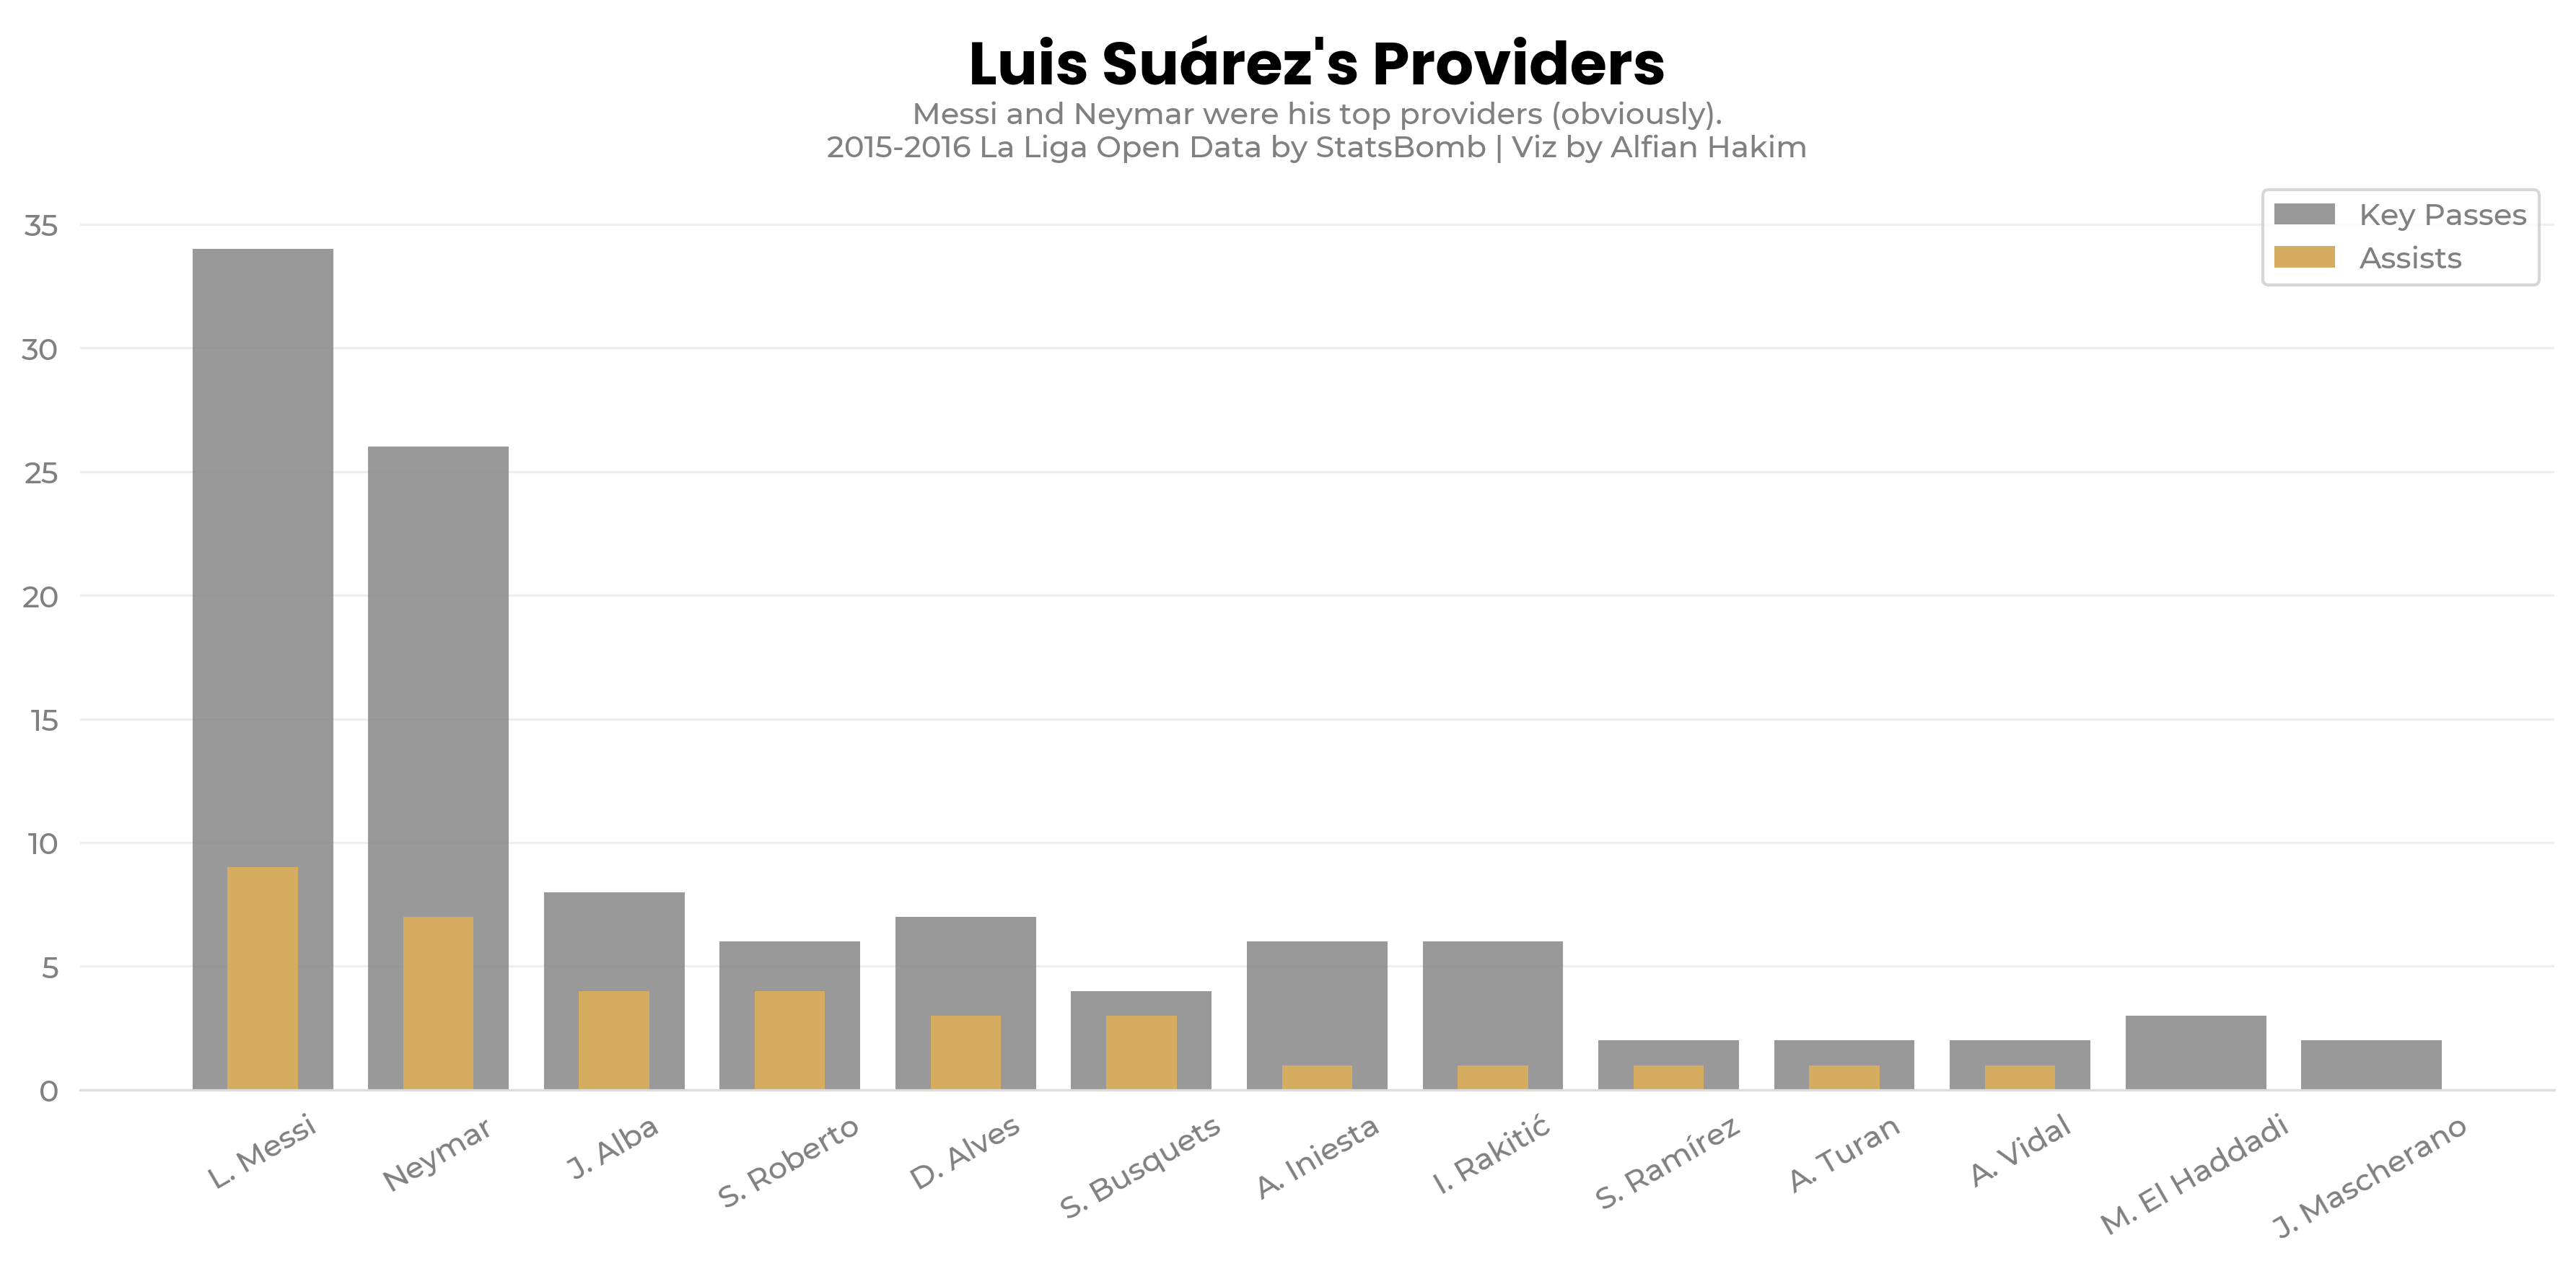

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['key_passes'], label='Key Passes', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['assists'], label='Assists', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_kp_2['player_name'], ha='center',va='top',color='gray', rotation=30)
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Luis Suárez's Providers", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"Messi and Neymar were his top providers (obviously).\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper right', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 37

ax1.set_ylim(y_min, y_max)



# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')


# Display the plot
plt.tight_layout()
plt.show()


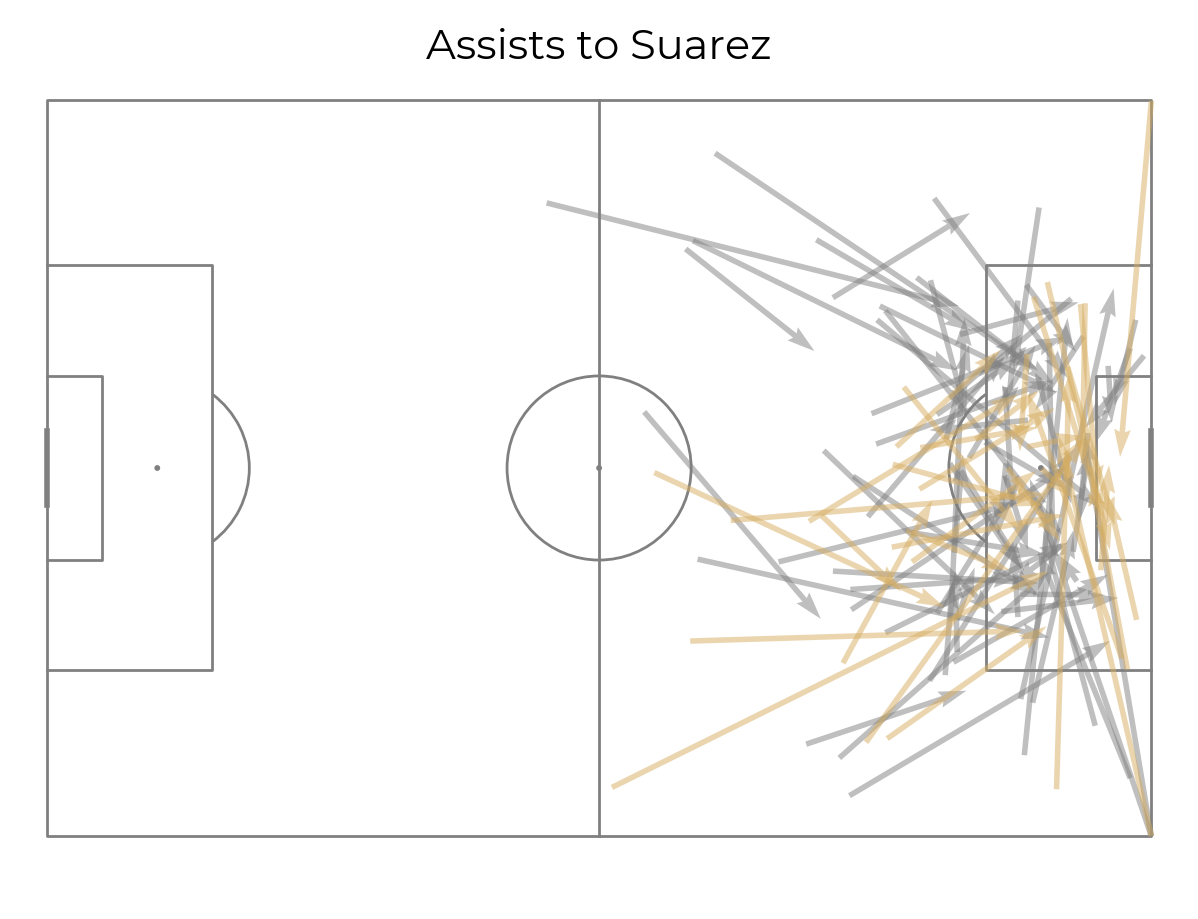

In [ ]:
df_key_pass = df_assist.loc[df_assist['outcome_name']!='Goal'][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_assisted = df_assist.loc[df_assist['outcome_name']=='Goal'][['pass_x','pass_y','pass_end_x','pass_end_y']]



pitch = Pitch(line_color='gray')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_key_pass.pass_x, df_key_pass.pass_y,
            df_key_pass.pass_end_x, df_key_pass.pass_end_y, color = "gray", ax=ax['pitch'], alpha=0.5)

pitch.arrows(df_assisted.pass_x, df_assisted.pass_y,
            df_assisted.pass_end_x, df_assisted.pass_end_y, color = "#D6AD60", ax=ax['pitch'], alpha=0.5)
# pitch.scatter(df_pass.pass_x, df_pass.pass_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Assists to Suarez", fontsize = 30)
plt.show()

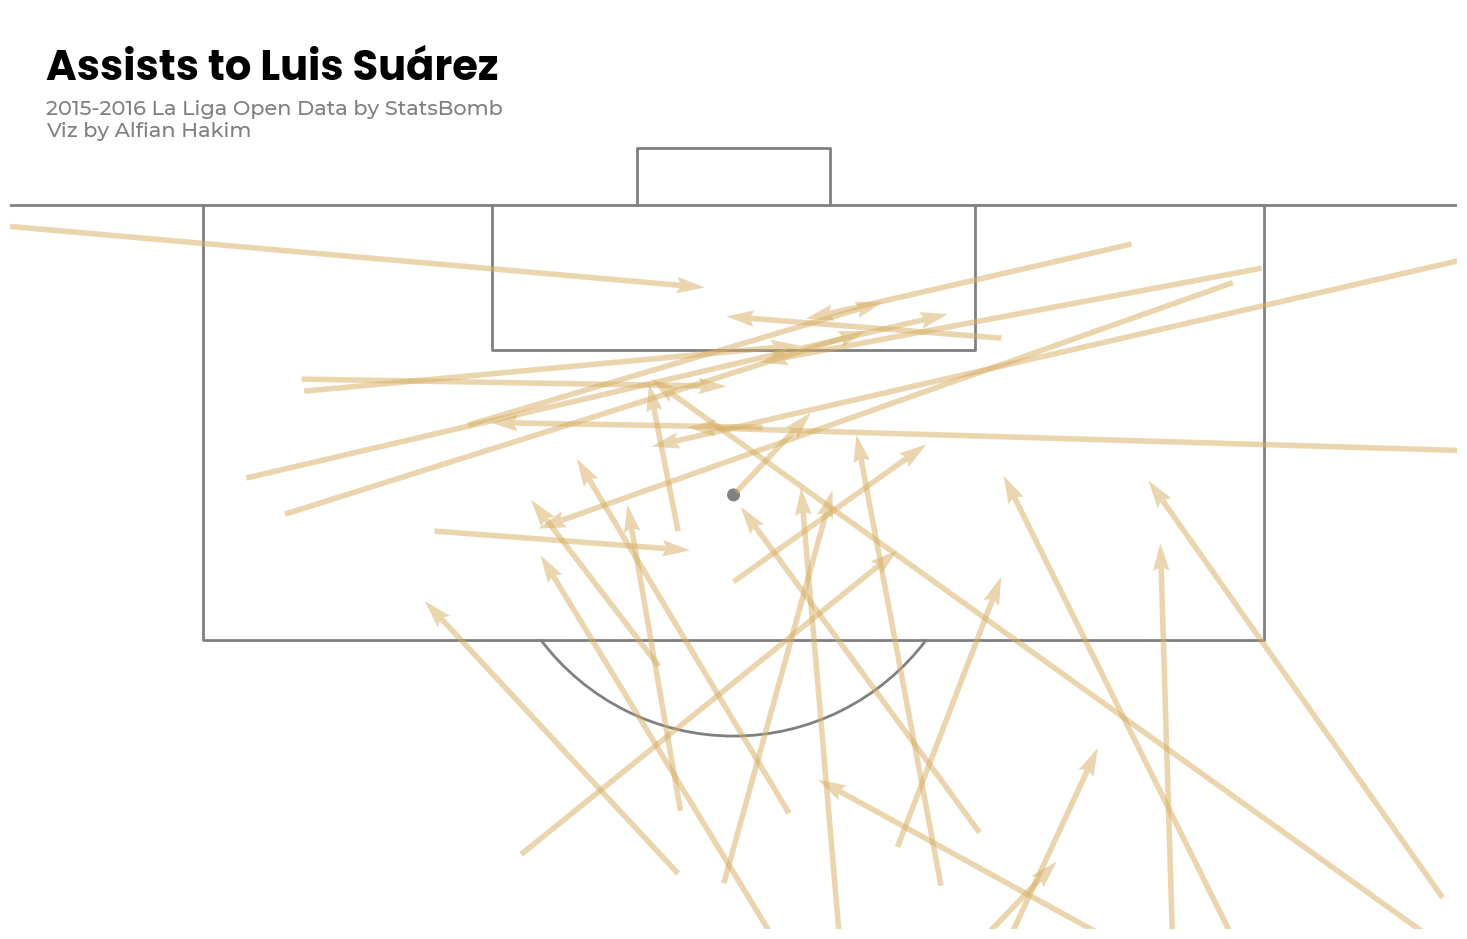

In [ ]:
pitch = VerticalPitch(pad_bottom=-30,  # reduce the area displayed at the bottom of the pitch
                      pad_left=-10,  # reduce the area displayed on the left of the pitch
                      pad_right=-10,  # reduce the area displayed on the right of the pitch
                      # pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_color='white', line_color='grey')  # control the goal transparency

fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

arr1 = pitch.arrows(df_assisted.pass_x, df_assisted.pass_y,
            df_assisted.pass_end_x, df_assisted.pass_end_y, color = "#D6AD60", ax=axs['pitch'], alpha=0.5, label='Assists')
# arr2 = pitch.arrows(df_key_pass.pass_x, df_key_pass.pass_y,
#             df_key_pass.pass_end_x, df_key_pass.pass_end_y, color = "gray", ax=axs['pitch'], alpha=0.5, label='Key Passes')

# title text
# title0 = axs['title'].text(0.5, 1, " ", weight='bold',
#                            va='center', ha='center', fontsize=30)
title1 = axs['title'].text(0.025, 0.4, "Assists to Luis Suárez", weight='bold', fontfamily='Poppins',
                           va='center', ha='left', fontsize=30)
title2 = axs['title'].text(0.025, 0.1, "2015-2016 La Liga Open Data by StatsBomb\nViz by Alfian Hakim", color=pitch.line_color,
                           va='top', ha='left', fontsize=15)

# text_shot_value = axs['title'].text(0.75, -0.15, "Shots", color=pitch.line_color,
#                            va='center', ha='center', fontsize=15)
# text_xg_value = axs['title'].text(0.85, -0.15, "xG", color='#593837',
#                            va='center', ha='center', fontsize=15)
# text_goal_value = axs['title'].text(0.94, -0.15, "Goals", color='#D6AD60',
#                            va='center', ha='center', fontsize=15)

# text_shot = axs['title'].text(0.75, 0.55, "{}".format(df_shot.shape[0]), color=pitch.line_color,
#                            va='top', ha='center',  fontfamily='Poppins', fontsize=40)
# text_xg = axs['title'].text(0.85, 0.55, "{:.1f}".format(df_shot['shot_statsbomb_xg'].sum()), color='#593837',
#                            va='top', ha='center',  fontfamily='Poppins', fontsize=40)
# text_goal = axs['title'].text(0.94, 0.55, "{}".format(df_shot[df_shot.outcome_name == 'Goal'].shape[0]),
#                               color='#D6AD60', weight='bold', fontfamily='Poppins',
#                            va='top', ha='center', fontsize=40)

plt.show()

### Messi & Neymar Assists to Suarez

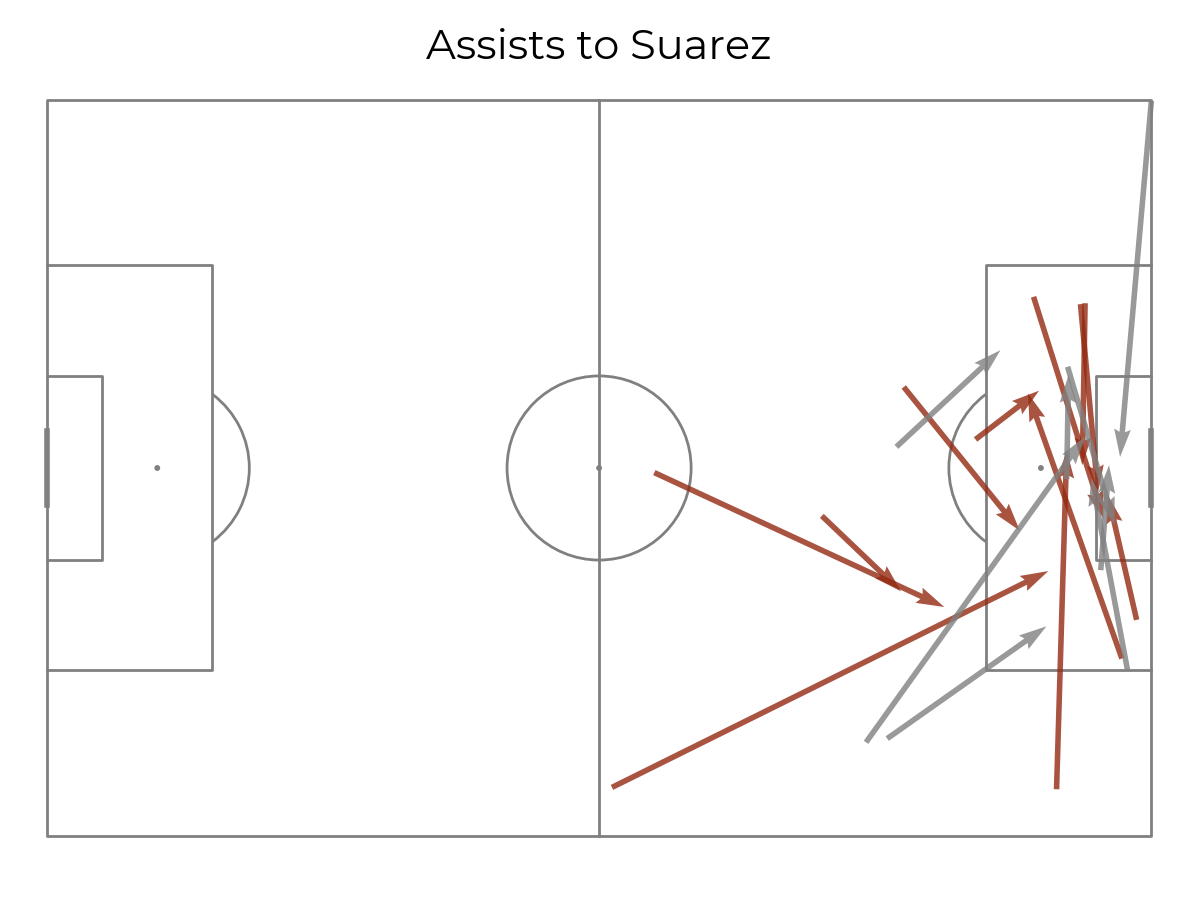

In [ ]:
df_messi = df_assist.loc[(df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Messi'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_neymar = df_assist.loc[(df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Neymar'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_fullbacks = df_assist.loc[(df_assist['outcome_name']=='Goal') & ((df_assist['player_name'].str.contains('Jordi Alba')) |
                                                                    (df_assist['player_name'].str.contains('Daniel')) |
                                                                    (df_assist['player_name'].str.contains('Roberto')))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_others = df_assist.loc[(df_assist['outcome_name']=='Goal') & ~((df_assist['player_name'].str.contains('Jordi Alba')) |
                                                                    (df_assist['player_name'].str.contains('Daniel')) |
                                                                    (df_assist['player_name'].str.contains('Roberto')) |
                                                                  (df_assist['player_name'].str.contains('Messi')) |
                                                                  (df_assist['player_name'].str.contains('Neymar')))][['pass_x','pass_y','pass_end_x','pass_end_y']]

pitch = Pitch(line_color='gray')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
# pitch.arrows(df_messi.pass_x, df_messi.pass_y,
#             df_messi.pass_end_x, df_messi.pass_end_y, color = "#D6AD60", ax=ax['pitch'], alpha=0.5)

# pitch.arrows(df_neymar.pass_x, df_neymar.pass_y,
#             df_neymar.pass_end_x, df_neymar.pass_end_y, color = '#593837', ax=ax['pitch'], alpha=0.5)

pitch.arrows(df_fullbacks.pass_x, df_fullbacks.pass_y,
            df_fullbacks.pass_end_x, df_fullbacks.pass_end_y, color = '#942911', ax=ax['pitch'], alpha=0.8)

pitch.arrows(df_others.pass_x, df_others.pass_y,
            df_others.pass_end_x, df_others.pass_end_y, color = 'gray', ax=ax['pitch'], alpha=0.8)
# pitch.scatter(df_pass.pass_x, df_pass.pass_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Assists to Suarez", fontsize = 30)
plt.show()

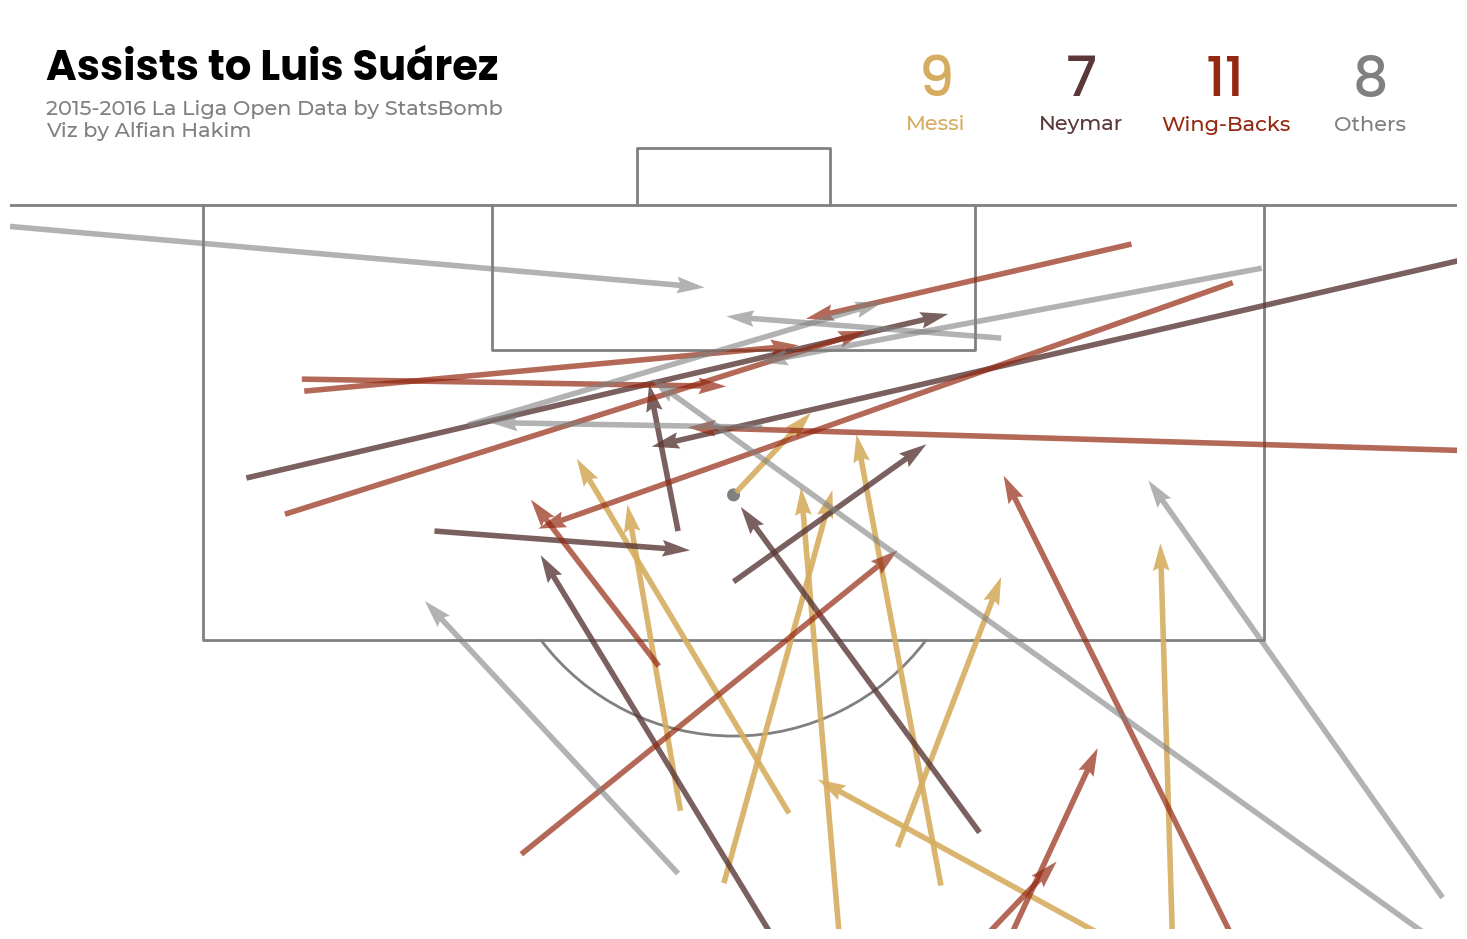

In [ ]:
pitch = VerticalPitch(pad_bottom=-30,  # reduce the area displayed at the bottom of the pitch
                      pad_left=-10,  # reduce the area displayed on the left of the pitch
                      pad_right=-10,  # reduce the area displayed on the right of the pitch
                      # pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_color='white', line_color='grey')  # control the goal transparency

fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

arr1 = pitch.arrows(df_messi.pass_x, df_messi.pass_y,
            df_messi.pass_end_x, df_messi.pass_end_y, color = "#D6AD60", ax=axs['pitch'], alpha=0.9)
arr2 = pitch.arrows(df_neymar.pass_x, df_neymar.pass_y,
            df_neymar.pass_end_x, df_neymar.pass_end_y, color = '#593837', ax=axs['pitch'], alpha=0.8)
arr3 = pitch.arrows(df_fullbacks.pass_x, df_fullbacks.pass_y,
            df_fullbacks.pass_end_x, df_fullbacks.pass_end_y, color = '#942911', ax=axs['pitch'], alpha=0.7)
arr4 = pitch.arrows(df_others.pass_x, df_others.pass_y,
            df_others.pass_end_x, df_others.pass_end_y, color = 'gray', ax=axs['pitch'], alpha=0.6)

# title text
# title0 = axs['title'].text(0.5, 1, " ", weight='bold',
#                            va='center', ha='center', fontsize=30)
title1 = axs['title'].text(0.025, 0.4, "Assists to Luis Suárez", weight='bold', fontfamily='Poppins',
                           va='center', ha='left', fontsize=30)
title2 = axs['title'].text(0.025, 0.1, "2015-2016 La Liga Open Data by StatsBomb\nViz by Alfian Hakim", color=pitch.line_color,
                           va='top', ha='left', fontsize=15)

text_messi = axs['title'].text(0.64, -0.15, "Messi", color='#D6AD60',
                           va='center', ha='center', fontsize=15)
text_neymar = axs['title'].text(0.74, -0.15, "Neymar", color='#593837',
                           va='center', ha='center', fontsize=15)
text_fullbacks = axs['title'].text(0.84, -0.06, "Wing-Backs", color='#942911',
                           va='top', ha='center', fontsize=15)
text_others = axs['title'].text(0.94, -0.06, "Others", color='gray',
                           va='top', ha='center', fontsize=15)

text_messi_value = axs['title'].text(0.64, 0.55, "{}".format(df_messi.shape[0]), color='#D6AD60',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text__neymar_value = axs['title'].text(0.74, 0.55, "{}".format(df_neymar.shape[0]), color='#593837',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text_fullbacks_value = axs['title'].text(0.84, 0.55, "{}".format(df_fullbacks.shape[0]),
                              color='#942911', fontfamily='Poppins',
                           va='top', ha='center', fontsize=40)
text_others_value = axs['title'].text(0.94, 0.55, "{}".format(df_others.shape[0]),
                              color='gray', fontfamily='Poppins',
                           va='top', ha='center', fontsize=40)

plt.show()

## Passes

### Collecting Luis Suarez's key passes

In [ ]:
# we'll take the location where the shots ended
shot_cols = ['period', 'minute', 'match_id', 'player_name', 'x','y', 'end_y', 'end_z', 'play_pattern_name', 'sub_type_name', 'under_pressure',
             'body_part_name', 'technique_name', 'shot_first_time', 'shot_key_pass_id','outcome_name', 'shot_statsbomb_xg']
df_shot = pd.DataFrame(columns=shot_cols)

for id in df_match_barca['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot')
  shots_temp = df_matches[id]['event'].loc[mask_shot, shot_cols]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [ ]:
assist_cols = ['id', 'player_name', 'pass_height_name', 'technique_name', 'x', 'y', 'end_x', 'end_y']
df_assist = pd.DataFrame()

for id in df_match_barca['match_id']:
  df_temp = pd.merge(df_shot, df_matches[id]['event'][assist_cols].rename({'player_name':'passer_name',
                                                                           'technique_name':'pass_technique',
                                                                           'x':'pass_x','y':'pass_y',
                                                                           'end_x':'pass_end_x','end_y':'pass_end_y'},axis=1), left_on='shot_key_pass_id', right_on='id')
  df_assist = pd.concat([df_assist,df_temp])

In [ ]:
df_assist.head()

period minute match_id                    player_name      x     y  end_y  \
0      1      6  3825660       Luis Alberto Suárez Díaz   99.6  53.3   30.7   
1      1      7  3825660       Luis Alberto Suárez Díaz  104.1  30.9   61.8   
2      1     21  3825660                 Jérémy Mathieu  109.9  35.9   39.5   
3      1     23  3825660           Andrés Iniesta Luján  114.9  27.9   29.5   
4      1     24  3825660  Neymar da Silva Santos Junior  118.3  25.3   35.7   

   end_z play_pattern_name sub_type_name  under_pressure body_part_name  \
0    0.2    From Free Kick     Open Play             NaN     Right Foot   
1    NaN     From Throw In     Open Play             NaN      Left Foot   
2    2.1       From Corner     Open Play             1.0           Head   
3    NaN    From Free Kick     Open Play             NaN      Left Foot   
4    1.2       From Corner     Open Play             1.0      Left Foot   

  technique_name shot_first_time                      shot_key_pass_id  \
0    Half Volley            True  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9   
1    Half Volley             NaN  de6bd253-117d-44a5-9d54-66365447a881   
2         Normal             NaN  b4da8e78-db34-4f2e-a576-895e2911f6a6   
3         Normal             NaN  53478b3e-54b8-4a84-a536-55dc05a5824b   
4         Normal             NaN  5316debf-7762-4cca-9f98-5096c0d34376   

  outcome_name  shot_statsbomb_xg                                    id  \
0        Off T           0.042416  4e8aec82-ec7c-45e5-9eda-3fd6555bd5b9   
1      Wayward           0.046983  de6bd253-117d-44a5-9d54-66365447a881   
2        Saved           0.062639  b4da8e78-db34-4f2e-a576-895e2911f6a6   
3      Blocked           0.082039  53478b3e-54b8-4a84-a536-55dc05a5824b   
4        Saved           0.009679  5316debf-7762-4cca-9f98-5096c0d34376   

                     passer_name pass_height_name pass_technique  pass_x  \
0       Munir El Haddadi Mohamed         Low Pass            NaN    98.9   
1  Neymar da Silva Santos Junior      Ground Pass            NaN   105.5   
2           Andrés Iniesta Luján        High Pass            NaN    93.4   
3  Neymar da Silva Santos Junior      Ground Pass            NaN   111.2   
4           Andrés Iniesta Luján      Ground Pass            NaN   120.0   

   pass_y  pass_end_x  pass_end_y  
0    60.0        98.7        51.2  
1    21.8       104.4        34.1  
2    57.8       109.1        37.1  
3    26.4       109.8        30.6  
4     0.1       111.5         9.0

In [ ]:
df_assist.loc[(df_assist['passer_name'].str.contains('Suárez')) & (df_assist['outcome_name']=='Goal')].shape

(15, 25)

In [ ]:
df_assist['opponent'] = df_assist.apply(lambda x:find_opponent(x), axis=1)
df_assist['home_away'] = df_assist.apply(lambda x:find_home_away(x), axis=1)

df_assist = pd.merge(df_assist,df_match_barca[['match_id', 'match_date','match_week']])

In [ ]:
df_assist.loc[(df_assist['passer_name'].str.contains('Suárez')) & (df_assist['outcome_name']=='Goal')].sort_values('match_week')

period minute match_id                     player_name      x     y  \
517      2     76   266166  Lionel Andrés Messi Cuccittini  110.8  32.5   
65       2     69  3825627   Neymar da Silva Santos Junior  115.3  36.1   
17       2     84  3825660   Neymar da Silva Santos Junior  106.7  37.1   
373      1     24   266815  Lionel Andrés Messi Cuccittini   93.9  43.6   
376      1     30   266815  Lionel Andrés Messi Cuccittini  110.9  48.8   
459      1     13   266620  Lionel Andrés Messi Cuccittini  118.0  32.9   
471      2     82   266620   Neymar da Silva Santos Junior  116.9  35.2   
446      1     30   266149   Neymar da Silva Santos Junior  106.8  29.8   
673      2     83   266254                    Ivan Rakitić  105.8  39.0   
674      2     90   266254   Neymar da Silva Santos Junior  113.2  30.3   
549      2     47   265839           Gerard Piqué Bernabéu  116.4  43.2   
165      2     46   266310                    Ivan Rakitić  111.6  45.0   
173      2     72   266310  Lionel Andrés Messi Cuccittini  106.5  41.4   
175      2     80   266310   Neymar da Silva Santos Junior  114.8  35.1   
256      2     82   265958   Neymar da Silva Santos Junior  114.2  35.3   

     end_y  end_z play_pattern_name sub_type_name  under_pressure  \
517   43.9    0.8     From Throw In     Open Play             NaN   
65    39.2    0.0      From Counter     Open Play             NaN   
17    42.5    0.2      Regular Play     Open Play             NaN   
373   36.4    0.2     From Throw In     Open Play             NaN   
376   42.9    2.4      Regular Play     Open Play             NaN   
459   42.5    0.2      Regular Play     Open Play             NaN   
471   37.4    2.4      Regular Play     Open Play             NaN   
446   40.9    0.2      From Counter     Open Play             1.0   
673   37.5    2.0      Regular Play     Open Play             NaN   
674   42.6    0.4      Regular Play     Open Play             NaN   
549   40.1    0.5       From Corner     Open Play             1.0   
165   42.8    1.3      Regular Play     Open Play             NaN   
173   37.3    0.5    From Free Kick     Open Play             NaN   
175   36.7    1.6    From Goal Kick     Open Play             NaN   
256   37.7    0.2     From Throw In     Open Play             1.0   

    body_part_name technique_name shot_first_time  \
517      Left Foot         Normal            True   
65       Left Foot         Normal            True   
17      Right Foot    Half Volley             NaN   
373      Left Foot         Normal             NaN   
376      Left Foot         Normal            True   
459      Left Foot         Normal            True   
471     Right Foot         Normal             NaN   
446      Left Foot            Lob             NaN   
673     Right Foot            Lob            True   
674      Left Foot         Normal             NaN   
549      Left Foot         Normal            True   
165     Right Foot         Volley            True   
173      Left Foot         Normal            True   
175      Left Foot         Normal             NaN   
256     Right Foot         Normal            True   

                         shot_key_pass_id outcome_name  shot_statsbomb_xg  \
517  412ea982-7edc-4b19-b406-963f152bb471         Goal           0.201862   
65   347c7e06-1c77-43c5-83ef-14e36a745c95         Goal           0.917783   
17   9c9c4f50-0b6d-4bf5-a001-32ba60447e18         Goal           0.097392   
373  31c9ba76-149c-40a9-a82d-e5d293aa4d5b         Goal           0.034015   
376  8c2e0f26-2b85-4199-a1d6-cd7064d87400         Goal           0.097211   
459  41275f9d-a0de-4ba1-9523-6761183104fe         Goal           0.348117   
471  ab9fc2c5-49bb-4caa-a39f-eefc3a290f6a         Goal           0.287809   
446  643c58cb-2643-4891-93ce-1b86aee82d94         Goal           0.146669   
673  070fa39a-b702-45b3-8599-d6d75c8ee9c3         Goal           0.318462   
674  44948e7a-4e75-4fd1-b49c-c81a3f2c3d8b         Goal           0.184366   
54

- he only provided 15 assists from passes, means the other 2 assists are from fouls won to penalties or shot leading to rebound goals

### Identifying the differences

In [ ]:
df_event = pd.DataFrame()
for id in df_match_barca['match_id']:
  df_event = pd.concat([df_event, df_matches[id]['event']]).reset_index(drop=True)

In [ ]:
df_event.sub_type_name.unique()

array([nan, 'Kick Off', 'Tackle', 'Recovery', 'Free Kick', 'Throw-in',
       'Goal Kick', 'Aerial Lost', 'Dangerous Play', 'Open Play',
       'Shot Faced', 'Corner', 'Interception', 'Save', 'Shot Saved',
       'Keeper Sweeper', 'Punch', 'Goal Conceded', 'Handball', 'Penalty',
       'Penalty Conceded', 'Collected', '6 Seconds', 'Penalty Saved',
       'Shot Saved to Post', 'Shot Saved Off Target', 'Smother', 'Dive'],
      dtype=object)

In [ ]:
df_event.loc[df_event['sub_type_name']=='Penalty']

id  index  period        timestamp  \
2633    5784f19d-1b79-47df-afd7-21b77226e67a   2634       2  00:24:42.401000   
11642   dcec0f46-2b2a-41df-a59e-4972ae39830d    946       1  00:21:38.584000   
12023   43e84a51-2886-4b36-9e04-ec43603b33df   1327       1  00:31:44.848000   
16942   7346757a-d8fc-41f3-88f5-ad48ef27e2e0   2487       2  00:28:24.255000   
18107   ba5bf2df-a64b-4a91-8c4b-c6154175b20c    440       1  00:10:20.904000   
39091   6d71526f-eca6-4cfd-a138-2528a22cf3d2   2484       2  00:23:10.389000   
42847   846a2b2d-0550-42ec-9eda-a10bdaaeb191   3019       2  00:28:38.581000   
42917   46ae35d4-c369-45c3-bc55-8c90ca122d10   3089       2  00:31:52.771000   
43240   6943634e-e4ee-4bf4-a9e9-19c17521a0ad   3412       2  00:40:06.145000   
52730   6f2bb685-bf90-4b83-af94-4d5e1e9a1069   2663       2  00:21:01.098000   
58301   c84e0b34-271a-4c32-bd3e-a735297dd7f4   1293       1  00:30:15.480000   
74771   7ab917c3-35df-4675-965a-6527b0450723   2432       2  00:16:29.800000   
84724   24d5dd73-5b13-488a-b274-ec1e0593c2ac   1708       1  00:40:42.681000   
90260   a03d512c-aa96-4b45-84d6-cfbab64fae20    158       1  00:06:24.480000   
100889  36874b07-67b8-4503-ac3a-e997d2063436   3310       2  00:30:18.053000   
102539  03268226-a8e0-4872-94a7-641886e5e9fb   1037       1  00:28:58.583000   
130259  8aef0d3b-1739-4035-83a1-dfa73570b967   2569       2  00:15:29.307000   
130799  a8f1c2d5-aa75-4e3a-b92e-be4db8acf4bd   3109       2  00:30:00.623000   
132969  585285ab-0b11-4b65-837e-f9dcfe9b0106   1519       1  00:38:53.358000   
134652  a623a086-f98c-4403-b849-6a878ff47496   3202       2  00:35:58.792000   

        minute  second  possession  duration  match_id  type_id type_name  \
2633        69      42         152  0.977588   3825660       16      Shot   
11642       21      38          50  0.498177   3825627       16      Shot   
12023       31      44          72  0.551866   3825627       16      Shot   
16942       73      24         180  0.537062   3825617       16      Shot   
18107       10      20          25  0.399200    266498       16      Shot   
39091       68      10         142  0.268900    266653       16      Shot   
42847       73      38         126  0.448400    265944       16      Shot   
42917       76      52         130  0.381900    265944       16      Shot   
43240       85       6         144  0.411000    265944       16      Shot   
52730       66       1         131  0.472800    267611       16      Shot   
58301       30      15          48  0.405800    266236       16      Shot   
74771       61      29         106  0.512300    266815       16      Shot   
84724       40      42          64  0.714200    266106       16      Shot   
90260        6      24           9  0.562008    266149       16      Shot   
100889      75      18         167  0.873800    266056       16      Shot   
102539      28      58          51  0.748600    267327       16      Shot   
130259      60      29         137  0.371300    266490       16      Shot   
130799      75       0         163  0.473400    266490       16      Shot   
132969      38      53          83  0.521900    266254       16      Shot   
134652      80      58         152  0.038319    266254       16      Shot   

        possession_team_id possession_team_name  play_pattern_id  \
2633                   217            Barcelona                5   
11642                  217            Barcelona                5   
12023                  217            Barcelona                5   
16942                  217            Barcelona                5   
18107                  217            Barcelona                5   
39091                  217            Barcelona                5   
42847                  217            Barcelona                5   
42917                  217            Barcelona                5   
43240                  217            Barcelona                5   
52730                  217            Barcelona                

In [ ]:
# filtering goals from barcelona
df_goals = df_event.loc[(df_event['outcome_name']=='Goal') & (df_event['team_name']=='Barcelona')]
df_goals.index

Int64Index([  2344,   2633,   3209,   4464,   5437,   6553,   8517,   9262,
             11642,  12023,
            ...
            130079, 130259, 131374, 132552, 133789, 134446, 134654, 134766,
            134938, 137604],
           dtype='int64', length=109)

In [ ]:
df_event.iloc[2344-3:2344][['type_name','player_name']]

type_name                    player_name
2341          Pass       Sergio Busquets i Burgos
2342  Ball Receipt  Neymar da Silva Santos Junior
2343         Carry  Neymar da Silva Santos Junior

In [ ]:
df_pre_goals = pd.DataFrame()
for goal_index in df_goals.index:
  df_temp = df_event.iloc[goal_index-3:goal_index+1][['type_name','sub_type_name', 'outcome_name','player_name', 'match_id', 'x', 'y']]
  df_pre_goals = pd.concat([df_pre_goals, df_temp]).reset_index(drop=True)

In [ ]:
df_pre_goals['opponent'] = df_pre_goals.apply(lambda x:find_opponent(x), axis=1)
df_pre_goals['home_away'] = df_pre_goals.apply(lambda x:find_home_away(x), axis=1)

df_pre_goals = pd.merge(df_pre_goals,df_match_barca[['match_id', 'match_date','match_week']])

In [ ]:
df_pre_goals.head(12)

type_name sub_type_name outcome_name                    player_name  \
0             Pass           NaN          NaN       Sergio Busquets i Burgos   
1     Ball Receipt           NaN          NaN  Neymar da Silva Santos Junior   
2            Carry           NaN          NaN  Neymar da Silva Santos Junior   
3             Shot     Open Play         Goal  Neymar da Silva Santos Junior   
4            Carry           NaN          NaN       Munir El Haddadi Mohamed   
5   Foul Committed           NaN          NaN       Jaume Vicent Costa Jordá   
6         Foul Won           NaN          NaN       Munir El Haddadi Mohamed   
7             Shot       Penalty         Goal       Luis Alberto Suárez Díaz   
8    Dribbled Past           NaN          NaN       Jaume Vicent Costa Jordá   
9          Dribble           NaN     Complete  Neymar da Silva Santos Junior   
10           Carry           NaN          NaN  Neymar da Silva Santos Junior   
11            Shot     Open Play         Goal  Neymar da Silva Santos Junior   

    match_id      x     y    opponent home_away match_date  match_week  
0    3825660   89.0  42.7  Villarreal      home 2015-11-08          11  
1    3825660  107.2  30.8  Villarreal      home 2015-11-08          11  
2    3825660  107.2  30.8  Villarreal      home 2015-11-08          11  
3    3825660  111.3  33.1  Villarreal      home 2015-11-08          11  
4    3825660  105.7  59.6  Villarreal      home 2015-11-08          11  
5    3825660   14.4  20.5  Villarreal      home 2015-11-08          11  
6    3825660  105.7  59.6  Villarreal      home 2015-11-08          11  
7    3825660  108.4  40.1  Villarreal      home 2015-11-08          11  
8    3825660   10.5  38.6  Villarreal      home 2015-11-08          11  
9    3825660  109.6  41.5  Villarreal      home 2015-11-08          11  
10   3825660  109.6  41.5  Villarreal      home 2015-11-08          11  
11   3825660  106.7  37.1  Villarreal      home 2015-11-08          11

In [ ]:
df_pre_goals.head(12).index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [ ]:
df_pre_goals['pre_fouls'] = False
df_pre_goals['pre_fouls_player'] = np.nan
for i, row in df_pre_goals.loc[df_pre_goals['outcome_name']=='Goal'].iterrows():
  pre_list = df_pre_goals.iloc[i-3:i]['type_name'].tolist()
  pre_ply_list = df_pre_goals.iloc[i-3:i]['player_name'].tolist()
  pre_x_list = df_pre_goals.iloc[i-3:i]['x'].tolist()
  pre_y_list = df_pre_goals.iloc[i-3:i]['y'].tolist()
  if 'Foul Won' in pre_list:
    df_pre_goals.loc[i,'pre_fouls'] = True
    df_pre_goals.loc[i,'pre_fouls_player'] = pre_ply_list[pre_list.index('Foul Won')]
    df_pre_goals.loc[i,'foul_x'] = pre_x_list[pre_list.index('Foul Won')]
    df_pre_goals.loc[i,'foul_y'] = pre_y_list[pre_list.index('Foul Won')]

In [ ]:
df_pre_goals.pre_fouls.value_counts()

False    422
True      14
Name: pre_fouls, dtype: int64

In [ ]:
df_pre_goals.pre_fouls_player.value_counts()

Neymar da Silva Santos Junior     7
Luis Alberto Suárez Díaz          4
Lionel Andrés Messi Cuccittini    2
Munir El Haddadi Mohamed          1
Name: pre_fouls_player, dtype: int64

In [ ]:
df_pre_goals.loc[(df_pre_goals['pre_fouls_player']=='Luis Alberto Suárez Díaz')]

type_name sub_type_name outcome_name                     player_name  \
223      Shot     Free Kick         Goal  Lionel Andrés Messi Cuccittini   
279      Shot       Penalty         Goal  Lionel Andrés Messi Cuccittini   
359      Shot     Free Kick         Goal  Lionel Andrés Messi Cuccittini   
411      Shot     Free Kick         Goal  Lionel Andrés Messi Cuccittini   

     match_id      x     y                opponent home_away match_date  \
223    266961   92.3  44.1  RC Deportivo La Coruña      home 2015-12-12   
279    266149  108.0  40.0           Athletic Club      home 2016-01-17   
359    265839   99.6  29.6                 Sevilla      home 2016-02-28   
411    266254   90.5  51.0              Celta Vigo      home 2016-02-14   

     match_week  pre_fouls          pre_fouls_player  foul_x  foul_y  
223          15       True  Luis Alberto Suárez Díaz    93.6    48.5  
279          20       True  Luis Alberto Suárez Díaz   104.6    51.9  
359          26       True  Luis Alberto Suárez Díaz    97.7    27.8  
411          24       True  Luis Alberto Suárez Díaz    80.1    50.3

- we found the foul won leading to penalty, but there's only one
- so we need to check the shot leading to rebound

In [ ]:
df_assist.loc[(df_assist['passer_name'].str.contains('Suárez')) & (df_assist['outcome_name']=='Goal')].sort_values('match_week')[['player_name', 'passer_name', 'opponent','home_away','match_id','match_date','match_week']]

player_name               passer_name  \
517  Lionel Andrés Messi Cuccittini  Luis Alberto Suárez Díaz   
65    Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
17    Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
373  Lionel Andrés Messi Cuccittini  Luis Alberto Suárez Díaz   
376  Lionel Andrés Messi Cuccittini  Luis Alberto Suárez Díaz   
459  Lionel Andrés Messi Cuccittini  Luis Alberto Suárez Díaz   
471   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
446   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
673                    Ivan Rakitić  Luis Alberto Suárez Díaz   
674   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
549           Gerard Piqué Bernabéu  Luis Alberto Suárez Díaz   
165                    Ivan Rakitić  Luis Alberto Suárez Díaz   
173  Lionel Andrés Messi Cuccittini  Luis Alberto Suárez Díaz   
175   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   
256   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz   

                   opponent home_away match_id match_date  match_week  
517         Atlético Madrid      away   266166 2015-09-12           3  
65           Rayo Vallecano      home  3825627 2015-10-17           8  
17               Villarreal      home  3825660 2015-11-08          11  
373          Sporting Gijón      away   266815 2016-02-17          16  
376          Sporting Gijón      away   266815 2016-02-17          16  
459                 Granada      home   266620 2016-01-09          19  
471                 Granada      home   266620 2016-01-09          19  
446           Athletic Club      home   266149 2016-01-17          20  
673              Celta Vigo      home   266254 2016-02-14          24  
674              Celta Vigo      home   266254 2016-02-14          24  
549                 Sevilla      home   265839 2016-02-28          26  
165  RC Deportivo La Coruña      away   266310 2016-04-20          34  
173  RC Deportivo La Coruña      away   266310 2016-04-20          34  
175  RC Deportivo La Coruña      away   266310 2016-04-20          34  
256                Espanyol      home   265958 2016-05-08          37

In [ ]:
df_match_barca.loc[df_match_barca['match_date']=='2016-01-23']

match_id match_date            kick_off  home_score  away_score  \
12    265894 2016-01-23 2016-01-23 17:00:00           1           2   

   match_status match_status_360               last_updated  \
12    available        scheduled 2022-08-30 11:24:51.437349   

          last_updated_360  match_week  competition_id country_name  \
12 2021-06-13 16:17:31.694          21              11        Spain   

   competition_name  season_id season_name  home_team_id home_team_name  \
12          La Liga         27   2015/2016           223         Málaga   

   home_team_gender home_team_group  home_team_country_id  \
12             male            None                   214   

   home_team_country_name  home_team_managers_id home_team_managers_name  \
12                  Spain                  188.0    Javier Gracia Carlos   

   home_team_managers_nickname home_team_managers_dob  \
12                 Javi Gracia             1970-05-01   

    home_team_managers_country_id home_team_managers_country_name  \
12                          214.0                           Spain   

    away_team_id away_team_name away_team_gender away_team_group  \
12           217      Barcelona             male            None   

    away_team_country_id away_team_country_name  away_team_managers_id  \
12                   214                  Spain                    793   

         away_team_managers_name away_team_managers_nickname  \
12  Luis Enrique Martínez García                Luis Enrique   

   away_team_managers_dob  away_team_managers_country_id  \
12             1970-05-08                            214   

   away_team_managers_country_name metadata_data_version  \
12                           Spain                 1.1.0   

   metadata_shot_fidelity_version metadata_xy_fidelity_version  \
12                              2                            2   

    competition_stage_id competition_stage_name  stadium_id  \
12                     1         Regular Season         346   

           stadium_name  stadium_country_id stadium_country_name  referee_id  \
12  Estadio La Rosaleda                 214                Spain      1008.0   

         referee_name  referee_country_id referee_country_name  
12  Carlos Clos Gómez               214.0                Spain

In [ ]:
df_pre_goals.loc[df_pre_goals['match_date']=='2016-01-23']

type_name sub_type_name    outcome_name  \
172           Shot     Open Play           Saved   
173    Goal Keeper    Shot Saved  In Play Danger   
174  Ball Recovery           NaN             NaN   
175           Shot     Open Play            Goal   
176          Carry           NaN             NaN   
177           Pass           NaN             NaN   
178   Ball Receipt           NaN             NaN   
179           Shot     Open Play            Goal   

                        player_name  match_id      x     y opponent home_away  \
172        Luis Alberto Suárez Díaz    265894  117.9  48.9   Málaga      away   
173            Idriss Carlos Kameni    265894    1.1  35.4   Málaga      away   
174        Munir El Haddadi Mohamed    265894  117.3  38.9   Málaga      away   
175        Munir El Haddadi Mohamed    265894  119.3  38.1   Málaga      away   
176           Adriano Correia Claro    265894  102.1  17.4   Málaga      away   
177           Adriano Correia Claro    265894  102.1  17.4   Málaga      away   
178  Lionel Andrés Messi Cuccittini    265894  113.6  43.5   Málaga      away   
179  Lionel Andrés Messi Cuccittini    265894  113.7  45.2   Málaga      away   

    match_date  match_week  pre_fouls pre_fouls_player  foul_x  foul_y  
172 2016-01-23          21      False              NaN     NaN     NaN  
173 2016-01-23          21      False              NaN     NaN     NaN  
174 2016-01-23          21      False              NaN     NaN     NaN  
175 2016-01-23          21      False              NaN     NaN     NaN  
176 2016-01-23          21      False              NaN     NaN     NaN  
177 2016-01-23          21      False              NaN     NaN     NaN  
178 2016-01-23          21      False              NaN     NaN     NaN  
179 2016-01-23          21      False              NaN     NaN     NaN

- here it is

In [ ]:
df_assist.loc[df_assist['match_id']==265894	]

period minute match_id                       player_name      x     y  \
230      1      1   265894          Luis Alberto Suárez Díaz  117.9  48.9   
231      1      8   265894  Charles Días Barbosa de Oliveira  108.4  33.1   
232      1      9   265894                          Duje Čop  110.1  34.8   
233      1     11   265894  Charles Días Barbosa de Oliveira  113.1  42.3   
234      1     13   265894       Roberto José Rosales Altuve  100.8  55.0   
235      1     13   265894  Charles Días Barbosa de Oliveira  108.6  42.9   
236      1     31   265894            Juan Pablo Añor Acosta  105.6  41.2   
237      1     36   265894                          Duje Čop  104.6  37.7   
238      1     40   265894                          Duje Čop  103.3  58.5   
239      1     43   265894          Munir El Haddadi Mohamed  108.4  27.7   
240      2     50   265894    Lionel Andrés Messi Cuccittini  113.7  45.2   
241      2     62   265894           Ignacio Camacho Barnola   88.2  44.1   
242      2     68   265894                        Arda Turan  112.6  41.0   
243      2     77   265894       Roberto José Rosales Altuve  102.1  45.1   
244      2     80   265894    Lionel Andrés Messi Cuccittini  111.6  49.6   
245      2     84   265894  Charles Días Barbosa de Oliveira  113.3  38.1   
246      2     87   265894    Lionel Andrés Messi Cuccittini  108.5  32.2   

     end_y  end_z play_pattern_name sub_type_name  under_pressure  \
230   45.9    0.7    From Free Kick     Open Play             NaN   
231   40.0    NaN    From Free Kick     Open Play             NaN   
232   37.2    1.6     From Throw In     Open Play             NaN   
233   42.2    NaN     From Throw In     Open Play             1.0   
234   44.4    NaN     From Throw In     Open Play             NaN   
235   42.2    NaN       From Corner     Open Play             NaN   
236   41.9    0.8      Regular Play     Open Play             NaN   
237   34.9    2.2    From Free Kick     Open Play             1.0   
238   44.3    1.8      Regular Play     Open Play             NaN   
239   37.0    0.3      Regular Play     Open Play             NaN   
240   37.7    0.6      Regular Play     Open Play             NaN   
241   43.2    0.2      Regular Play     Open Play             NaN   
242   45.3    4.2       From Corner     Open Play             1.0   
243   41.0    0.2      Regular Play     Open Play             NaN   
244   45.4    1.1    From Free Kick     Open Play             NaN   
245   40.5    4.9     From Throw In     Open Play             NaN   
246   37.6    1.1       From Corner     Open Play             NaN   

    body_part_name technique_name shot_first_time  \
230     Right Foot         Normal             NaN   
231      Left Foot       Backheel            True   
232           Head         Normal             NaN   
233           Head         Normal             NaN   
234     Right Foot         Normal            True   
235           Head         Normal             NaN   
236     Right Foot         Normal             NaN   
237           Head         Normal             NaN   
238     Right Foot         Normal             NaN   
239      Left Foot         Normal            True   
240      Left Foot         Volley            True   
241     Right Foot         Normal             NaN   
242           Head         Normal             NaN   
243      Left Foot         Normal             NaN   
244      Left Foot         Normal             NaN   
245      Left Foot         Volley            True   
246      Left Foot    Half Volley             NaN   

                         shot_key_pass_id      outcome_name  \
230  9a76c3f1-587c-44b9-a1a6-c41d06cd0735             Saved   
231  8dab052b-bb03-4616-bb76-f98fad28ff60           Wayward   
232  f2e4593c-a6d2-40ce-ac3e-077546118477             Saved   
233  83125e30-125b-4c57-abf4-b503c39cbe31           Blocked   
234  2ec1f939-2fa5-4f52-9af8-939fa0c6bdbf           Blocked   
235  7f3e9c57-e094-4ef1-8529-b4091e1cfccd

### Bar chart favorite targets

In [ ]:
mask_suarez = df_assist['passer_name'].str.contains('Luis Alberto Suárez Díaz')

df_bar_kp = df_assist.loc[mask_suarez].groupby('player_name',as_index=False)['period','match_id'].agg({'period':'count'}).rename({'period':'key_passes',},axis=1)
df_bar_kp_2 = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal')].groupby('player_name',as_index=False)['period'].count().rename({'period':'assists'},axis=1)
df_bar_kp_2 = pd.merge(df_bar_kp,df_bar_kp_2, how='left').fillna(0)
df_bar_kp_2['assists'] = df_bar_kp_2['assists'].astype(int)
df_bar_kp_2 = df_bar_kp_2.sort_values(['assists','key_passes'], ascending=False).reset_index(drop=True)
df_bar_kp_2

<ipython-input-36-f7a43be3d051>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bar_kp = df_assist.loc[mask_suarez].groupby('player_name',as_index=False)['period','match_id'].agg({'period':'count'}).rename({'period':'key_passes',},axis=1)


player_name  key_passes  assists
0    Neymar da Silva Santos Junior          22        7
1   Lionel Andrés Messi Cuccittini          20        5
2                     Ivan Rakitić           5        2
3            Gerard Piqué Bernabéu           1        1
4             Andrés Iniesta Luján           3        0
5           Sergi Roberto Carnicer           3        0
6          Sandro Ramírez Castillo           2        0
7      Javier Alejandro Mascherano           1        0
8                 Jordi Alba Ramos           1        0
9                   Jérémy Mathieu           1        0
10        Sergio Busquets i Burgos           1        0

In [ ]:
name_replace = {'Neymar da Silva Santos Junior':'Neymar', 'Lionel Andrés Messi Cuccittini':'Lionel Messi', 'Gerard Piqué Bernabéu':'Gerard Piqué',
                'Andrés Iniesta Luján':'Andrés Iniesta','Sergi Roberto Carnicer':'Sergi Roberto','Sandro Ramírez Castillo':'Sandro Ramírez',
                'Javier Alejandro Mascherano':'Javier Mascherano','Jordi Alba Ramos':'Jordi Alba','Sergio Busquets i Burgos':'Sergio Busquets'}

def abbreviate(row):
  name = row['player_name']
  parts = name.split()
  if len(parts) > 1:
        # If there are more than one part (first name and last name), abbreviate the first name and take the last name
        abbreviated_name = parts[0][0] + '. ' + ' '.join(parts[1:])
        return abbreviated_name
  else:
        # If there's only one part (e.g., a single name), return it as is
        return name

for key in name_replace.keys():
  df_bar_kp_2['player_name'] = df_bar_kp_2['player_name'].str.replace(key,name_replace[key])
df_bar_kp_2['player_name'] = df_bar_kp_2.apply(lambda row: abbreviate(row),axis=1)

df_bar_kp_2

player_name  key_passes  assists
0          Neymar          22        7
1        L. Messi          20        5
2      I. Rakitić           5        2
3        G. Piqué           1        1
4      A. Iniesta           3        0
5      S. Roberto           3        0
6      S. Ramírez           2        0
7   J. Mascherano           1        0
8         J. Alba           1        0
9      J. Mathieu           1        0
10    S. Busquets           1        0

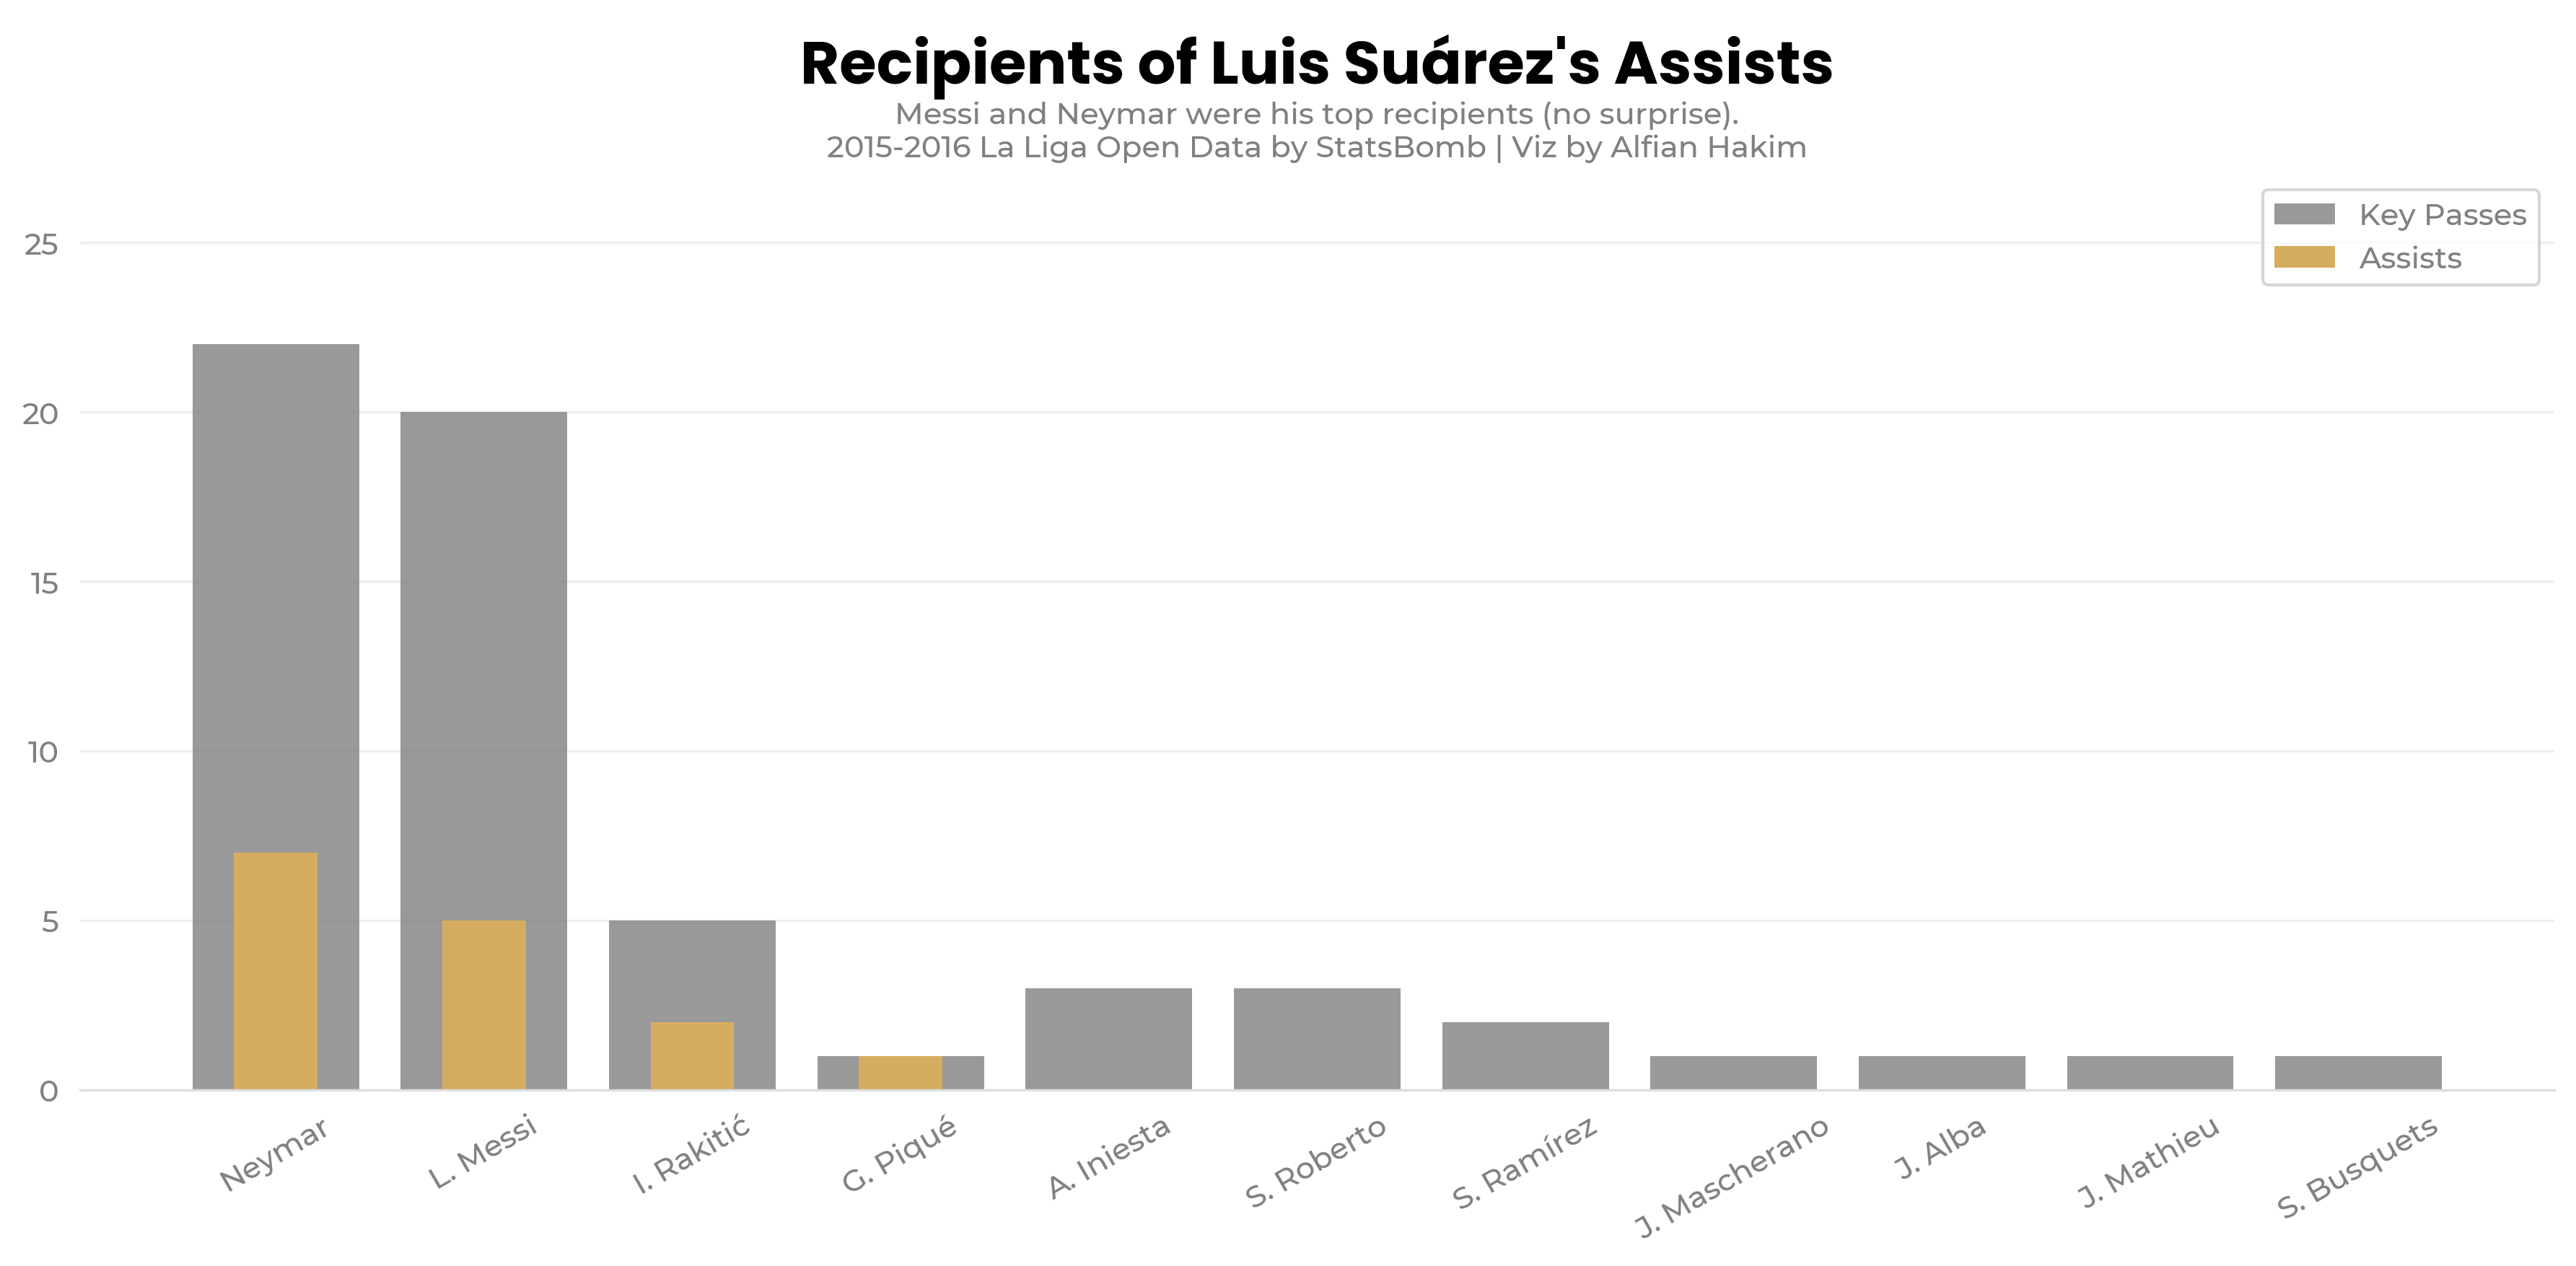

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['key_passes'], label='Key Passes', color='gray', align='center', alpha=0.8)
ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['assists'], label='Assists', color='#D6AD60', align='center', width=0.4)

# Set labels and title for the bar chart
#ax1.set_xlabel('Year')
ax1.set_xticklabels(df_bar_kp_2['player_name'], ha='center',va='top',color='gray', rotation=30)
#ax1.set_ylabel('Goals and Assists')
#ax1.set_title("Luis Suárez European Career", weight='bold', fontsize=18)
# Create a subtitle in ax1
ax1.text(0.5, 1.12, " ", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 1.1, "Recipients of Luis Suárez's Assists", weight='bold', fontsize=20, fontfamily='Poppins',
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5,1.02,"Messi and Neymar were his top recipients (no surprise).\n2015-2016 La Liga Open Data by StatsBomb | Viz by Alfian Hakim",
         color='grey', transform=ax1.transAxes, horizontalalignment='center')
ax1.legend(loc='upper right', labelcolor='grey')



# Create a twin axis for the line chart
# Before creating the twin axis (ax2), determine the y-axis limits
y_min = 0
y_max = 27

ax1.set_ylim(y_min, y_max)



# Add a grid
# ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax1.tick_params(bottom=False, left=False)
ax1.tick_params(axis='y', colors='grey')
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')


# Display the plot
plt.tight_layout()
plt.show()

### Assists map

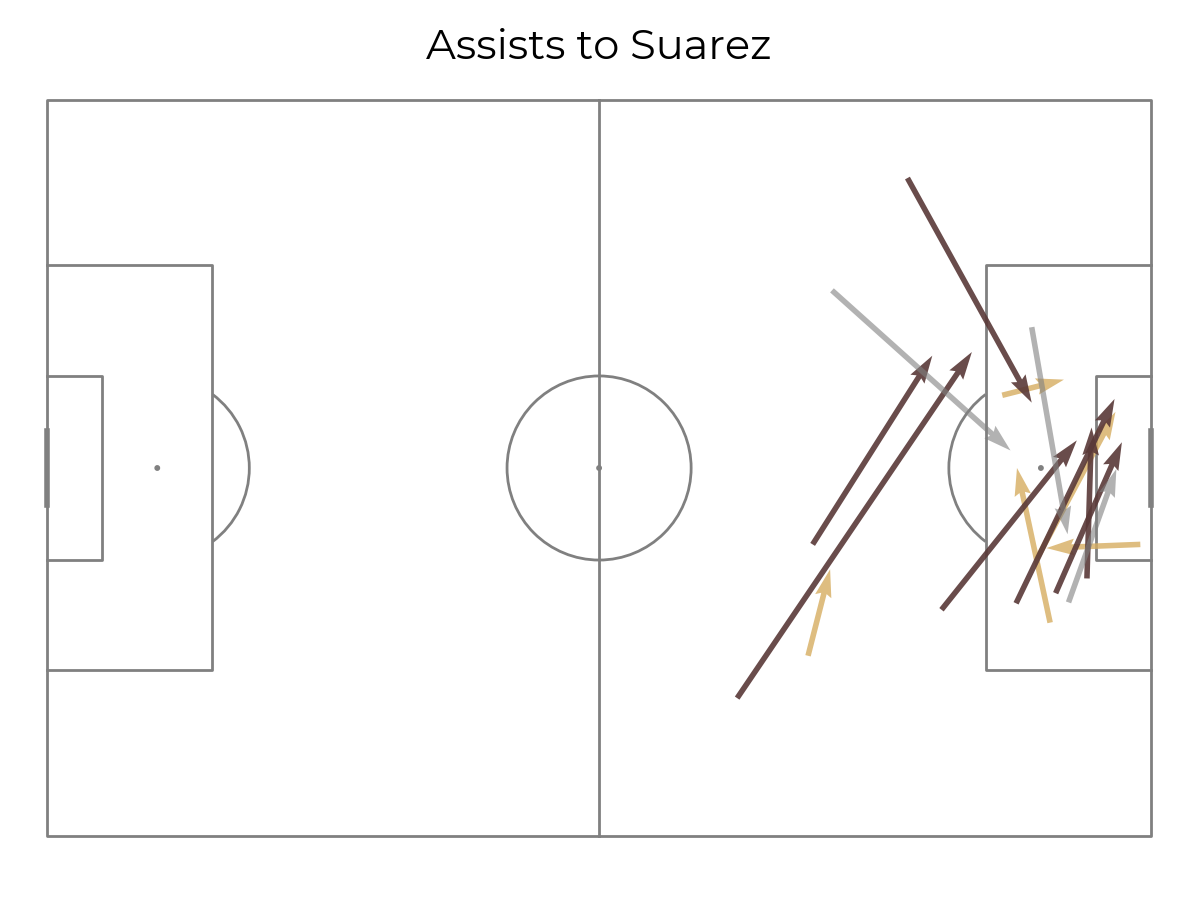

In [ ]:
df_messi = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Messi'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_neymar = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Neymar'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_others = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & ~((df_assist['player_name'].str.contains('Messi')) |
                                                                  (df_assist['player_name'].str.contains('Neymar')))][['pass_x','pass_y','pass_end_x','pass_end_y']]

pitch = Pitch(line_color='gray')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_messi.pass_x, df_messi.pass_y,
            df_messi.pass_end_x, df_messi.pass_end_y, color = "#D6AD60", ax=ax['pitch'], alpha=0.8)

pitch.arrows(df_neymar.pass_x, df_neymar.pass_y,
            df_neymar.pass_end_x, df_neymar.pass_end_y, color = '#593837', ax=ax['pitch'], alpha=0.9)

pitch.arrows(df_others.pass_x, df_others.pass_y,
            df_others.pass_end_x, df_others.pass_end_y, color = 'gray', ax=ax['pitch'], alpha=0.6)
# pitch.scatter(df_pass.pass_x, df_pass.pass_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Assists to Suarez", fontsize = 30)
plt.show()

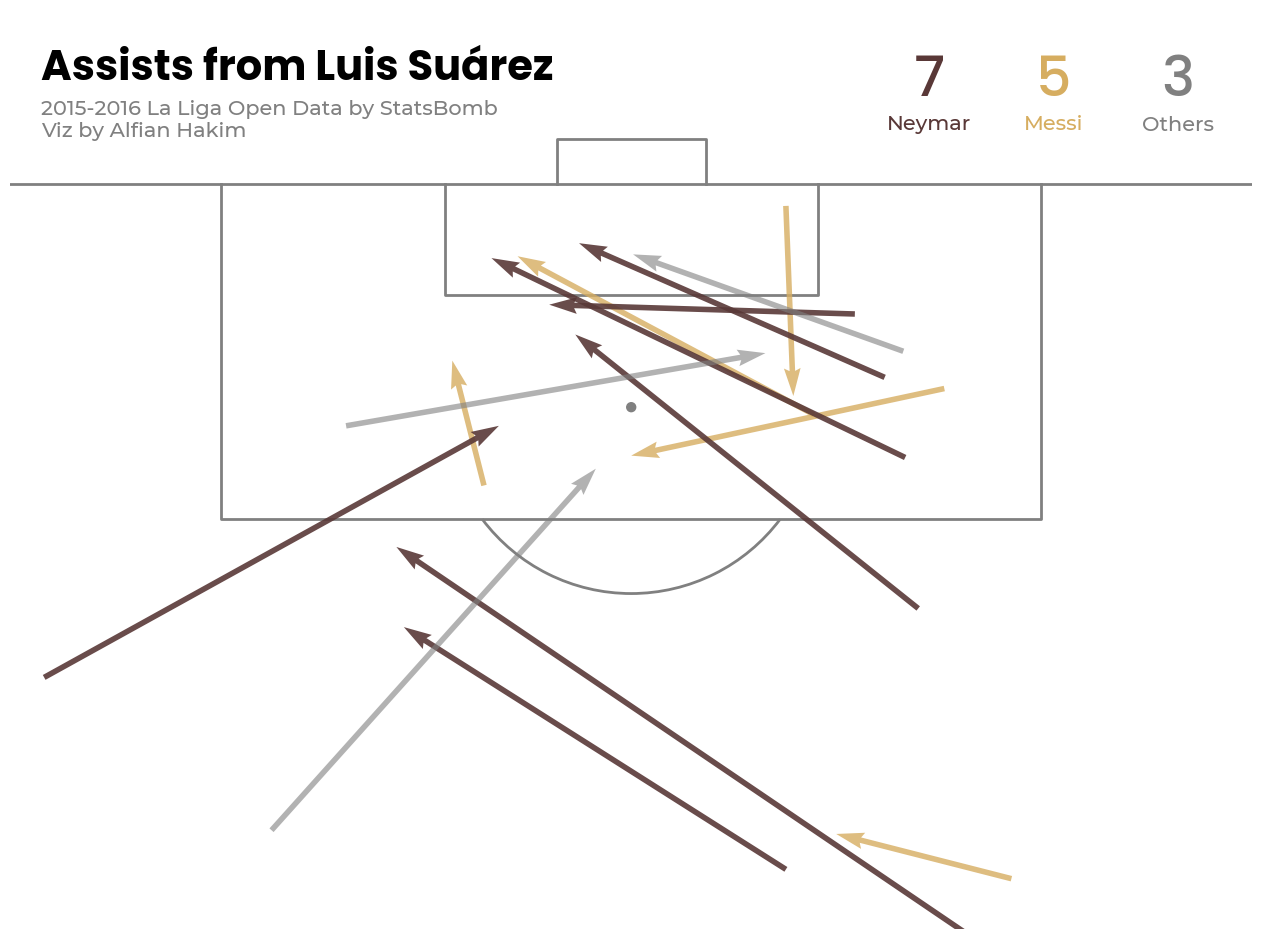

In [ ]:
df_messi = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Messi'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_neymar = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Neymar'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_others = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & ~((df_assist['player_name'].str.contains('Messi')) |
                                                                  (df_assist['player_name'].str.contains('Neymar')))][['pass_x','pass_y','pass_end_x','pass_end_y']]

pitch = VerticalPitch(pad_bottom=-30*2/3,  # reduce the area displayed at the bottom of the pitch
                      pad_left=-10*2/3,  # reduce the area displayed on the left of the pitch
                      pad_right=-10*2/3,  # reduce the area displayed on the right of the pitch
                      # pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_color='white', line_color='grey')  # control the goal transparency

fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

arr1 = pitch.arrows(df_messi.pass_x, df_messi.pass_y,
            df_messi.pass_end_x, df_messi.pass_end_y, color = "#D6AD60", ax=axs['pitch'], alpha=0.8)
arr2 = pitch.arrows(df_neymar.pass_x, df_neymar.pass_y,
            df_neymar.pass_end_x, df_neymar.pass_end_y, color = '#593837', ax=axs['pitch'], alpha=0.9)
arr4 = pitch.arrows(df_others.pass_x, df_others.pass_y,
            df_others.pass_end_x, df_others.pass_end_y, color = 'gray', ax=axs['pitch'], alpha=0.6)

# title text
# title0 = axs['title'].text(0.5, 1, " ", weight='bold',
#                            va='center', ha='center', fontsize=30)
title1 = axs['title'].text(0.025, 0.4, "Assists from Luis Suárez", weight='bold', fontfamily='Poppins',
                           va='center', ha='left', fontsize=30)
title2 = axs['title'].text(0.025, 0.1, "2015-2016 La Liga Open Data by StatsBomb\nViz by Alfian Hakim", color=pitch.line_color,
                           va='top', ha='left', fontsize=15)

text_messi = axs['title'].text(0.84, -0.15, "Messi", color='#D6AD60',
                           va='center', ha='center', fontsize=15)
text_neymar = axs['title'].text(0.74, -0.15, "Neymar", color='#593837',
                           va='center', ha='center', fontsize=15)
text_others = axs['title'].text(0.94, -0.06, "Others", color='gray',
                           va='top', ha='center', fontsize=15)

text_messi_value = axs['title'].text(0.84, 0.55, "{}".format(df_messi.shape[0]), color='#D6AD60',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text__neymar_value = axs['title'].text(0.74, 0.55, "{}".format(df_neymar.shape[0]), color='#593837',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text_others_value = axs['title'].text(0.94, 0.55, "{}".format(df_others.shape[0]),
                              color='gray', fontfamily='Poppins',
                           va='top', ha='center', fontsize=40)

plt.show()

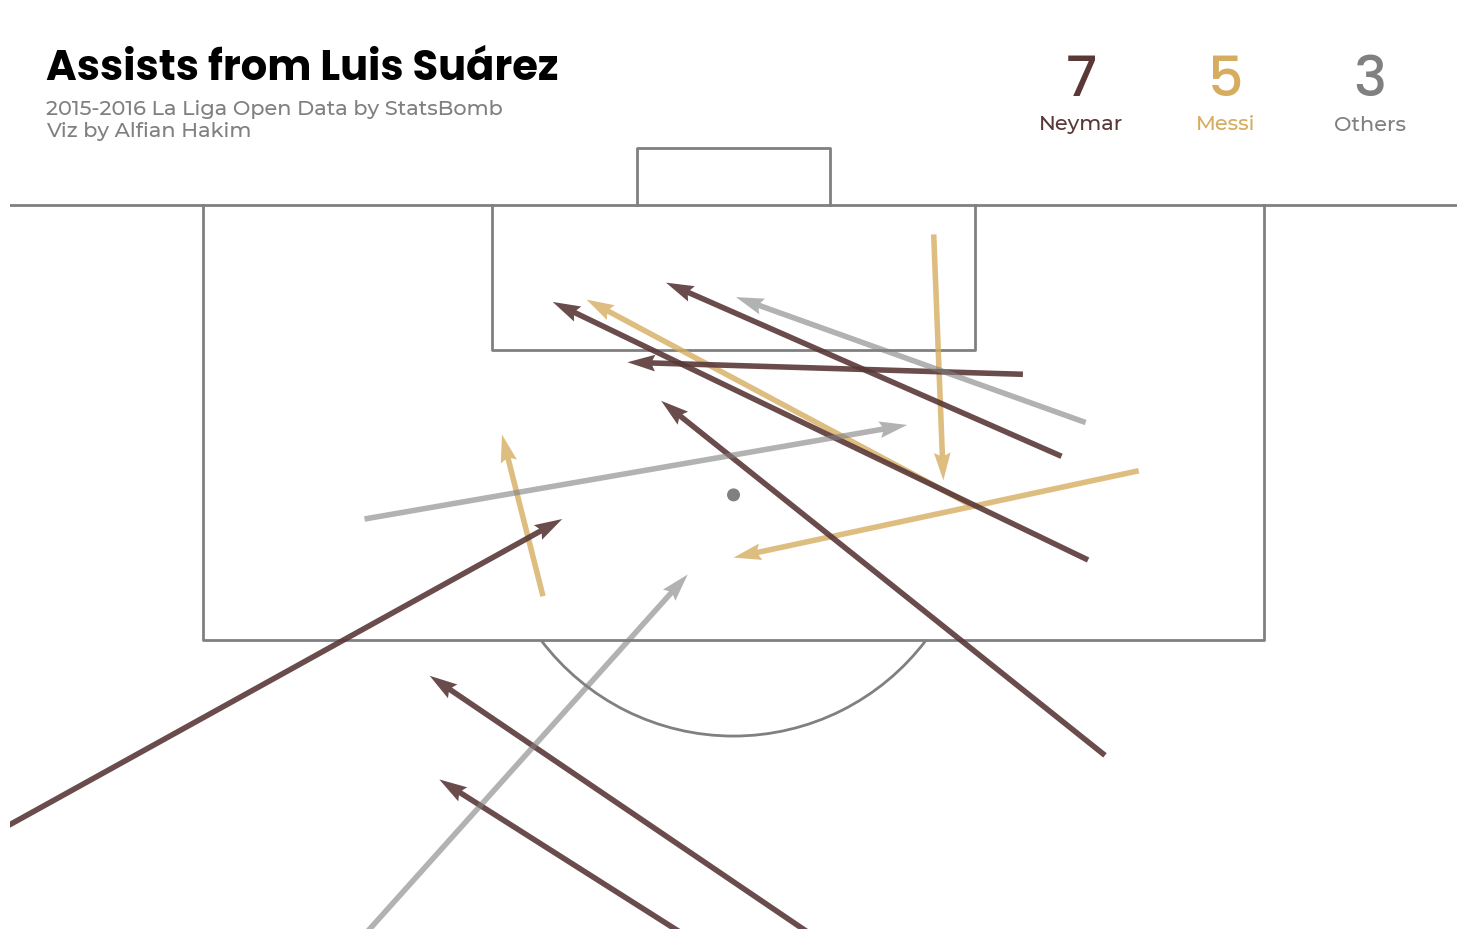

In [ ]:
df_messi = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Messi'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_neymar = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & (df_assist['player_name'].str.contains('Neymar'))][['pass_x','pass_y','pass_end_x','pass_end_y']]
df_others = df_assist.loc[mask_suarez & (df_assist['outcome_name']=='Goal') & ~((df_assist['player_name'].str.contains('Messi')) |
                                                                  (df_assist['player_name'].str.contains('Neymar')))][['pass_x','pass_y','pass_end_x','pass_end_y']]

pitch = VerticalPitch(pad_bottom=-30,  # reduce the area displayed at the bottom of the pitch
                      pad_left=-10,  # reduce the area displayed on the left of the pitch
                      pad_right=-10,  # reduce the area displayed on the right of the pitch
                      # pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_color='white', line_color='grey')  # control the goal transparency

fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

arr1 = pitch.arrows(df_messi.pass_x, df_messi.pass_y,
            df_messi.pass_end_x, df_messi.pass_end_y, color = "#D6AD60", ax=axs['pitch'], alpha=0.8)
arr2 = pitch.arrows(df_neymar.pass_x, df_neymar.pass_y,
            df_neymar.pass_end_x, df_neymar.pass_end_y, color = '#593837', ax=axs['pitch'], alpha=0.9)
arr4 = pitch.arrows(df_others.pass_x, df_others.pass_y,
            df_others.pass_end_x, df_others.pass_end_y, color = 'gray', ax=axs['pitch'], alpha=0.6)

# title text
# title0 = axs['title'].text(0.5, 1, " ", weight='bold',
#                            va='center', ha='center', fontsize=30)
title1 = axs['title'].text(0.025, 0.4, "Assists from Luis Suárez", weight='bold', fontfamily='Poppins',
                           va='center', ha='left', fontsize=30)
title2 = axs['title'].text(0.025, 0.1, "2015-2016 La Liga Open Data by StatsBomb\nViz by Alfian Hakim", color=pitch.line_color,
                           va='top', ha='left', fontsize=15)

text_messi = axs['title'].text(0.84, -0.15, "Messi", color='#D6AD60',
                           va='center', ha='center', fontsize=15)
text_neymar = axs['title'].text(0.74, -0.15, "Neymar", color='#593837',
                           va='center', ha='center', fontsize=15)
text_others = axs['title'].text(0.94, -0.06, "Others", color='gray',
                           va='top', ha='center', fontsize=15)

text_messi_value = axs['title'].text(0.84, 0.55, "{}".format(df_messi.shape[0]), color='#D6AD60',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text__neymar_value = axs['title'].text(0.74, 0.55, "{}".format(df_neymar.shape[0]), color='#593837',
                           va='top', ha='center',  fontfamily='Poppins', fontsize=40)
text_others_value = axs['title'].text(0.94, 0.55, "{}".format(df_others.shape[0]),
                              color='gray', fontfamily='Poppins',
                           va='top', ha='center', fontsize=40)

plt.show()

In [ ]:
df_shot.to_csv('drive/MyDrive/Dataset/suarez_shot.csv', index=False)